In [1]:
import pandas as pd
import scipy.stats
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from aquacrop import AquaCropModel, Soil, Crop, InitialWaterContent,IrrigationManagement
import Aq_Optimization_functons
from Aq_Optimization_functons import *
import warnings
import time
warnings.filterwarnings("ignore")
import time
%load_ext autoreload
%autoreload 2

/Users/m089r172/anaconda3/envs/aqua/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


"If your Normalized Mean Absolute Error (NMAE) is 50%, it means that:

On average, the model’s absolute error is 50% of the mean observed value.

So if your average observed yield is, say, 10 t/ha, then an NMAE of 50% implies that the average absolute error is around 5 t/ha."

In [36]:
plt.rcParams["figure.dpi"] = 500

In [3]:
# pip install git+https://github.com/wndlovu/aquacrop

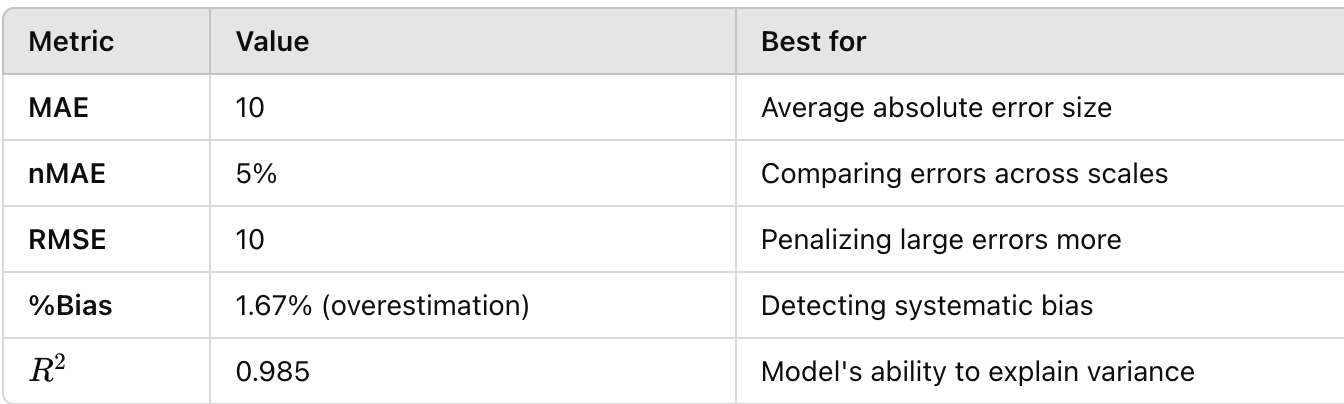

'rtx': 'Zmax',
'hi': 'HI0',
'hipsveg': 'a_HI',
 'kc': 'Kcb',
SMT = [
SMT1,
SMT1,
 SMT2,
  SMT3
       ]

In [3]:
start_time = time.time()

In [19]:


# test_df, all_yld_df, simul_reported   = for_objf (smt =[40, 40, 49.06, 11.92],CCx = 0.99, WP = 35, Kcb =1.09,
#                             HI0 = 0.55, a_HI = .89, Zmax = 1.94,no_et = False,train =False) # weyene's params


start_time = time.time()


# all_yld_df, simul_reported, all_ET_df = for_objf (smt =[59.993691, 63.501265, 50.669980, 59.987375],CCx =0.967712, WP = 32.240468, Kcb =1.079990,
#                                                 HI0 = 0.490363, a_HI =4.120877, Zmax = 1.203011,no_et = True, df_type ="test") #best irrig r2=.45

# PSO
# =============
# all_yld_df, simul_reported, all_ET_df   = for_objf (smt =[30, 50.472, 62.692, 49.887],CCx = 0.851,
#                                          WP = 33.141, Kcb =1.0000010482, HI0 = 0.55, a_HI = 7.37247, Zmax = 2.4364,no_et = True, df_type ="test")    #PSO_train


all_yld_df, simul_reported, all_ET_df   = for_objf (smt =[30, 50.46429813, 61.02248025, 42.30723166],CCx = 0.885556642,
                                         WP = 32.27125759, Kcb =1, HI0 = 0.55, a_HI = 1.586909385, Zmax = 1.753598564,no_et = True, df_type ="train")

# all_yld_df, simul_reported, all_ET_df   = for_objf (smt =[30, 50, 62.32858011, 49.35386929],CCx = 0.850301429,
#                                          WP = 33.16898916, Kcb =1, HI0 = 0.55, a_HI = 3.221713012, Zmax = 2.259297081,no_et = True, df_type ="test")


# ==========
#July 18, 2025 bou boleche onno meye dekhte, sundor dekhe
#Aug 24, 2025 bou boleche jhogra hole bacchader sathe babake kotha blte badha dibe na

# NSGA-II

# bst irrig

# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[54.814844,30.000007,  46.213611,59.364884],CCx =0.954401, WP = 30.820504, Kcb =1.056756,
#                                                 HI0 = 0.513886, a_HI =0.500047, Zmax =1.201175,df_type ="train", no_et = True)

#middle nsga


# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[46.642431,47.607506, 44.439728,59.829289],CCx =0.973186, WP = 31.946701, Kcb =1.057744,
#                                                 HI0 = 0.495800, a_HI =0.557917, Zmax =1.200949, df_type ="test", no_et = True)  
 
# ==========

# best yield

# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[41.494875, 30.050285, 34.479966, 58.861757],CCx =0.965120, WP = 31.633690, Kcb =1.027712,
#                                                 HI0 = 0.517828, a_HI =1.906190, Zmax =1.217361,df_type ="train", no_et = True)  #with 2012 and wc
 
# middle benchmark
# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[40,45,45,45],CCx =0.92, WP = 32.5, Kcb =1.05,              #middle point
#                                                 HI0 = 0.5, a_HI =5.25, Zmax =1.6,df_type ="full", no_et  = True) 


simul_reported.rename(columns={"Seasonal irrigation (mm)": "Simulated_Irrigation", "Yield (tonne/ha)": "Simulated_Yield"},inplace =True)

# Add a new column 'field_region' based on the 'FieldID'
simul_reported["field_region"] = np.where(simul_reported["FieldID"].str.startswith("SW"), "SW",
                               np.where(simul_reported["FieldID"].str.startswith(("NW", "NB")), "NW",
                               np.where(simul_reported["FieldID"].str.startswith("WC"), "WC",
                               np.where(simul_reported["FieldID"].str.startswith("NC"), "NC", "Unknown"))))
simul_reported.head(3)


end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time elapsed for parallel evaluation: {elapsed_time:.2f} seconds")

91
without_ET: 91
Time elapsed for parallel evaluation: 23.91 seconds


In [62]:
simul_reported.FieldID.unique()

array(['WC1', 'WC6', 'WC5', 'NB1', 'WC25', 'NW1', 'NW2', 'NW3', 'NW4',
       'NW5', 'WC24', 'NC2', 'NC1', 'WC9'], dtype=object)

In [4]:
# simul_reported = simul_reported[~simul_reported["FieldID"].isin(["NW6", "NW7"])]
# simul_reported = simul_reported[~simul_reported["FieldID"].isin(["NW6", "NW7"]) & ~simul_reported["FieldID"].str.startswith("WC")]

In [16]:
filtered_df = all_ET_df[all_ET_df["Date"].dt.month.between(5, 9)]

water_loss = filtered_df.groupby(["FieldID", "Year"])["Runoff", "DeepPerc", "ET_aqua"].sum().reset_index()
water_loss["total_loss"] = water_loss["Runoff"] + water_loss["DeepPerc"]
water_loss

FieldID  Year     Runoff   DeepPerc     ET_aqua  total_loss
0       NB1  2006   9.984885   0.000000  702.934102    9.984885
1       NB1  2007   6.571052   2.969189  653.169741    9.540241
2       NB1  2008  38.857062   0.000000  644.065957   38.857062
3       NB1  2009  25.660515   3.105268  660.033637   28.765783
4       NB1  2010  38.850327  10.869903  710.509365   49.720230
..      ...   ...        ...        ...         ...         ...
769     WC9  2019  16.206226  25.301337  692.803533   41.507563
770     WC9  2020   7.559506   0.000000  691.376355    7.559506
771     WC9  2021  21.405807   0.000000  669.801217   21.405807
772     WC9  2022   5.124512   0.000000  591.621949    5.124512
773     WC9  2023  80.247952   0.000000  723.328913   80.247952

[774 rows x 6 columns]

## train_performance

In [21]:
Traindata = simul_reported [["Year", "FieldID", "Simulated_Yield","Reported_Yield","Simulated_Irrigation","Reported_Irrigation" ]]
Traindata["Dataset"] = 'train'
Traindata[:30]


Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
0   2019     WC2        12.696626             NaN            216.000000   
1   2019     WC3        12.729796             NaN            252.000000   
2   2020     WC4         6.270319             NaN            413.004000   
3   2011     NW6        11.281205       13.175157            216.000000   
4   2012     NW6        11.371968       11.992211            756.000000   
5   2018     NW6        13.061678       16.873966            156.000000   
6   2008     NW7        12.634359       10.548330            360.000000   
7   2009     NW7        13.428962       10.068158            168.000000   
8   2010     NW7        12.344179       12.082327            300.000000   
9   2013     NW7        10.406063       14.645265            509.420734   
10  2020     NW7        11.603007       14.693014            408.000000   
11  2021     NW7        12.587508       16.567301            312.000000   
12  2011     NB1        10.973693       10.431313            264.000000   
13  2012     NB1         4.753080        6.454758            453.614809   
14  2013     NB1         6.818258        8.813925            453.614809   
15  2014     NB1        12.633251       12.430015            396.000000   
16  2015     NB1        12.588816       12.584693            336.000000   
17  2016     NB1        12.678461       12.428670            228.000000   
18  2018     NB1        12.185737       13.101181            324.000000   
19  2020     NB1         5.370498        8.171677            453.614809   
20  2021     NB1        12.326539       10.247718            312.000000   
21  2022     NB1         1.391055        8.145450            453.614809   
22  2020    WC19        11.922265             NaN            536.702000   
23  2016     WC8        11.938993             NaN            324.000000   
24  2020     WC8        11.997468             NaN            544.068000   
25  2016    WC11        11.742347             NaN            336.000000   
26  2020    WC16         0.038787             NaN            251.714000   
27  2009     NW1        13.245932       12.138146            240.000000   
28  2010     NW1        12.397289       10.014357            204.000000   
29  2012     NW1         6.215521        6.027041            453.658570   

    Reported_Irrigation Dataset  
0            283.718000   train  
1            288.544000   train  
2            373.634000   train  
3                   NaN   train  
4                   NaN   train  
5            386.218442   train  
6                   NaN   train  
7                   NaN   train  
8                   NaN   train  
9                   NaN   train  
10           390.581213   train  
11           418.940105   train  
12                  NaN   train  
13                  NaN   train  
14                  NaN   train  
15                  NaN   train  
16           362.713507   train  
17           300.984585   train  
18           369.860074   train  
19           342.563728   train  
20           286.767030   train  
21           453.614809   train  
22           516.890000   train  
23           424.434000   train  
24           544.068000   train  
25           374.904000   train  
26           251.714000   train  
27                  NaN   train  
28                  NaN   train  
29                  NaN   train

In [9]:
calculate_metrics_to_dataframe(simul_reported,d_set ="train", no_et =True)

iteration obj_variable        MAE       RMSE       R^2  Pearson r Data_set  \
0          1   Irrigation  59.856411  86.153992 -0.345566   0.496021    train   
1          1        Yield   2.171575   3.215413 -0.774877   0.319143    train   

   prms  
0  prms  
1  prms

In [6]:
.51*.51

0.2601

## test_performance

In [18]:
testdata = simul_reported [["Year", "FieldID", "Simulated_Yield","Reported_Yield","Simulated_Irrigation","Reported_Irrigation" ]]
testdata["Dataset"] = 'test'
testdata["resid"] = round((testdata["Reported_Irrigation"] - testdata ["Simulated_Irrigation"]),2)
testdata

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
0   2018     WC1        12.290148             NaN            300.000000   
1   2020     WC1        11.457581             NaN            526.542000   
2   2019     WC6        12.777249             NaN            216.000000   
3   2016     WC5        12.611331             NaN            228.000000   
4   2020     WC5         4.069143             NaN            391.160000   
5   2017     NB1        12.629005       10.184502            204.000000   
6   2019    WC25        12.766850             NaN            228.000000   
7   2019     NW1        12.582218       14.074976            240.000000   
8   2021     NW1        12.449639       11.608880            324.000000   
9   2022     NW1         2.553801        9.591348            453.658570   
10  2010     NW2        12.243353       12.111245            360.000000   
11  2012     NW2         8.096715        6.666599            457.354889   
12  2018     NW2        12.311674       13.785124            312.000000   
13  2011     NW3        10.463327        9.378162            288.000000   
14  2013     NW4         5.208172       11.820720            433.966466   
15  2014     NW4        12.622356       13.311677            384.000000   
16  2010     NW5        12.243353       10.427278            360.000000   
17  2011     NW5        10.690811        7.873083            300.000000   
18  2013     NW5         2.577846       12.098467            390.011099   
19  2017     NW5        12.906295       13.018462            144.000000   
20  2018     NW5        12.311674       14.203426            312.000000   
21  2018    WC24        12.098488             NaN            300.000000   
22  2022     NC2        11.510698       14.186613            194.818000   
23  2022     NC1        11.312826       15.976164            214.122000   
24  2019     WC9        12.614317             NaN            216.000000   

    Reported_Irrigation Dataset   resid  
0            273.812000    test  -26.19  
1            360.680000    test -165.86  
2            294.640000    test   78.64  
3            391.160000    test  163.16  
4            370.078000    test  -21.08  
5            297.575357    test   93.58  
6            321.564000    test   93.56  
7            309.232497    test   69.23  
8            366.544504    test   42.54  
9            429.969663    test  -23.69  
10                  NaN    test     NaN  
11                  NaN    test     NaN  
12           250.048215    test  -61.95  
13                  NaN    test     NaN  
14                  NaN    test     NaN  
15                  NaN    test     NaN  
16                  NaN    test     NaN  
17                  NaN    test     NaN  
18                  NaN    test     NaN  
19           281.983458    test  137.98  
20           384.606201    test   72.61  
21           424.688000    test  124.69  
22           168.402000    test  -26.42  
23           186.182000    test  -27.94  
24           388.874000    test  172.87

In [7]:
252-424

-172

In [8]:
526- 360

166

In [124]:
calculate_metrics_to_dataframe(simul_reported,d_set ="test", no_et =True)

iteration obj_variable        MAE       RMSE       R^2  Pearson r Data_set  \
0          1   Irrigation  53.789446  72.422613  0.528452   0.726947     test   
1          1        Yield   1.670377   2.351533  0.327753   0.572497     test   

   prms  
0  prms  
1  prms

In [136]:
calculate_metrics_to_dataframe(simul_reported,d_set ="test",no_et =True)

iteration obj_variable        MAE       RMSE       R^2  Pearson r Data_set  \
0          1   Irrigation  59.856411  86.153992 -0.345566   0.496021     test   
1          1        Yield   2.171575   3.215413 -0.774877   0.319143     test   

   prms  
0  prms  
1  prms

## Full_data

In [7]:
calculate_metrics_to_dataframe(simul_reported,d_set ="full_data",no_et =True)


iteration obj_variable        MAE       RMSE       R^2  Pearson r  \
0          1   Irrigation  53.789446  72.422613  0.244067   0.726947   
1          1        Yield   1.670377   2.351533  0.285081   0.572497   

    Data_set  prms  
0  full_data  prms  
1  full_data  prms

# plots

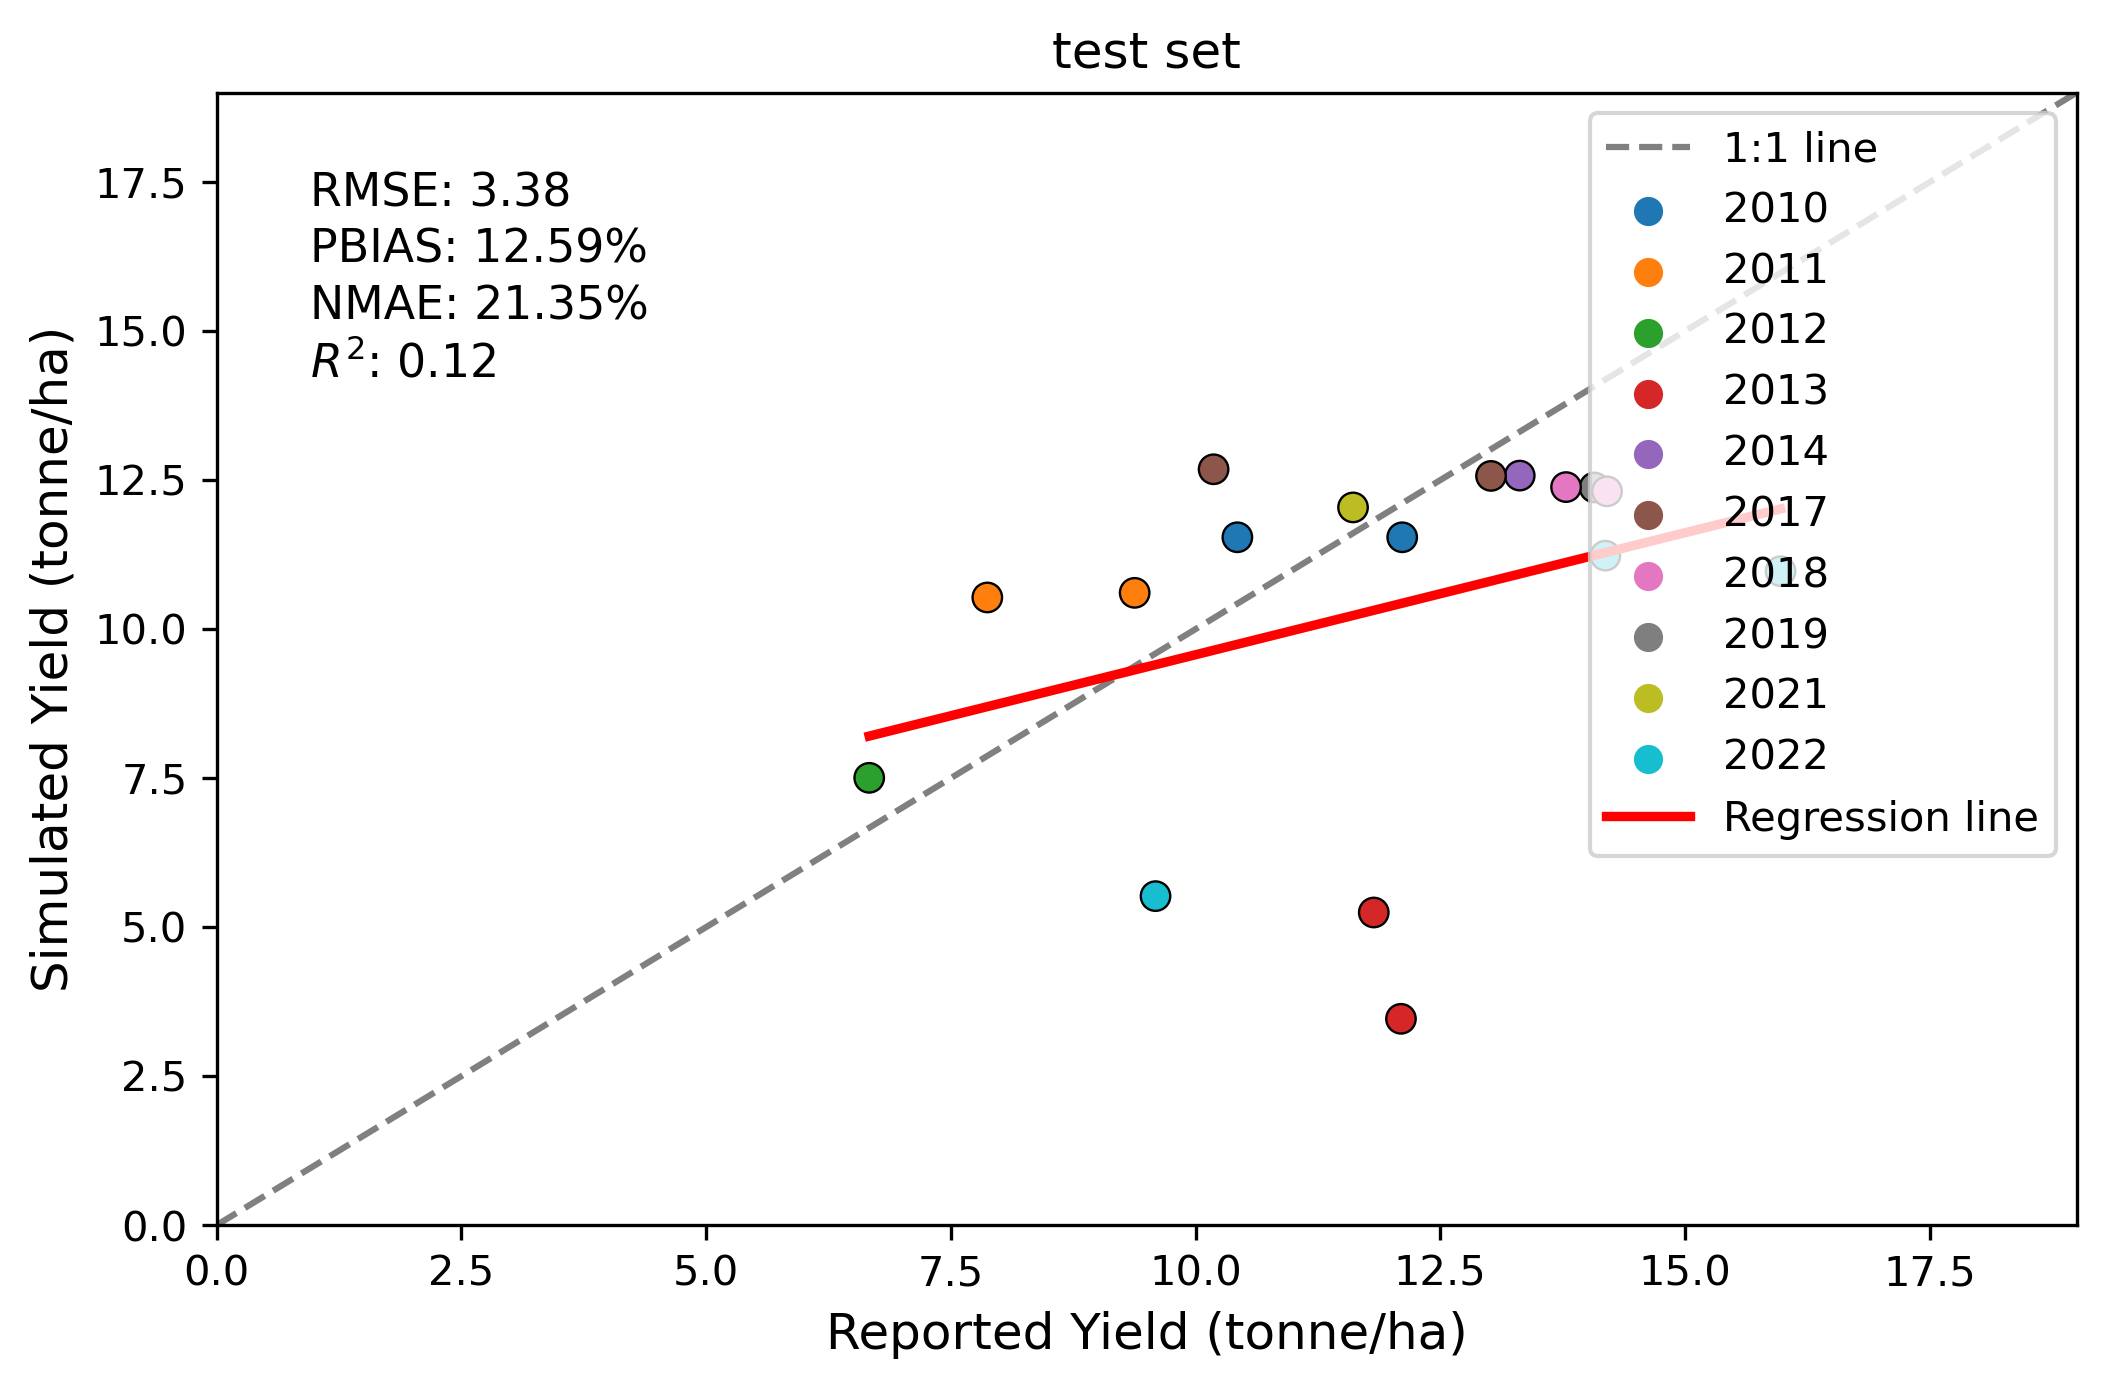

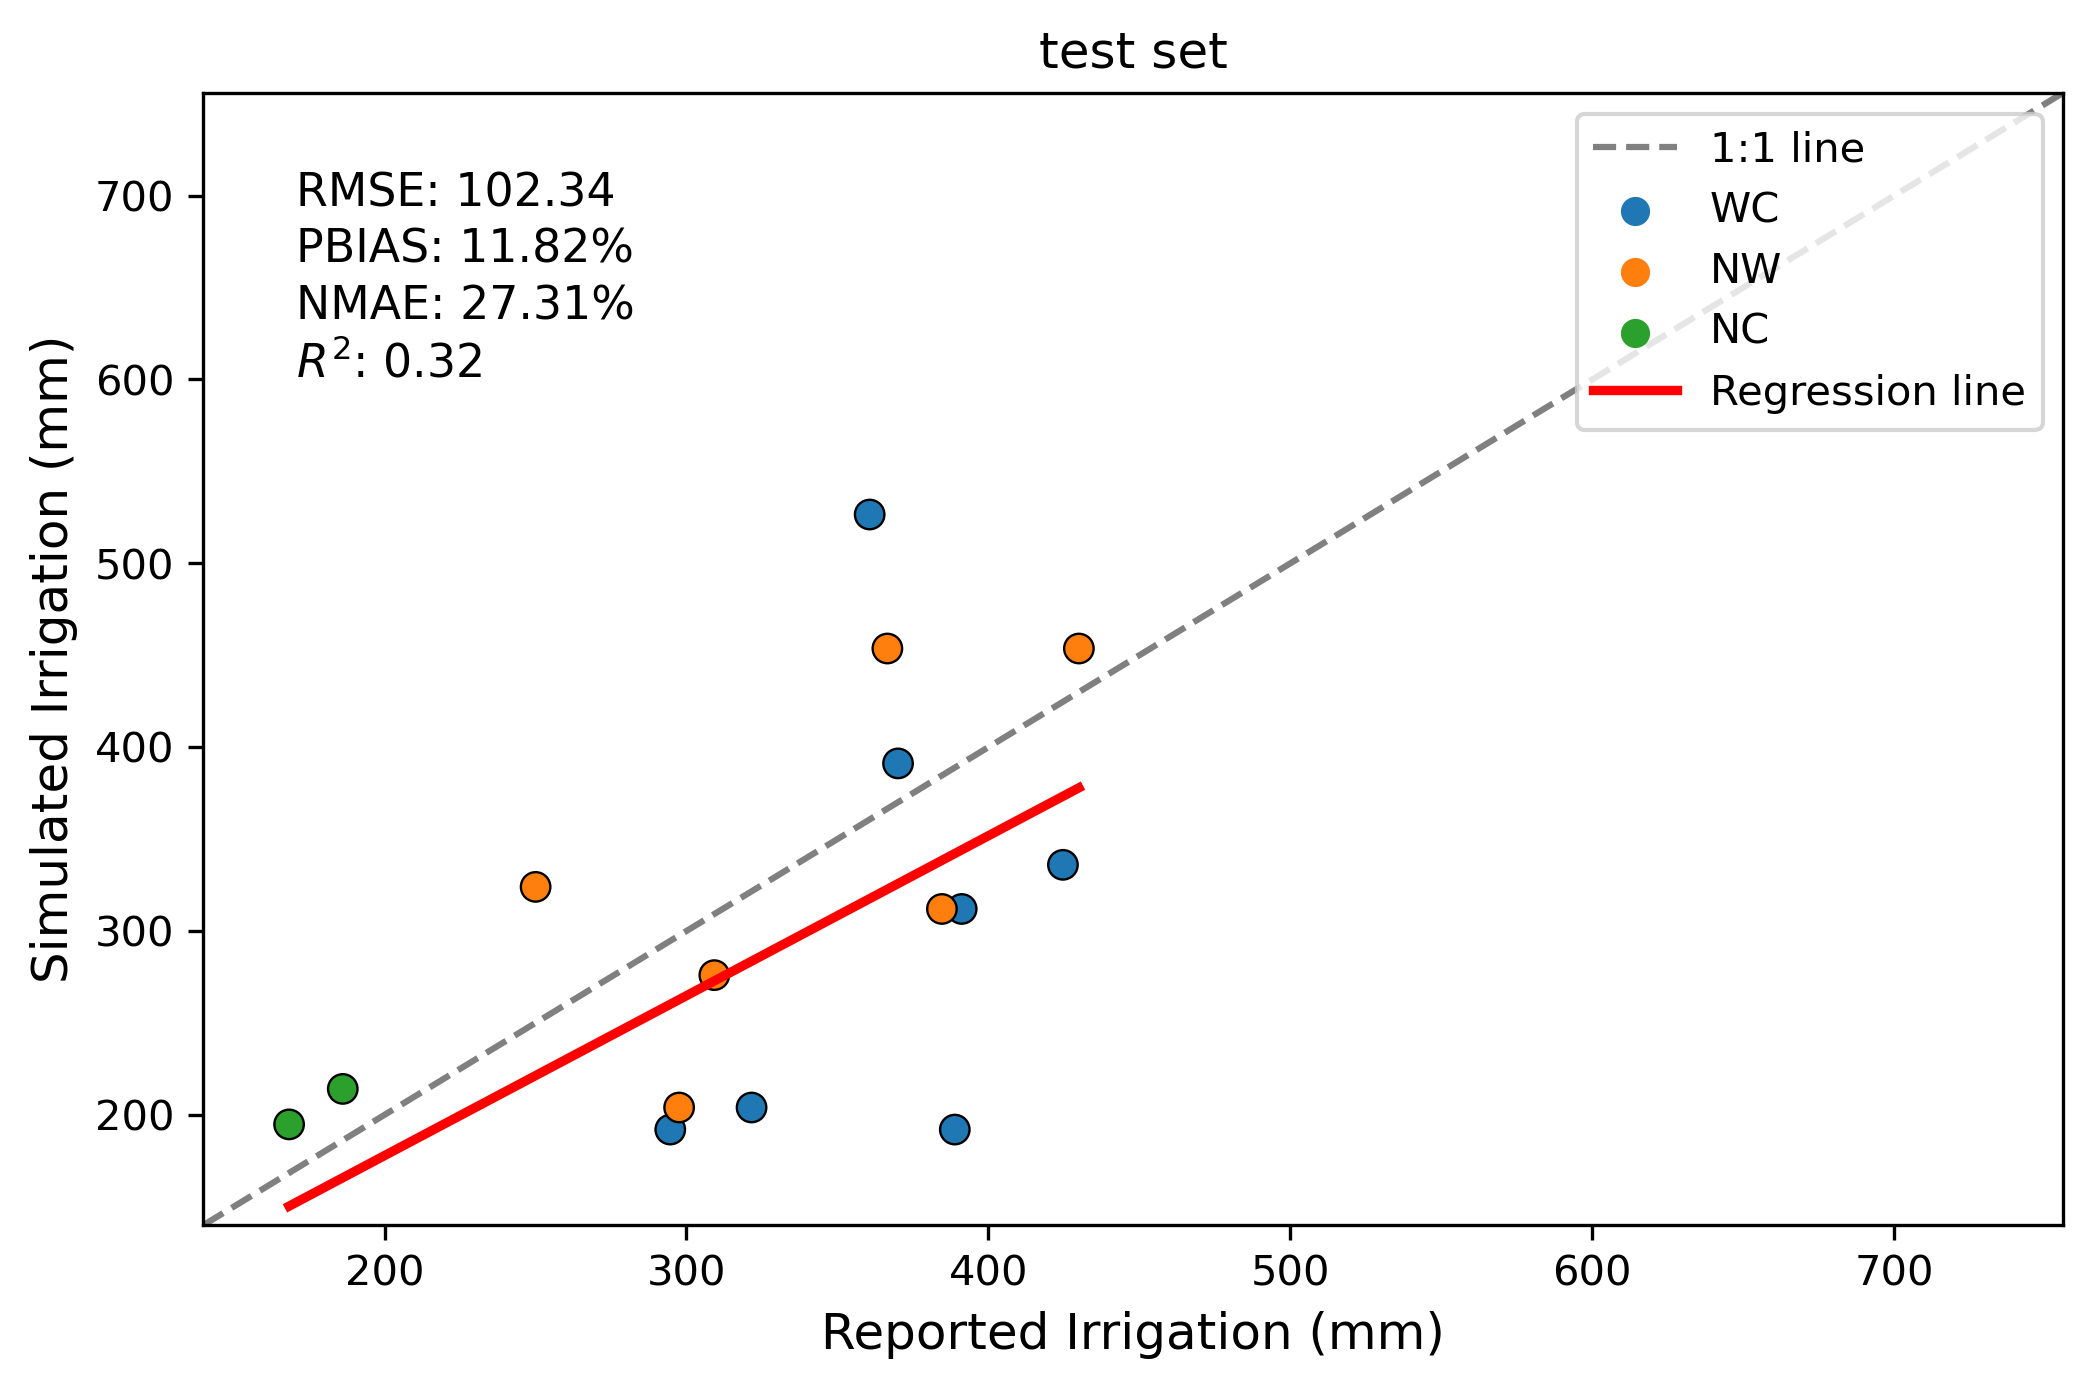

In [9]:
plot_yield_comparison (df=simul_reported.dropna(subset=["Reported_Yield", 'Simulated_Yield']), x_col='Reported_Yield', y_col='Simulated_Yield', 
                       df_type ="test set", x_axis="Reported Yield (tonne/ha)",  y_axis="Simulated Yield (tonne/ha)", hue ="Year");

plot_yield_comparison (df=simul_reported.dropna(subset=["Reported_Irrigation"]), x_col='Reported_Irrigation', y_col='Simulated_Irrigation',
                       df_type ="test set",x_axis="Reported Irrigation (mm)",  y_axis="Simulated Irrigation (mm)",  hue ="field_region");
# plot_yield_comparison (df=simul_reported, x_col='Ensemble_ET', y_col='ET_aqua', df_type ="train");

In [10]:
def plot_yield_comparison(
    df, 
    x_col: str = 'Reported_Yield', 
    y_col: str = 'Simulated_Yield', 
    df_type: str = "Test", 
    hue: str = None,
    style: str = None,
    metric: bool = True,
    x_axis: str = None,
    y_axis: str = None,
    xlim: tuple = (0, 19), 
    ylim: tuple = (0, 19),
    bound: tuple = None,
    text = None,
    color=None,
    ax=None,
    label_prefix: str = "",
    one_to_one_line: bool = True  # new parameter
) -> tuple:
    import matplotlib.pyplot as plt
    import seaborn as sns
    import numpy as np
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from scipy.stats import pearsonr

    def pbias(observed, predicted):
        return 100 * np.sum(observed-predicted) / np.sum(observed)

    def nmae(predicted, observed):
        return 100 * mean_absolute_error(observed, predicted) / np.mean(observed)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 5))
    else:
        fig = None
        
    if color is None:
        color = "red"

    # Optional 1:1 line
    if one_to_one_line:
        ax.axline((0, 0), slope=1, label='1:1 line', color='gray', linestyle='--')

    # Scatter plot
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue, ax=ax, color=color, style=style, s=50, edgecolor='k', label=f'{label_prefix} points')

    # Regression line
    sns.regplot(data=df, x=x_col, y=y_col, scatter=False, ci=None, ax=ax, color=color, label=f'{label_prefix} regression line', line_kws={'label': None})

    # Shaded region
    if bound:
        x_range = np.linspace(df[x_col].min(), df[x_col].max(), len(df))
        ax.fill_between(x_range, bound[0], bound[1], color='gray', alpha=0.3, label=f'Y range: {bound[0]} to {bound[1]}')

    # Axis labels and limits
    ax.set_xlabel(x_axis or x_col, fontsize=15)
    ax.set_ylabel(y_axis or y_col, fontsize=15)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    # Metrics
    observed = df[x_col].values
    predicted = df[y_col].values

    corr, _ = pearsonr(observed, predicted)
    mae = mean_absolute_error(observed, predicted)
    rmse = np.sqrt(mean_squared_error(observed, predicted))
    r2 = r2_score(observed, predicted)
    pbias_value = pbias( observed, predicted)
    nmae_value = nmae(predicted, observed)

    if metric:
        text_x = 0.02 if label_prefix == "Train" else 0.02
        ax.annotate(
#             f"{label_prefix} Set:\n"
            f"RMSE: {rmse:.2f}\n"
            f"PBIAS: {pbias_value:.2f}%\n"
            f"NMAE: {nmae_value:.2f}%\n"
            f"$R^2$: {corr**2:.2f}",
            xy=(text_x, 0.78), xycoords='axes fraction', fontsize=15
        )
    ax.legend(loc='lower right')
    if text is not None:
        
        ax.text(
            0.5, .95, text,
            transform=ax.transAxes,
            ha='center',
            va='bottom',
            fontsize=15  # optional
        )
        
    if fig:
        ax.set_title(f"{df_type}")
        return fig, ax
    return ax


<Axes: xlabel='Reported Yield (t/ha)', ylabel='Simulated Yield (t/ha)'>

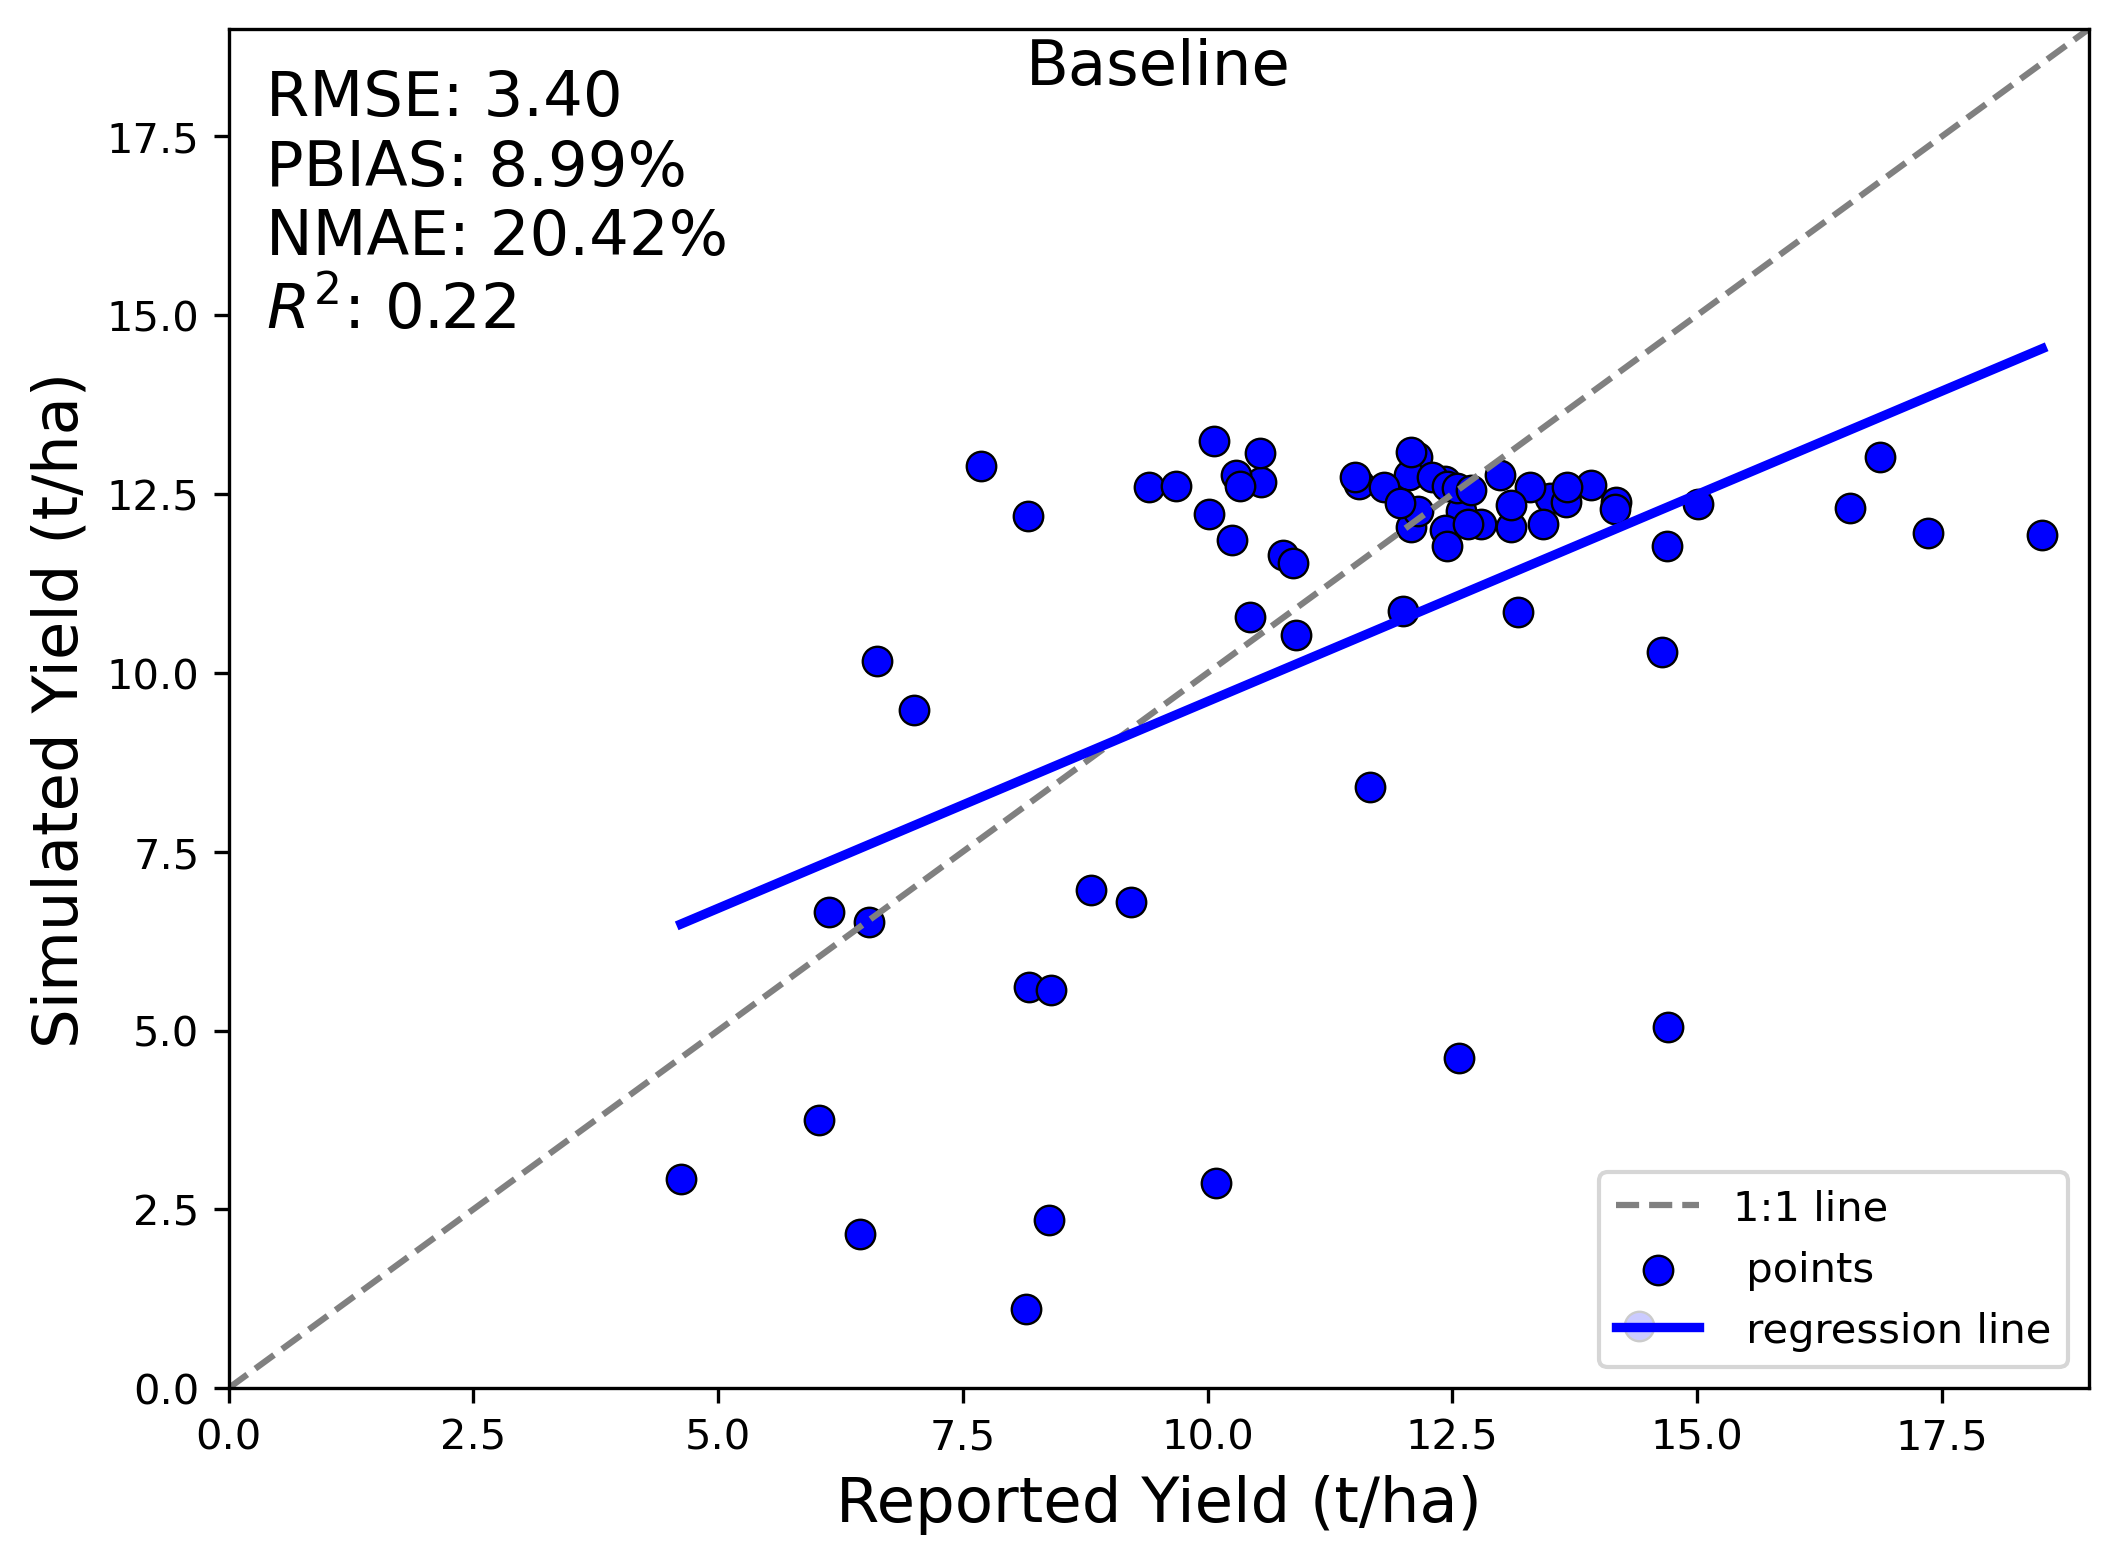

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))



# Plot: Train set (on same ax)
plot_yield_comparison(
    df=Traindata.dropna(subset=["Reported_Yield", "Simulated_Yield"]),
    x_col='Reported_Yield',
    y_col='Simulated_Yield',
    text="Baseline",
    x_axis="Reported Yield (t/ha)",  # Repeated for consistency
    y_axis="Simulated Yield (t/ha)",
    color ='blue',
    ax=ax,
#     label_prefix="Train"

)

# Plot: Test set
# plot_yield_comparison(
#     df=testdata.dropna(subset=["Reported_Yield", "Simulated_Yield"]),
#     x_col='Reported_Yield',
#     y_col='Simulated_Yield',
#     text="Baseline",
#     x_axis="Reported Yield (t/ha)",
#     y_axis="Simulated Yield (t/ha)",
#     ax=ax,
#     one_to_one_line = False,
#     label_prefix="Test"
# )

# # plt.title("Simulated vs Reported Yield: Train & Test Sets")
# plt.tight_layout()
# plt.show()


In [30]:
df=Traindata.dropna(subset=["Reported_Irrigation"])
df

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
0   2019     WC2        12.696626             NaN            216.000000   
1   2019     WC3        12.729796             NaN            252.000000   
2   2020     WC4         6.270319             NaN            413.004000   
5   2018     NW6        13.061678       16.873966            156.000000   
10  2020     NW7        11.603007       14.693014            408.000000   
..   ...     ...              ...             ...                   ...   
86  2017     SW1        12.624545             NaN            240.000000   
87  2018     SW1        11.835750             NaN            456.000000   
88  2019     SW1        12.683723             NaN            432.000000   
89  2020     SW1        11.657800             NaN            588.408179   
90  2022     SW1         8.906349             NaN            588.408179   

    Reported_Irrigation Dataset  
0            283.718000   train  
1            288.544000   train  
2            373.634000   train  
5            386.218442   train  
10           390.581213   train  
..                  ...     ...  
86           405.270174   train  
87           436.754370   train  
88           409.618317   train  
89           588.408179   train  
90           524.066290   train  

[61 rows x 7 columns]

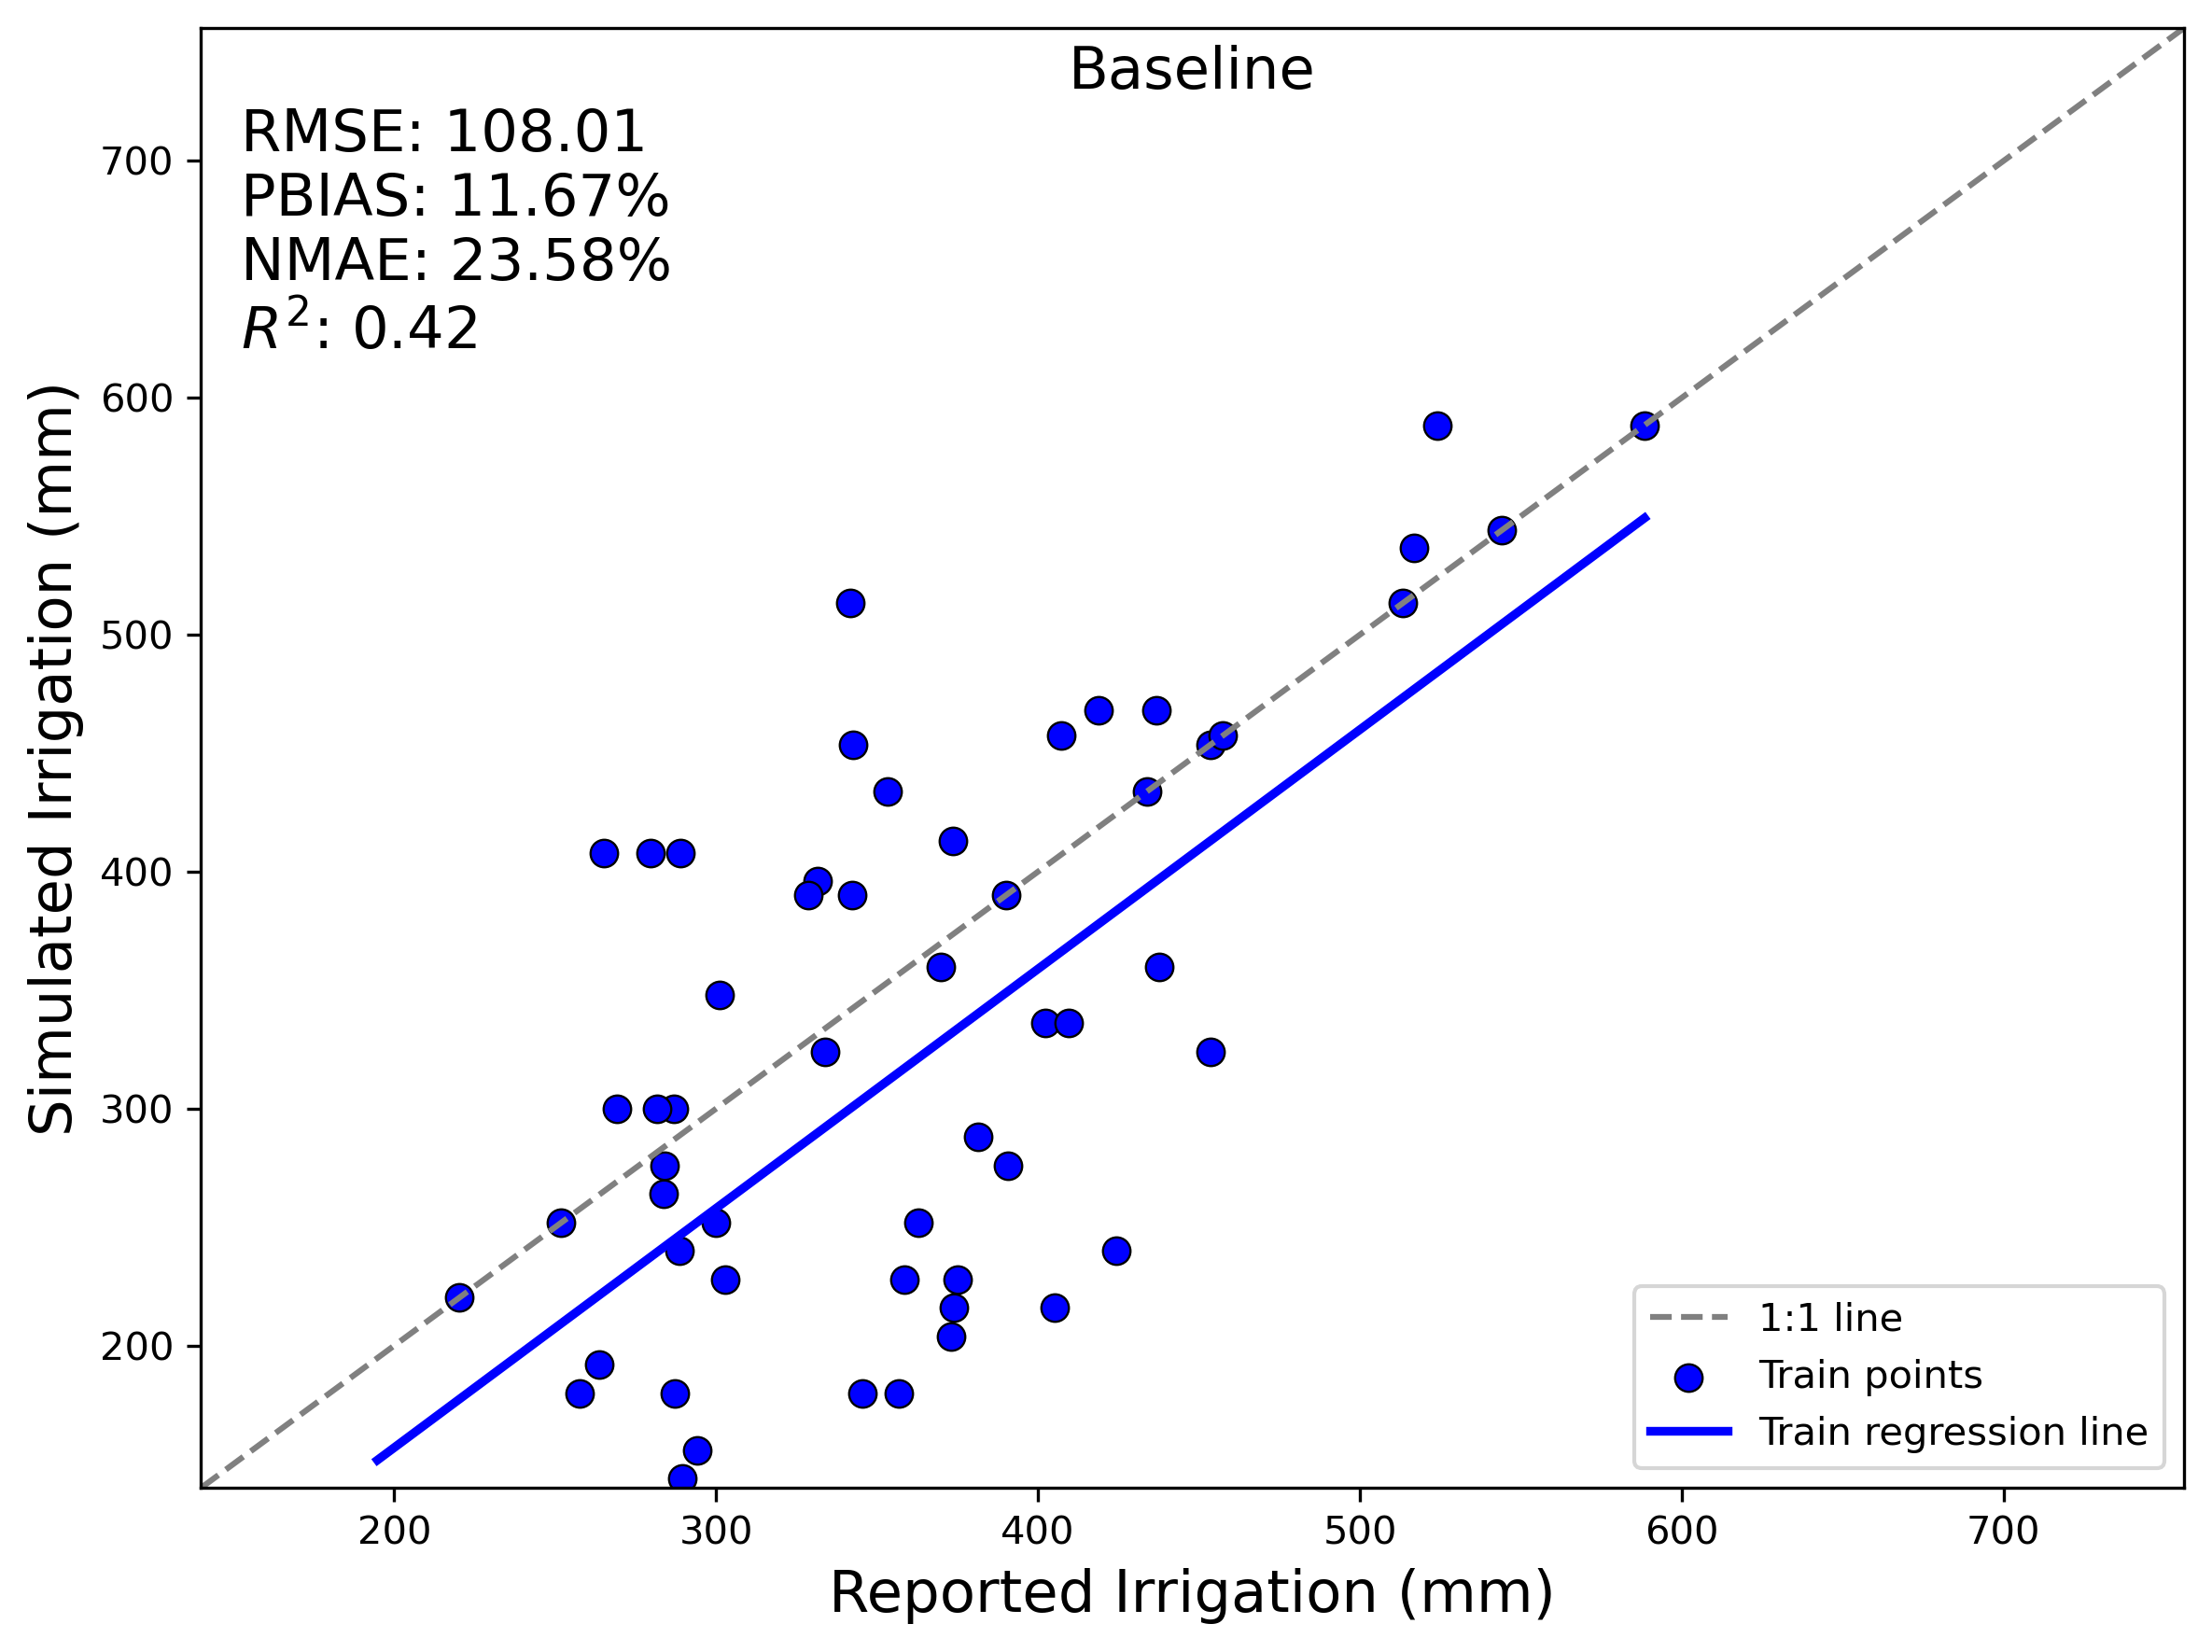

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))



# Plot: Train set (on same ax)
plot_yield_comparison(
    df=Traindata.dropna(subset=["Reported_Irrigation"]),
    x_col='Reported_Irrigation',
    y_col='Simulated_Irrigation',
#     text="Train Set",
    text="Baseline",
    x_axis="Reported Irrigation (mm)",  # Repeated for consistency
    y_axis="Simulated Irrigation (mm)",
    color ='blue',
    ax=ax,
    xlim= (140, 756), 
    ylim= (140, 756),
    label_prefix="Train"
)

# # Plot: Test set
# plot_yield_comparison(
#     df=testdata.dropna(subset=["Reported_Irrigation"]),
#     x_col='Reported_Irrigation',
#     y_col='Simulated_Irrigation',
#     text="Baseline",
#     x_axis="Reported Irrigation (mm)",
#     y_axis="Simulated Irrigation (mm)",
#     ax=ax,
#     xlim = (80, 650), 
#     ylim= (80, 650),
#     one_to_one_line = False,
#     label_prefix="Test"
# )

# plt.title("Simulated vs Reported Yield: Train & Test Sets")
plt.tight_layout()
plt.show()


## For test set plots

In [13]:

import matplotlib.lines as mlines
# Metric functions
def pbias(predicted, observed):
    return 100.0 * np.sum(observed - predicted) / np.sum(observed)

def nmae(predicted, observed):
    return 100 * mean_absolute_error(observed, predicted) / np.mean(observed)


def plot_comparison(train_df, test_df, reported_col="Reported_Yield", simulated_col="Simulated_Yield", 
                    ylim=(0, 20), cols=2, p=0.02, ylabel='Yield (t/ha)' ):
    plt.rcParams["figure.dpi"] = 500
    # Combine all unique FieldIDs
    unique_fields = sorted(set(train_df['FieldID']).union(test_df['FieldID']))
    rows = math.ceil(len(unique_fields) / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 3), squeeze=False)

    # Determine full year range from both train and test data
    all_years_global = sorted(
        set(train_df['Year'].dropna().astype(int)).union(test_df['Year'].dropna().astype(int))
    )
    min_year = int(min(all_years_global))
    max_year = int(max(all_years_global))
    full_years = list(range(min_year, max_year + 1))
    xtick_labels = [str(year) if year % 2 == 0 else '' for year in full_years]

    for idx, field_id in enumerate(unique_fields):
        r, c = divmod(idx, cols)
        ax = axes[r][c]

        train_group = train_df[train_df['FieldID'] == field_id]
        test_group = test_df[test_df['FieldID'] == field_id]

        # Determine which dataset to use for metric computation
        if not train_group.empty:
            obs = train_group[reported_col].values
            pred = train_group[simulated_col].values
        elif not test_group.empty:
            obs = test_group[reported_col].values
            pred = test_group[simulated_col].values
        else:
            obs, pred = np.array([]), np.array([])

        if len(obs) > 0 and len(pred) > 0:
            rmse = mean_squared_error(obs, pred, squared=False)
            pbias_val = pbias(pred, obs)
            nmae_val = nmae(pred, obs)
        else:
            rmse, pbias_val, nmae_val = np.nan, np.nan, np.nan

        # Plot train data (circle)
        ax.plot(train_group['Year'], train_group[simulated_col], marker='o', linestyle='', color='blue')
        ax.plot(train_group['Year'], train_group[reported_col], marker='o', linestyle='', color='orange')

        # Plot test data (diamond)
        ax.scatter(test_group['Year'], test_group[simulated_col], marker='D', color='red')
        ax.scatter(test_group['Year'], test_group[reported_col], marker='D', color='orange')

        # Set x-ticks
        ax.set_xticks(full_years)
        ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

        # FieldID label
        ax.text(0.01, 0.95, f'FieldID: {field_id}', transform=ax.transAxes,
                fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=.2', facecolor='white', edgecolor='gray'))

        # Metric box
        if not np.isnan(rmse):
            # Set x position depending on the field ID
            x_pos = 0.02 if field_id == "NC2" else 0.78

            ax.annotate(
                f"RMSE: {rmse:.2f}\n"
                f"PBIAS: {pbias_val:.2f}%\n"
                f"NMAE: {nmae_val:.2f}%",
                xy=(x_pos, 0.05), xycoords='axes fraction',
                fontsize=12, verticalalignment='bottom',
                bbox=dict(boxstyle="round,pad=0.2", edgecolor="black", facecolor="white", alpha=.4)
            )
        ax.set_xlabel('Year', fontsize=12)
        ax.set_ylabel(ylabel, fontsize=12)
        ax.set_ylim(*ylim)

    # Remove empty subplots
    for idx in range(len(unique_fields), rows * cols):
        fig.delaxes(axes[idx // cols][idx % cols])

    # Shared legend at bottom
    handles = [
        mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='Simulated (Train)'),
        mlines.Line2D([], [], color='orange', marker='o', linestyle='None', label='Reported (Train)'),
        mlines.Line2D([], [], color='red', marker='D', linestyle='None', label='Simulated (Test)'),
        mlines.Line2D([], [], color='orange', marker='D', linestyle='None', label='Reported (Test)')
    ]
    fig.legend(handles=handles, loc='lower center', ncol=4, bbox_to_anchor=(0.5, p), fontsize=12)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.show()

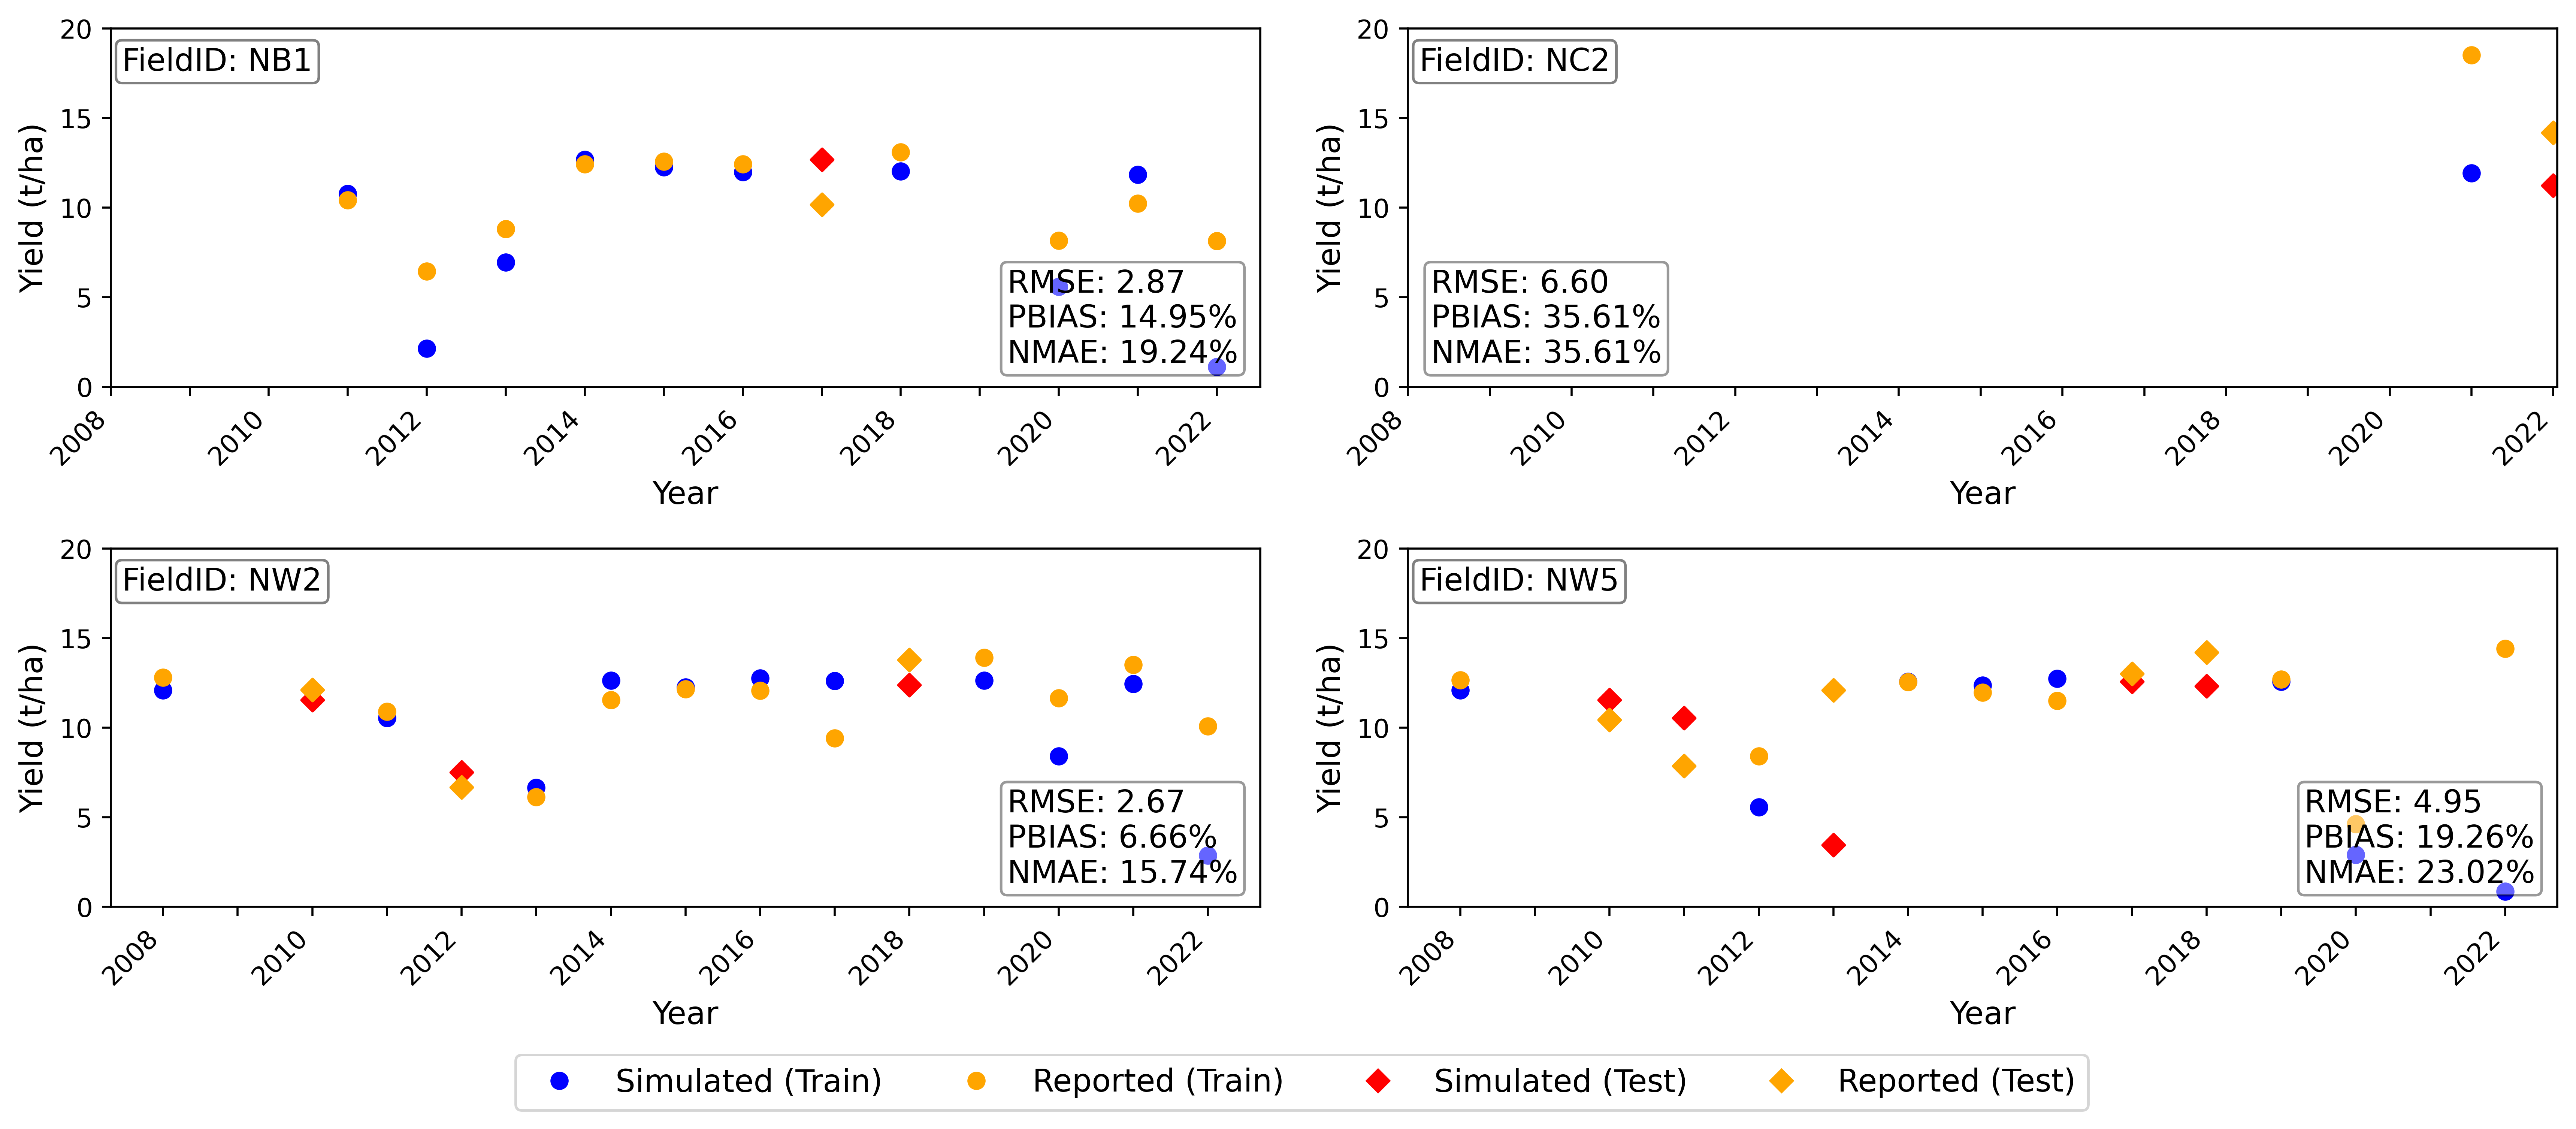

In [14]:
plot_comparison (Traindata[Traindata['FieldID'].isin(['NW2', 'NB1', "NC2", "NW5"])],
                  testdata[testdata['FieldID'].isin(['NW2', 'NB1', "NC2", "NW5"])],reported_col = "Reported_Yield",p =-.01 )

In [15]:
plot_comparison(Traindata.dropna(subset = "Reported_Yield"), testdata.dropna(subset = "Reported_Yield"))

## Irrig

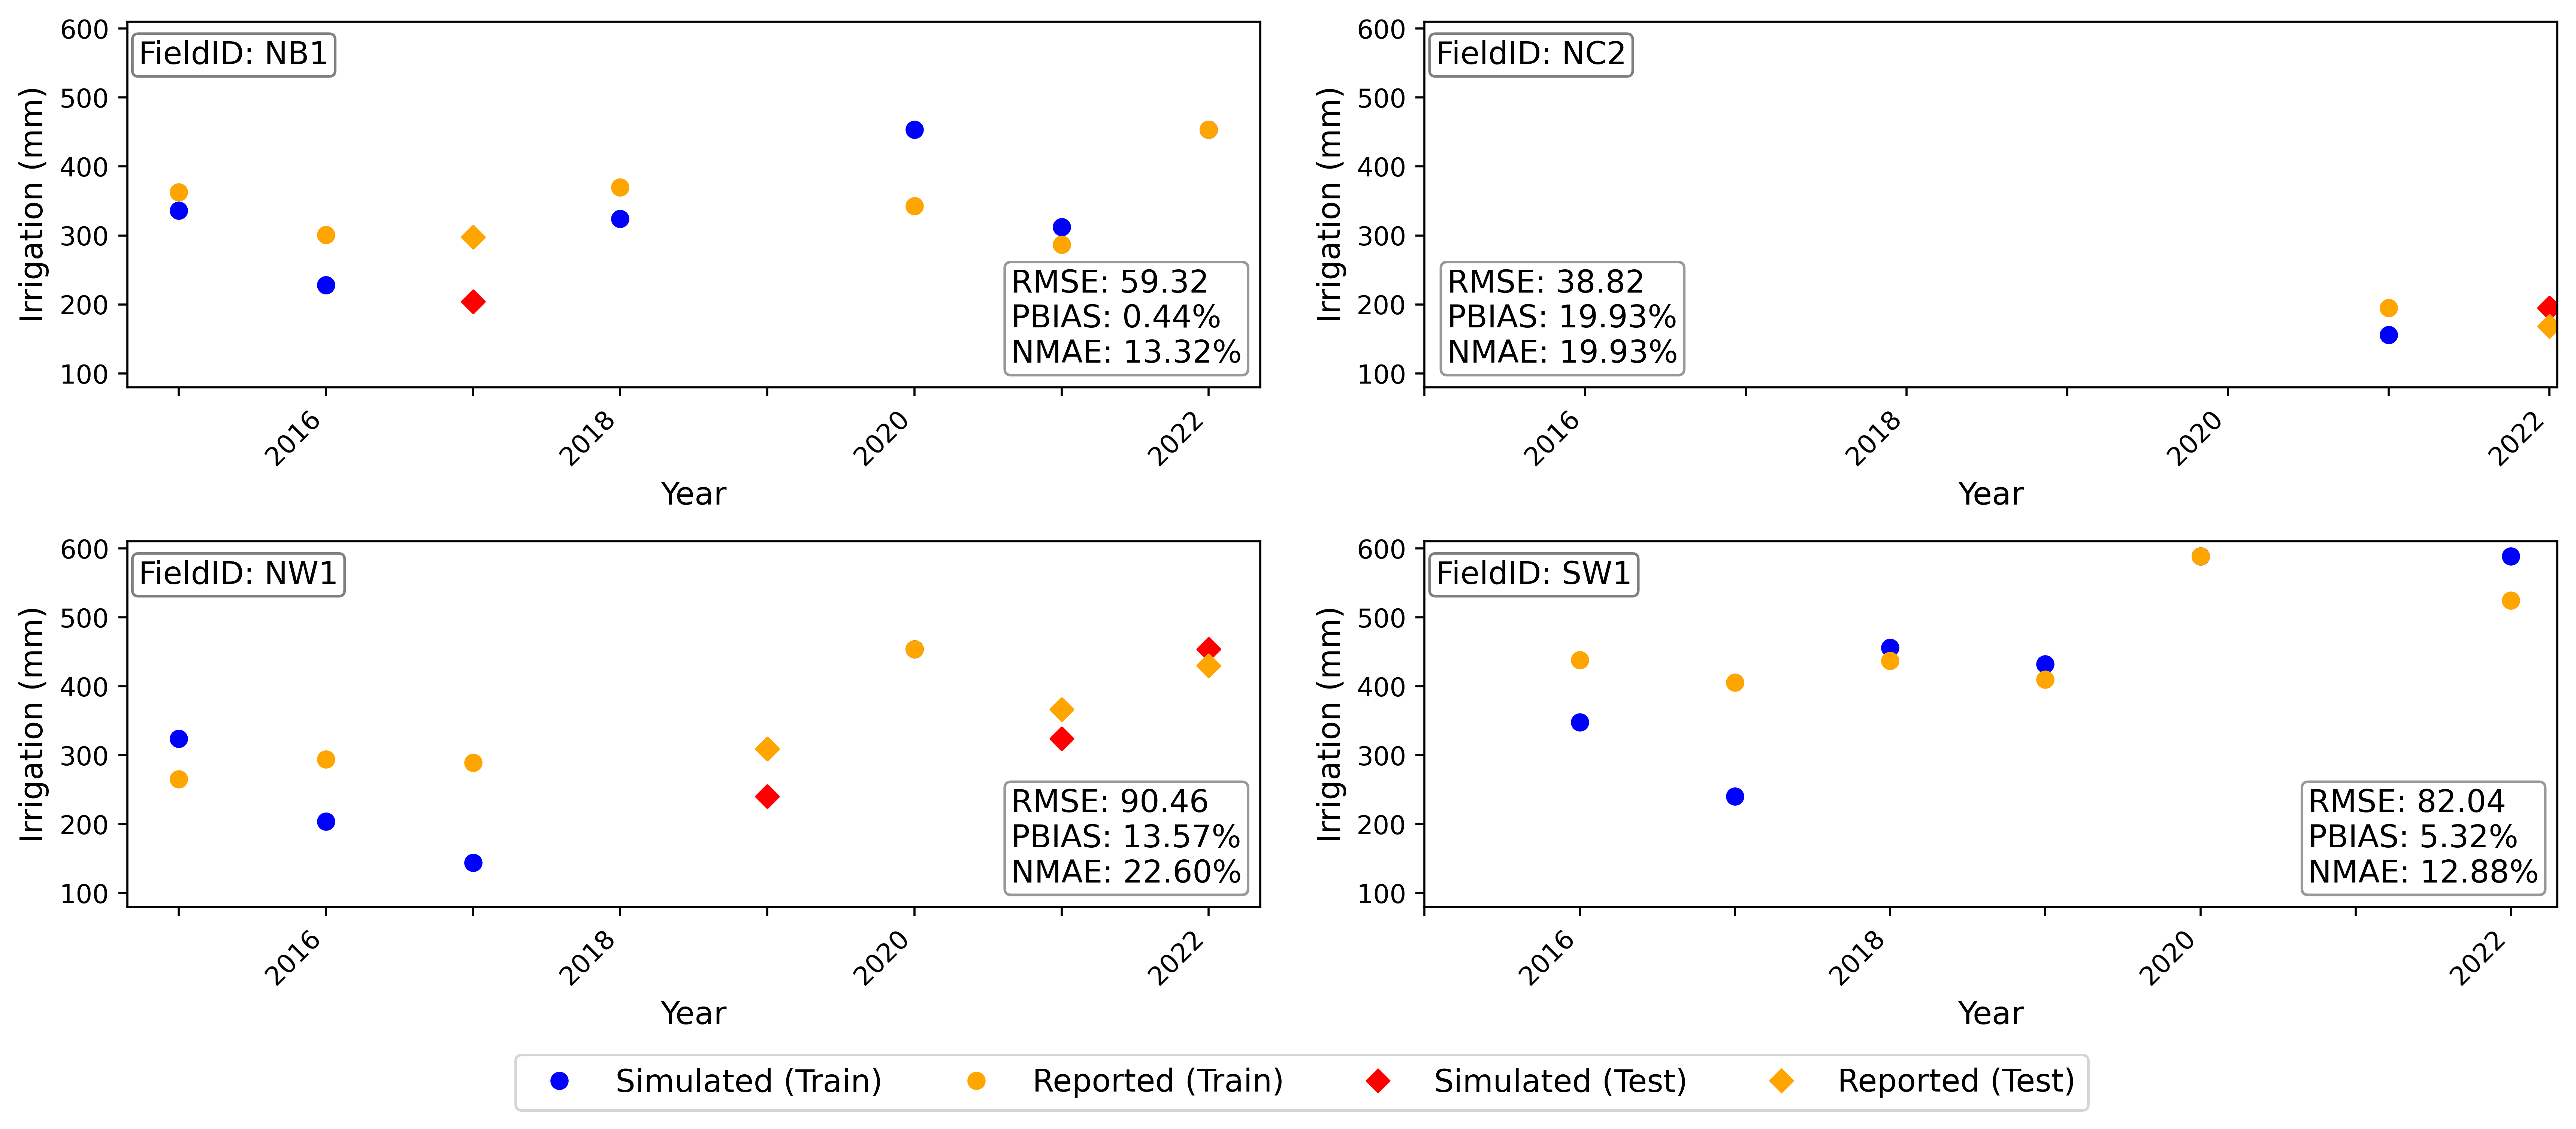

In [22]:
plot_comparison (Traindata[Traindata['FieldID'].isin(['NW1', 'NB1', "SW1", "NC2"])].dropna(subset = "Reported_Irrigation"),
                  testdata[testdata['FieldID'].isin(['NW1', 'NB1', "SW1", "NC2"])].dropna(subset = "Reported_Irrigation"),
                 reported_col = "Reported_Irrigation", simulated_col="Simulated_Irrigation",
                 p =-.01 ,
                ylim=(80, 610), ylabel = "Irrigation (mm)")

In [34]:
plot_comparison(Traindata.dropna(subset = "Reported_Irrigation"),
                testdata.dropna(subset = "Reported_Irrigation"), 
                reported_col = "Reported_Irrigation",
               simulated_col="Simulated_Irrigation", ylim=(120, 650), ylabel = "Irrigation (mm)",
               )

TypeError: plot_comparison() got multiple values for argument 'reported_col'

In [183]:
# plot_comparison (df = simul_reported.loc[simul_reported['FieldID'].isin(['NW3', 'NB1'])].dropna(subset=["Reported_Irrigation"]),
#                  reported_col = "Reported_Irrigation", simulated_col = 'Simulated_Irrigation' )

# WC10 (WC10 to 15 are together): 2017 was a wet year precip:468, it's reasonable to get low irrigation, same for WC24 and  25
# WC26: 2019 reported irrigation 756, make sense as it was a dry year for that field. 2022 was the driest.
    
# WC9 (WC7,8,9 are together): precip was around 400mm (months 4-9). 
    
# In the case of WC8, in 2020 precip was 300mm, and reported irrigation was 544.
# in 2016 precip was 510mm reported irrig was 424.43 mm

In [178]:
len(Traindata.dropna(subset = "Reported_Irrigation"))

61

In [ ]:
# In 2013 other fields needed around 460mm water for a yield of around 6.2 t/ha, while in 2013
# we had a limit of 390mm , hence we have seen lower yield in 2013.

In [24]:
testdata.dropna(subset = "Reported_Irrigation")

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
0   2018     WC1        12.738713             NaN             132.00000   
1   2020     WC1        11.357698             NaN             526.54200   
2   2019     WC6        12.696207             NaN             192.00000   
3   2016     WC5        11.769243             NaN             312.00000   
4   2020     WC5         3.886830             NaN             391.16000   
5   2017     NB1        12.681893       10.184502             204.00000   
6   2019    WC25        12.639002             NaN             204.00000   
7   2019     NW1        12.376560       14.074976             276.00000   
8   2021     NW1        12.041737       11.608880             453.65857   
9   2022     NW1         5.520120        9.591348             453.65857   
12  2018     NW2        12.382942       13.785124             324.00000   
19  2017     NW5        12.570226       13.018462             132.00000   
20  2018     NW5        12.311598       14.203426             312.00000   
21  2018    WC24        12.350285             NaN             336.00000   
22  2022     NC2        11.232505       14.186613             194.81800   
23  2022     NC1        10.972193       15.976164             214.12200   
24  2019     WC9        12.730330             NaN             192.00000   

    Reported_Irrigation Dataset  
0            273.812000    test  
1            360.680000    test  
2            294.640000    test  
3            391.160000    test  
4            370.078000    test  
5            297.575357    test  
6            321.564000    test  
7            309.232497    test  
8            366.544504    test  
9            429.969663    test  
12           250.048215    test  
19           281.983458    test  
20           384.606201    test  
21           424.688000    test  
22           168.402000    test  
23           186.182000    test  
24           388.874000    test

In [26]:
Traindata.dropna(subset = "Reported_Yield")[66:72]

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
74  2016     NW5        12.293668       11.510693            228.000000   
75  2019     NW5        12.337637       12.688932            264.000000   
76  2020     NW5        10.854043        4.621493            390.011099   
77  2022     NW5         8.455522       14.404507            390.011099   
82  2021     NC2        11.826567       18.527670            194.818000   
83  2021     NC1        11.829465       17.357501            214.122000   

    Reported_Irrigation Dataset  
74           287.144696   train  
75           263.777427   train  
76           328.684550   train  
77           390.011099   train  
82           194.818000   train  
83           214.122000   train

In [ ]:
sim: 2.15, rep: 

In [27]:
filtered_data = testdata[testdata['FieldID'].isin(['NW2', 'NB1', "NC1", "NW5"])].dropna(subset = "Reported_Yield")
filtered_data

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
5   2017     NB1        12.681893       10.184502            204.000000   
10  2010     NW2        11.540833       12.111245            240.000000   
11  2012     NW2         7.505198        6.666599            457.354889   
12  2018     NW2        12.382942       13.785124            324.000000   
16  2010     NW5        11.540833       10.427278            240.000000   
17  2011     NW5        10.530926        7.873083            384.000000   
18  2013     NW5         3.462217       12.098467            390.011099   
19  2017     NW5        12.570226       13.018462            132.000000   
20  2018     NW5        12.311598       14.203426            312.000000   
23  2022     NC1        10.972193       15.976164            214.122000   

    Reported_Irrigation Dataset  
5            297.575357    test  
10                  NaN    test  
11                  NaN    test  
12           250.048215    test  
16                  NaN    test  
17                  NaN    test  
18                  NaN    test  
19           281.983458    test  
20           384.606201    test  
23           186.182000    test

In [28]:
filtered_data = Traindata[Traindata['FieldID'].isin(['NW2', 'NB1', "NC1", "NW5"])].dropna(subset = "Reported_Yield")
filtered_data 

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
12  2011     NB1        10.783099       10.431313            348.000000   
13  2012     NB1         2.154645        6.454758            453.614809   
14  2013     NB1         6.959790        8.813925            453.614809   
15  2014     NB1        12.678729       12.430015            396.000000   
16  2015     NB1        12.257748       12.584693            252.000000   
17  2016     NB1        11.992758       12.428670            348.000000   
18  2018     NB1        12.045833       13.101181            360.000000   
19  2020     NB1         5.602566        8.171677            453.614809   
20  2021     NB1        11.853131       10.247718            300.000000   
21  2022     NB1         1.112748        8.145450            453.614809   
36  2008     NW2        12.085101       12.797878            384.000000   
37  2011     NW2        10.530926       10.902071            384.000000   
38  2013     NW2         6.657494        6.129935            457.354889   
39  2014     NW2        12.641907       11.550371            384.000000   
40  2015     NW2        12.260057       12.148906            408.000000   
41  2016     NW2        12.765800       12.058789            180.000000   
42  2017     NW2        12.602482        9.406407            120.000000   
43  2019     NW2        12.625639       13.913574            228.000000   
44  2020     NW2         8.398745       11.659318            457.354889   
45  2021     NW2        12.440232       13.502670            276.000000   
46  2022     NW2         2.874828       10.088333            457.354889   
70  2008     NW5        12.085101       12.655979            384.000000   
71  2012     NW5         5.571254        8.400331            390.011099   
72  2014     NW5        12.579232       12.547705            390.011099   
73  2015     NW5        12.368880       11.964638            390.011099   
74  2016     NW5        12.745236       11.510693            180.000000   
75  2019     NW5        12.562445       12.688932            192.000000   
76  2020     NW5         2.918820        4.621493            390.011099   
77  2022     NW5         0.863853       14.404507            390.011099   
83  2021     NC1        11.951860       17.357501            108.000000   

    Reported_Irrigation Dataset  
12                  NaN   train  
13                  NaN   train  
14                  NaN   train  
15                  NaN   train  
16           362.713507   train  
17           300.984585   train  
18           369.860074   train  
19           342.563728   train  
20           286.767030   train  
21           453.614809   train  
36                  NaN   train  
37                  NaN   train  
38                  NaN   train  
39                  NaN   train  
40           288.890049   train  
41           257.708948   train  
42           266.623213   train  
43           358.629163   train  
44           407.117048   train  
45           284.032913   train  
46           457.354889   train  
70                  NaN   train  
71                  NaN   train  
72                  NaN   train  
73           342.272578   train  
74           287.144696   train  
75           263.777427   train  
76           328.684550   train  
77           390.011099   train  
83           214.122000   train

In [46]:
filtered_data = Traindata[
    Traindata['FieldID'].str.startswith('NC') 
#     testdata['Year'].isin([2012, 2013])
]
filtered_data 

Year FieldID  Simulated_Yield  Reported_Yield  Simulated_Irrigation  \
82  2021     NC2        11.826567       18.527670               194.818   
83  2021     NC1        11.829465       17.357501               214.122   

    Reported_Irrigation Dataset  
82              194.818   train  
83              214.122   train

## Reported data benchmark

In [28]:
# ydff  = pd.read_csv("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/old_codes_And_new_mac_codes/Python_docs/Aquacrop/Data_for_Crop_ML_model/test_data.csv")
# yld_df = ydff[["Year", "FieldID", "Reported_Yield" ]]

ydf= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")

bad_fields = pd.read_csv("../Data_for_Crop_ML_model/bad_fields.csv")
ydf = ydf.merge(bad_fields, on=["Year", "FieldID"], how="left", indicator=True)
ydff = ydf[ydf["_merge"] == "left_only"].drop(columns=["_merge"])# full data filtered should be here

yield_df = ydff[["Reported_Yield"]].dropna()
yield_df["yld_mean"] = yield_df["Reported_Yield"].mean()

irrig_df = ydff[["Reported_Irrigation"]].dropna()

irrig_df["irrig_mean"] = irrig_df["Reported_Irrigation"].mean()


In [29]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# PBIAS
def pbias(predicted, observed):
    return 100.0 * np.sum(observed - predicted) / np.sum(observed)

# Normalized MAE
def nmae(predicted, observed):
    return 100.0 * mean_absolute_error(observed, predicted) / np.mean(observed)

# Wrapper to calculate all metrics
def calc_metrics(predicted, observed):
    return {
        "PBIAS": pbias(predicted, observed),
        "NMAE": nmae(predicted, observed),
        "RMSE": np.sqrt(mean_squared_error(observed, predicted)),
        "R2": r2_score(observed, predicted)
    }


In [30]:
yield_df

Reported_Yield   yld_mean
0         12.428670  11.558373
1         10.184502  11.558373
2         13.101181  11.558373
4          8.171677  11.558373
5         10.247718  11.558373
..              ...        ...
136       10.427278  11.558373
137        7.873083  11.558373
138        8.400331  11.558373
139       12.098467  11.558373
140       12.547705  11.558373

[89 rows x 2 columns]

In [31]:

observed_yield = yield_df["Reported_Yield"].values
baseline_yield = yield_df["yld_mean"].values

yield_metrics = calc_metrics(baseline_yield, observed_yield)

# --- irrigation metrics (dropping NaNs) ---

observed_irrig = irrig_df["Reported_Irrigation"].values
baseline_irrig = irrig_df["irrig_mean"].values

irrig_metrics = calc_metrics(baseline_irrig, observed_irrig)

print("Yield metrics:", yield_metrics)
print("Irrigation metrics:", irrig_metrics)


Yield metrics: {'PBIAS': 1.4505168416263594e-14, 'NMAE': 18.65024684511825, 'RMSE': 2.716969539218255, 'R2': 0.0}
Irrigation metrics: {'PBIAS': -1.5473775432491838e-14, 'NMAE': 18.976243341591786, 'RMSE': 82.4770416131328, 'R2': 0.0}


## Metrices comparison

In [33]:
df =pd.read_excel("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/model_performance.xlsx")
df['Model'] = df['Model'].replace('NAGA_II Calibrated', 'NSGA-II Calibrated')
df = df[df['Metric'] != 'R2']
df

Metric  Yield  Irrigation                         Model    dftype
0   RMSE [t/ha]   3.78       97.37                PSO Calibrated  Test Set
1         PBIAS  12.78       12.65                PSO Calibrated  Test Set
2          NMAE  23.33       25.49                PSO Calibrated  Test Set
4   RMSE [t/ha]   3.22       86.15       NSGA-II Yield Optimized  Test Set
5         PBIAS   7.43        6.95       NSGA-II Yield Optimized  Test Set
6          NMAE  18.43       18.50       NSGA-II Yield Optimized  Test Set
8   RMSE [t/ha]    NaN       70.40  NSGA-II Irrigation Optimized  Test Set
9         PBIAS    NaN       -1.88  NSGA-II Irrigation Optimized  Test Set
10         NMAE    NaN       15.07  NSGA-II Irrigation Optimized  Test Set
12  RMSE [t/ha]   3.97       77.10              NSGA-II Balanced  Test Set
13        PBIAS  14.97       -1.01              NSGA-II Balanced  Test Set
14         NMAE  24.49       15.82              NSGA-II Balanced  Test Set
16  RMSE [t/ha]   1.69       57.98                       XGBoost  Test Set
17        PBIAS  -0.42       -0.01                       XGBoost  Test Set
18         NMAE  11.26       13.39                       XGBoost  Test Set
20  RMSE [t/ha]   2.71       82.47                     Benchmark       NaN
21        PBIAS   0.00        0.00                     Benchmark       NaN
22         NMAE  18.65       19.00                     Benchmark       NaN

Text(0, 0.5, 'Yield Performance')

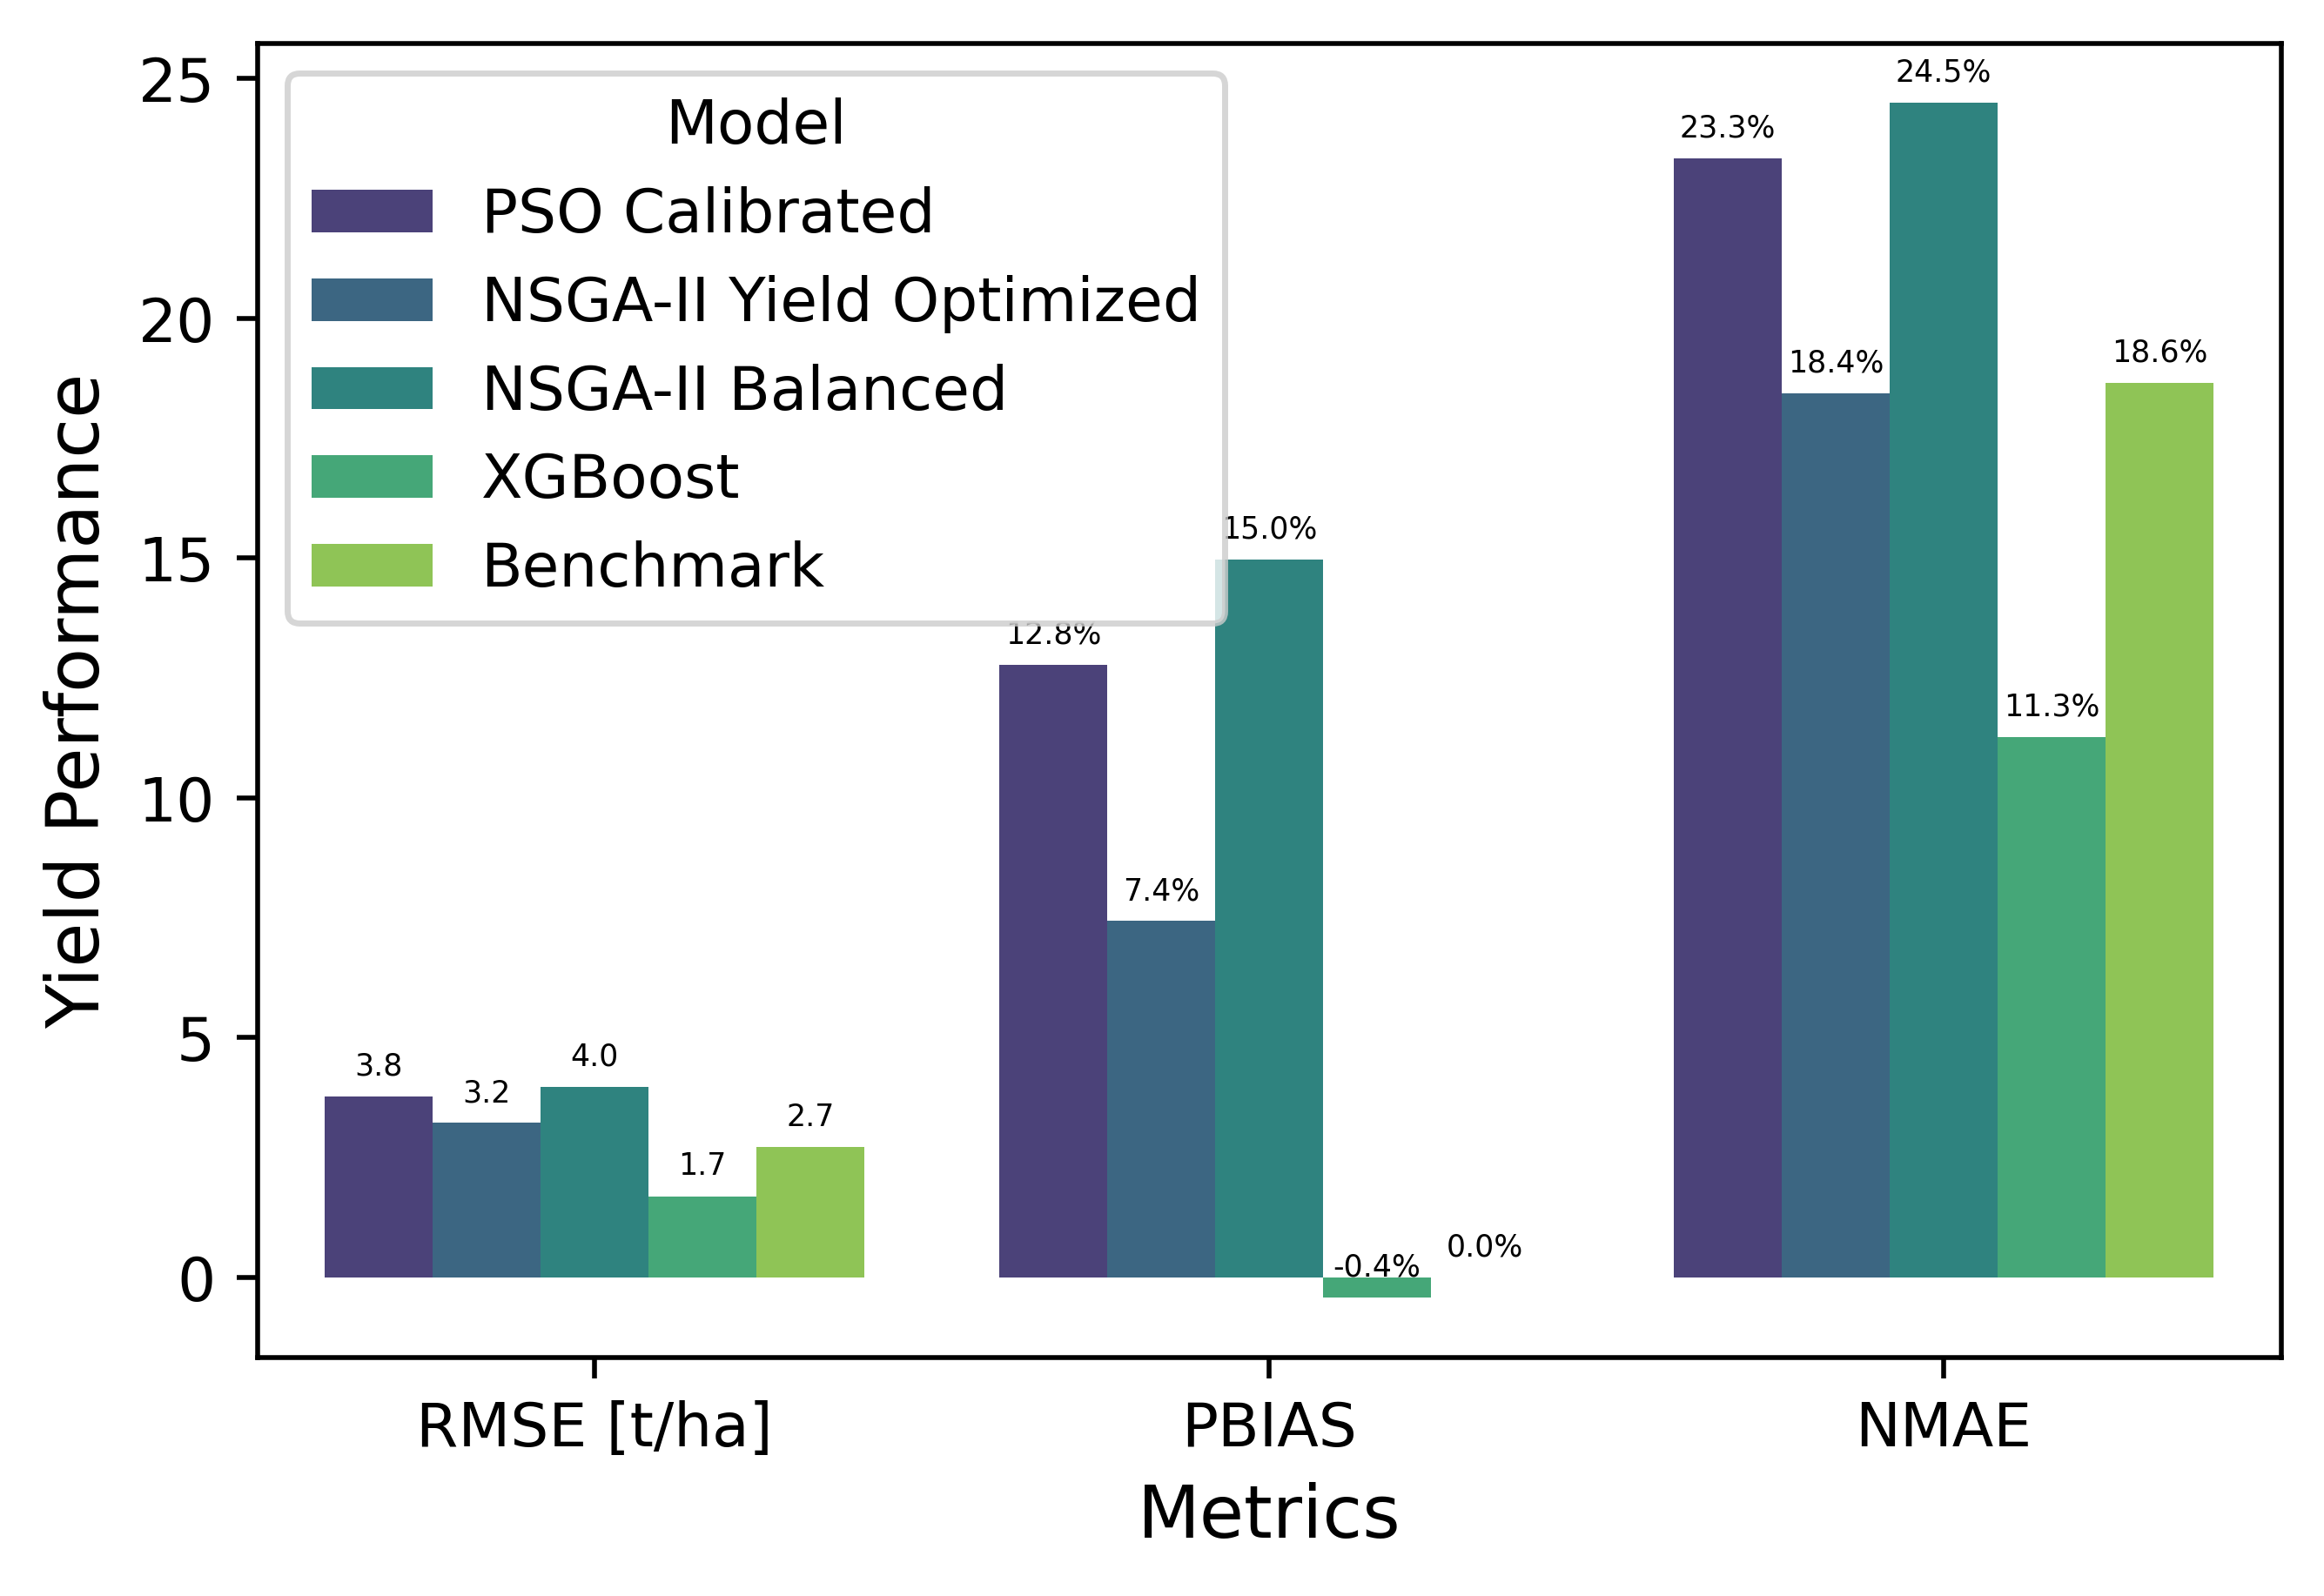

In [37]:
# Create the bar plot
ax = sns.barplot(data=df[df['Model'] != 'NSGA-II Irrigation Optimized'], x="Metric", y="Yield", hue="Model",palette="viridis" )

# Loop through bars and original data together
for p, (_, row) in zip(ax.patches, df.iterrows()):
    value = p.get_height()
    metric = row['Metric']

    # Format based on metric type
    if metric in ['PBIAS', 'NMAE']:
        formatted_value = f'{value:.1f}%'
    else:
        formatted_value = f'{value:.1f}'

    # Annotate
    ax.annotate(formatted_value, 
                (p.get_x() + p.get_width() / 2., value), 
                ha='center', va='center', 
                fontsize=5, color='black', 
                xytext=(0, 5), textcoords='offset points')
    
plt.xlabel("Metrics", fontsize = 12)
plt.ylabel("Yield Performance", fontsize = 12)


Text(0, 0.5, 'Irrigation Performance')

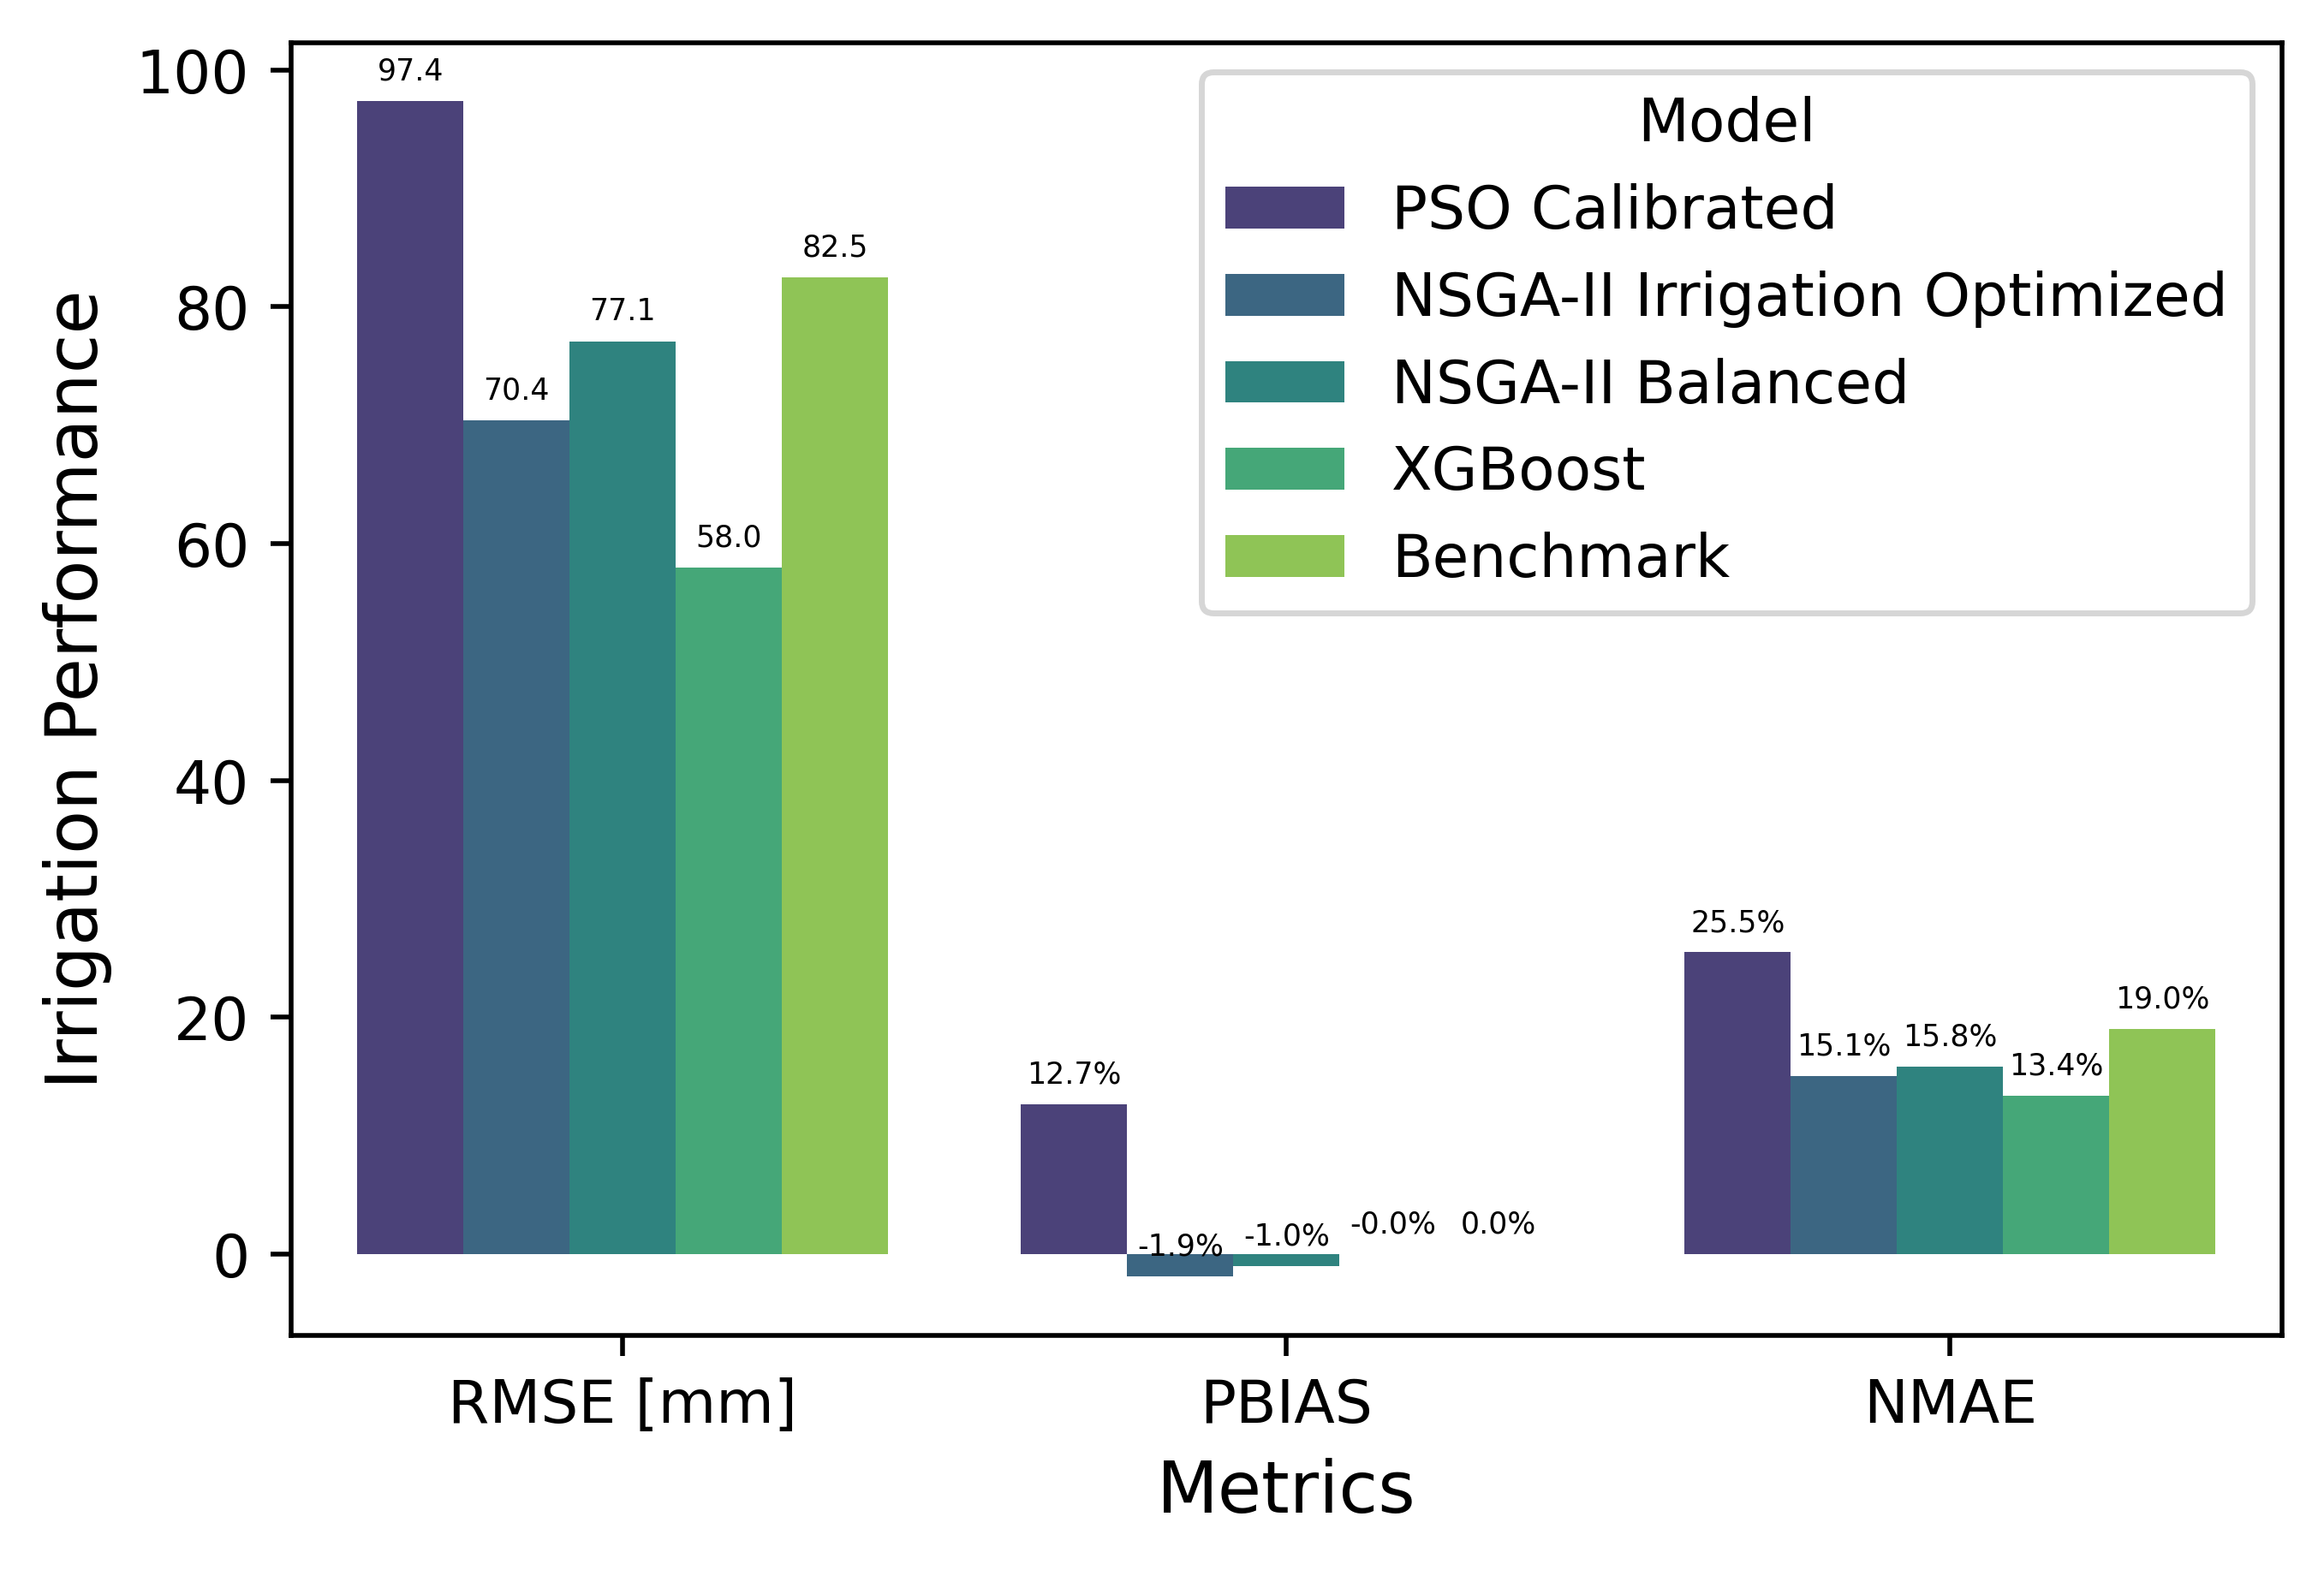

In [38]:
df['Metric'] = df['Metric'].replace('RMSE [t/ha]', 'RMSE [mm]')
ax = sns.barplot(data =df[df['Model'] != 'NSGA-II Yield Optimized'], x = "Metric",y = "Irrigation", hue ="Model", palette="viridis")
for p, (_, row) in zip(ax.patches, df.iterrows()):
    value = p.get_height()
    metric = row['Metric']

    # Format based on metric type
    if metric in ['PBIAS', 'NMAE']:
        formatted_value = f'{value:.1f}%'
    else:
        formatted_value = f'{value:.1f}'

    # Annotate
    ax.annotate(formatted_value, 
                (p.get_x() + p.get_width() / 2., value), 
                ha='center', va='center', 
                fontsize=5, color='black', 
                xytext=(0, 5), textcoords='offset points')



plt.xlabel("Metrics", fontsize = 12)
plt.ylabel("Irrigation Performance", fontsize = 12)

In [14]:
# # Assuming your DataFrame is named df and has columns: "Model", "Metric", "Yield"
# df['Zscore_Yield'] = df.groupby('Metric')['Yield'].transform(
#     lambda x: (x - x.mean()) / x.std()
# )
# df

## Yield_resid

In [15]:
yld_df = simul_reported.dropna(subset=["Reported_Yield", 'Simulated_Yield'])[["FieldID","Reported_Yield", 'Simulated_Yield',
                                                                             "field_region","Year"]]

yld_df["Yield_Residual"] = yld_df["Reported_Yield"] - yld_df ["Simulated_Yield"]
yld_df                                                                           

NameError: name 'simul_reported' is not defined

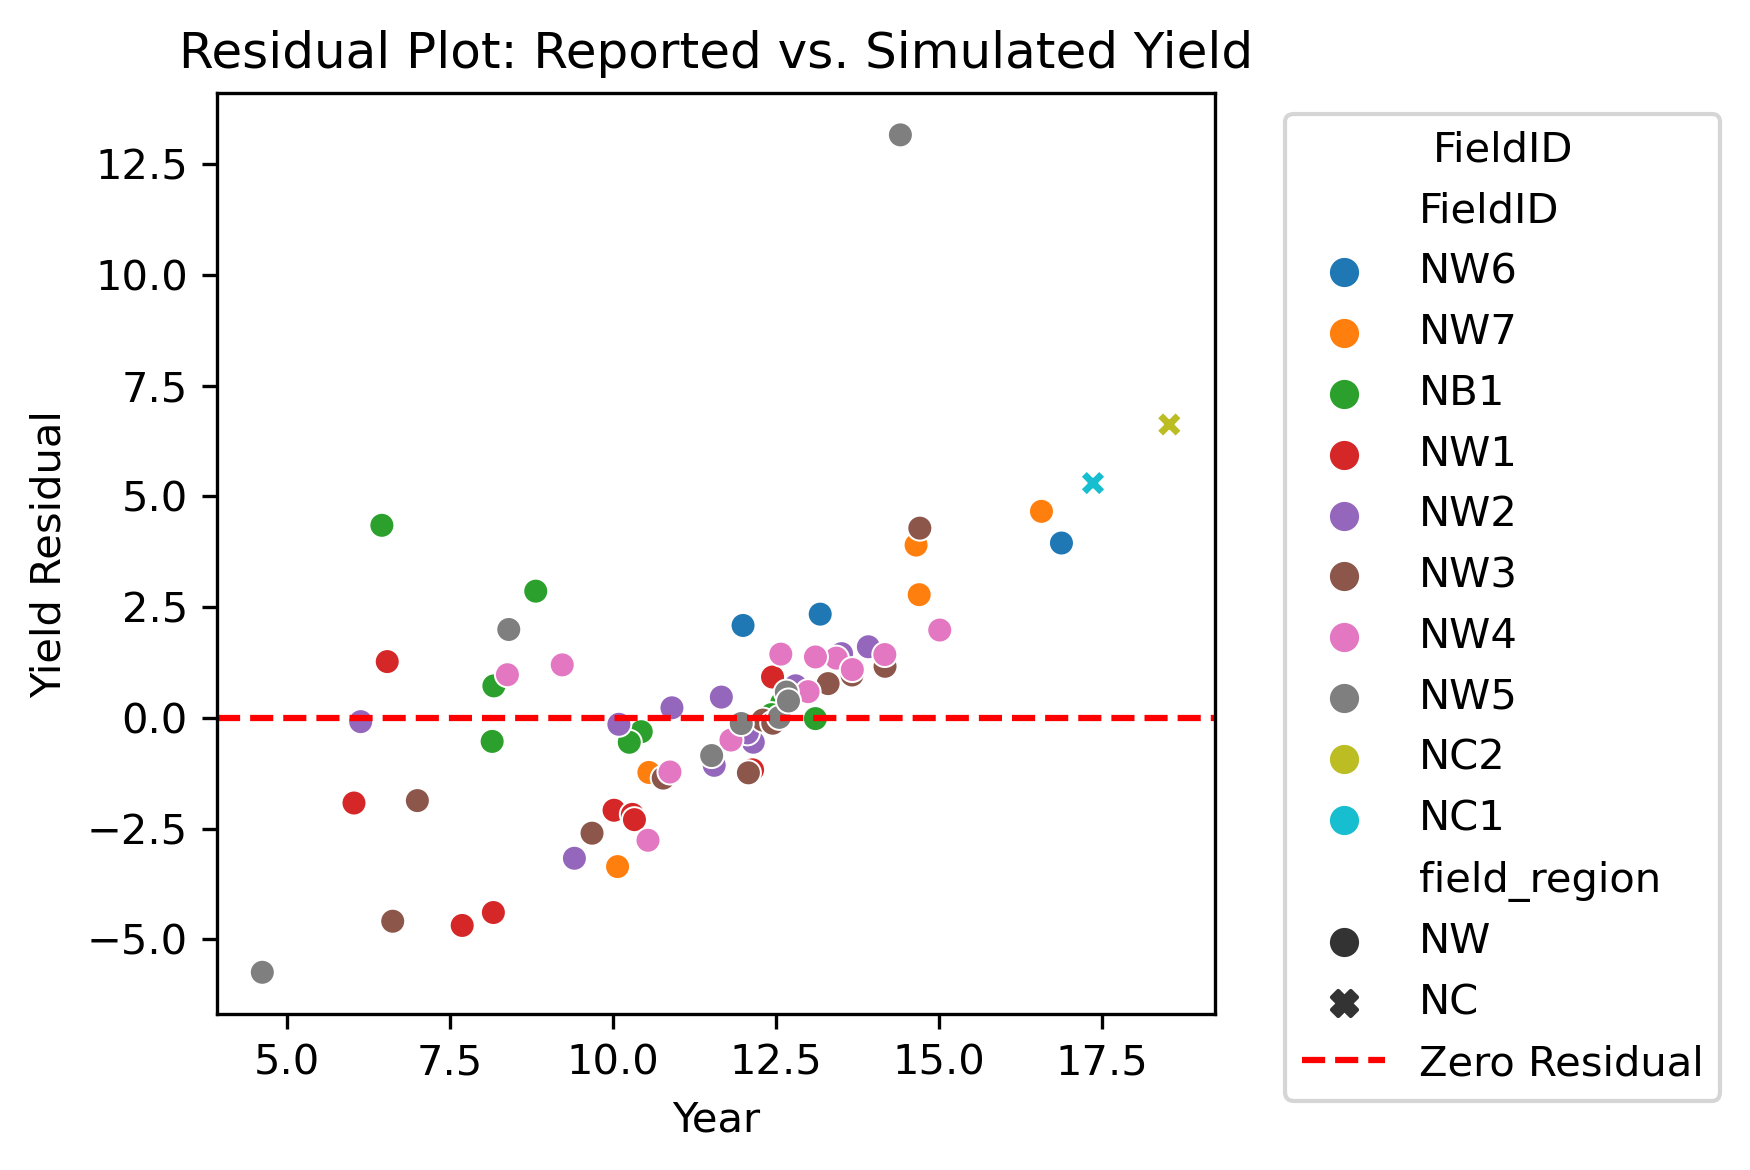

In [82]:
sns.scatterplot(
    data=yld_df,
    x="Reported_Yield",
    y="Yield_Residual",
    hue="FieldID",
    style="field_region", 
    palette="tab10"
)

# Add labels and title
plt.axhline(0, color="red", linestyle="--", label="Zero Residual")  # Highlight zero residual line
plt.title("Residual Plot: Reported vs. Simulated Yield")
plt.xlabel("Year")
plt.ylabel("Yield Residual")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="FieldID")
plt.tight_layout()

<Axes: xlabel='Yield_Residual', ylabel='Count'>

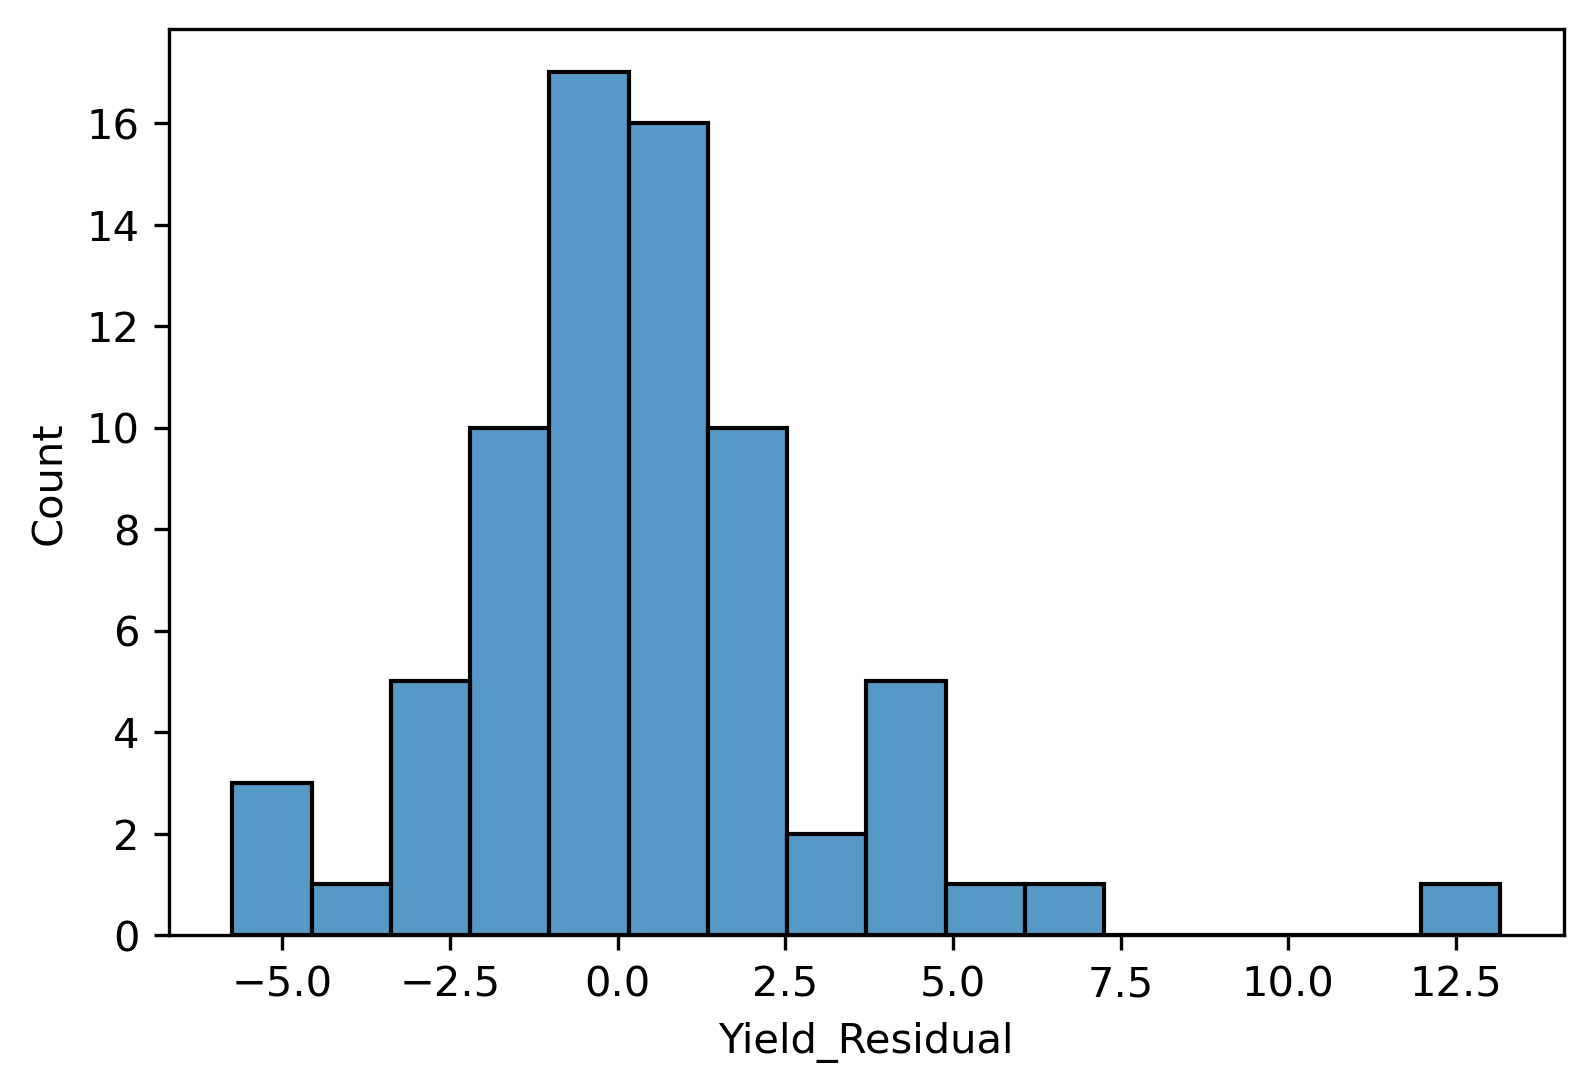

In [83]:
sns.histplot(yld_df["Yield_Residual"])

## irrigation_resid

In [84]:
irr_df = simul_reported.dropna(subset=["Reported_Irrigation", 'Simulated_Irrigation'])[["FieldID","Reported_Irrigation", 'Simulated_Irrigation',
                                                                             "field_region","Year"]]

irr_df ["Irrigation_Residual"] = irr_df["Reported_Irrigation"] - irr_df['Simulated_Irrigation']
irr_df

FieldID  Reported_Irrigation  Simulated_Irrigation field_region  Year  \
0      WC2           283.718000            324.000000           WC  2019   
1      WC3           288.544000            288.544000           WC  2019   
2      WC4           373.634000            413.004000           WC  2020   
5      NW6           386.218442            276.000000           NW  2018   
10     NW7           390.581213            509.420734           NW  2020   
..     ...                  ...                   ...          ...   ...   
86     SW1           405.270174            384.000000           SW  2017   
87     SW1           436.754370            336.000000           SW  2018   
88     SW1           409.618317            408.000000           SW  2019   
89     SW1           588.408179            588.408179           SW  2020   
90     SW1           524.066290            588.408179           SW  2022   

    Irrigation_Residual  
0         -4.028200e+01  
1          0.000000e+00  
2         -3.937000e+01  
5          1.102184e+02  
10        -1.188395e+02  
..                  ...  
86         2.127017e+01  
87         1.007544e+02  
88         1.618317e+00  
89        -3.920002e-08  
90        -6.434189e+01  

[61 rows x 6 columns]

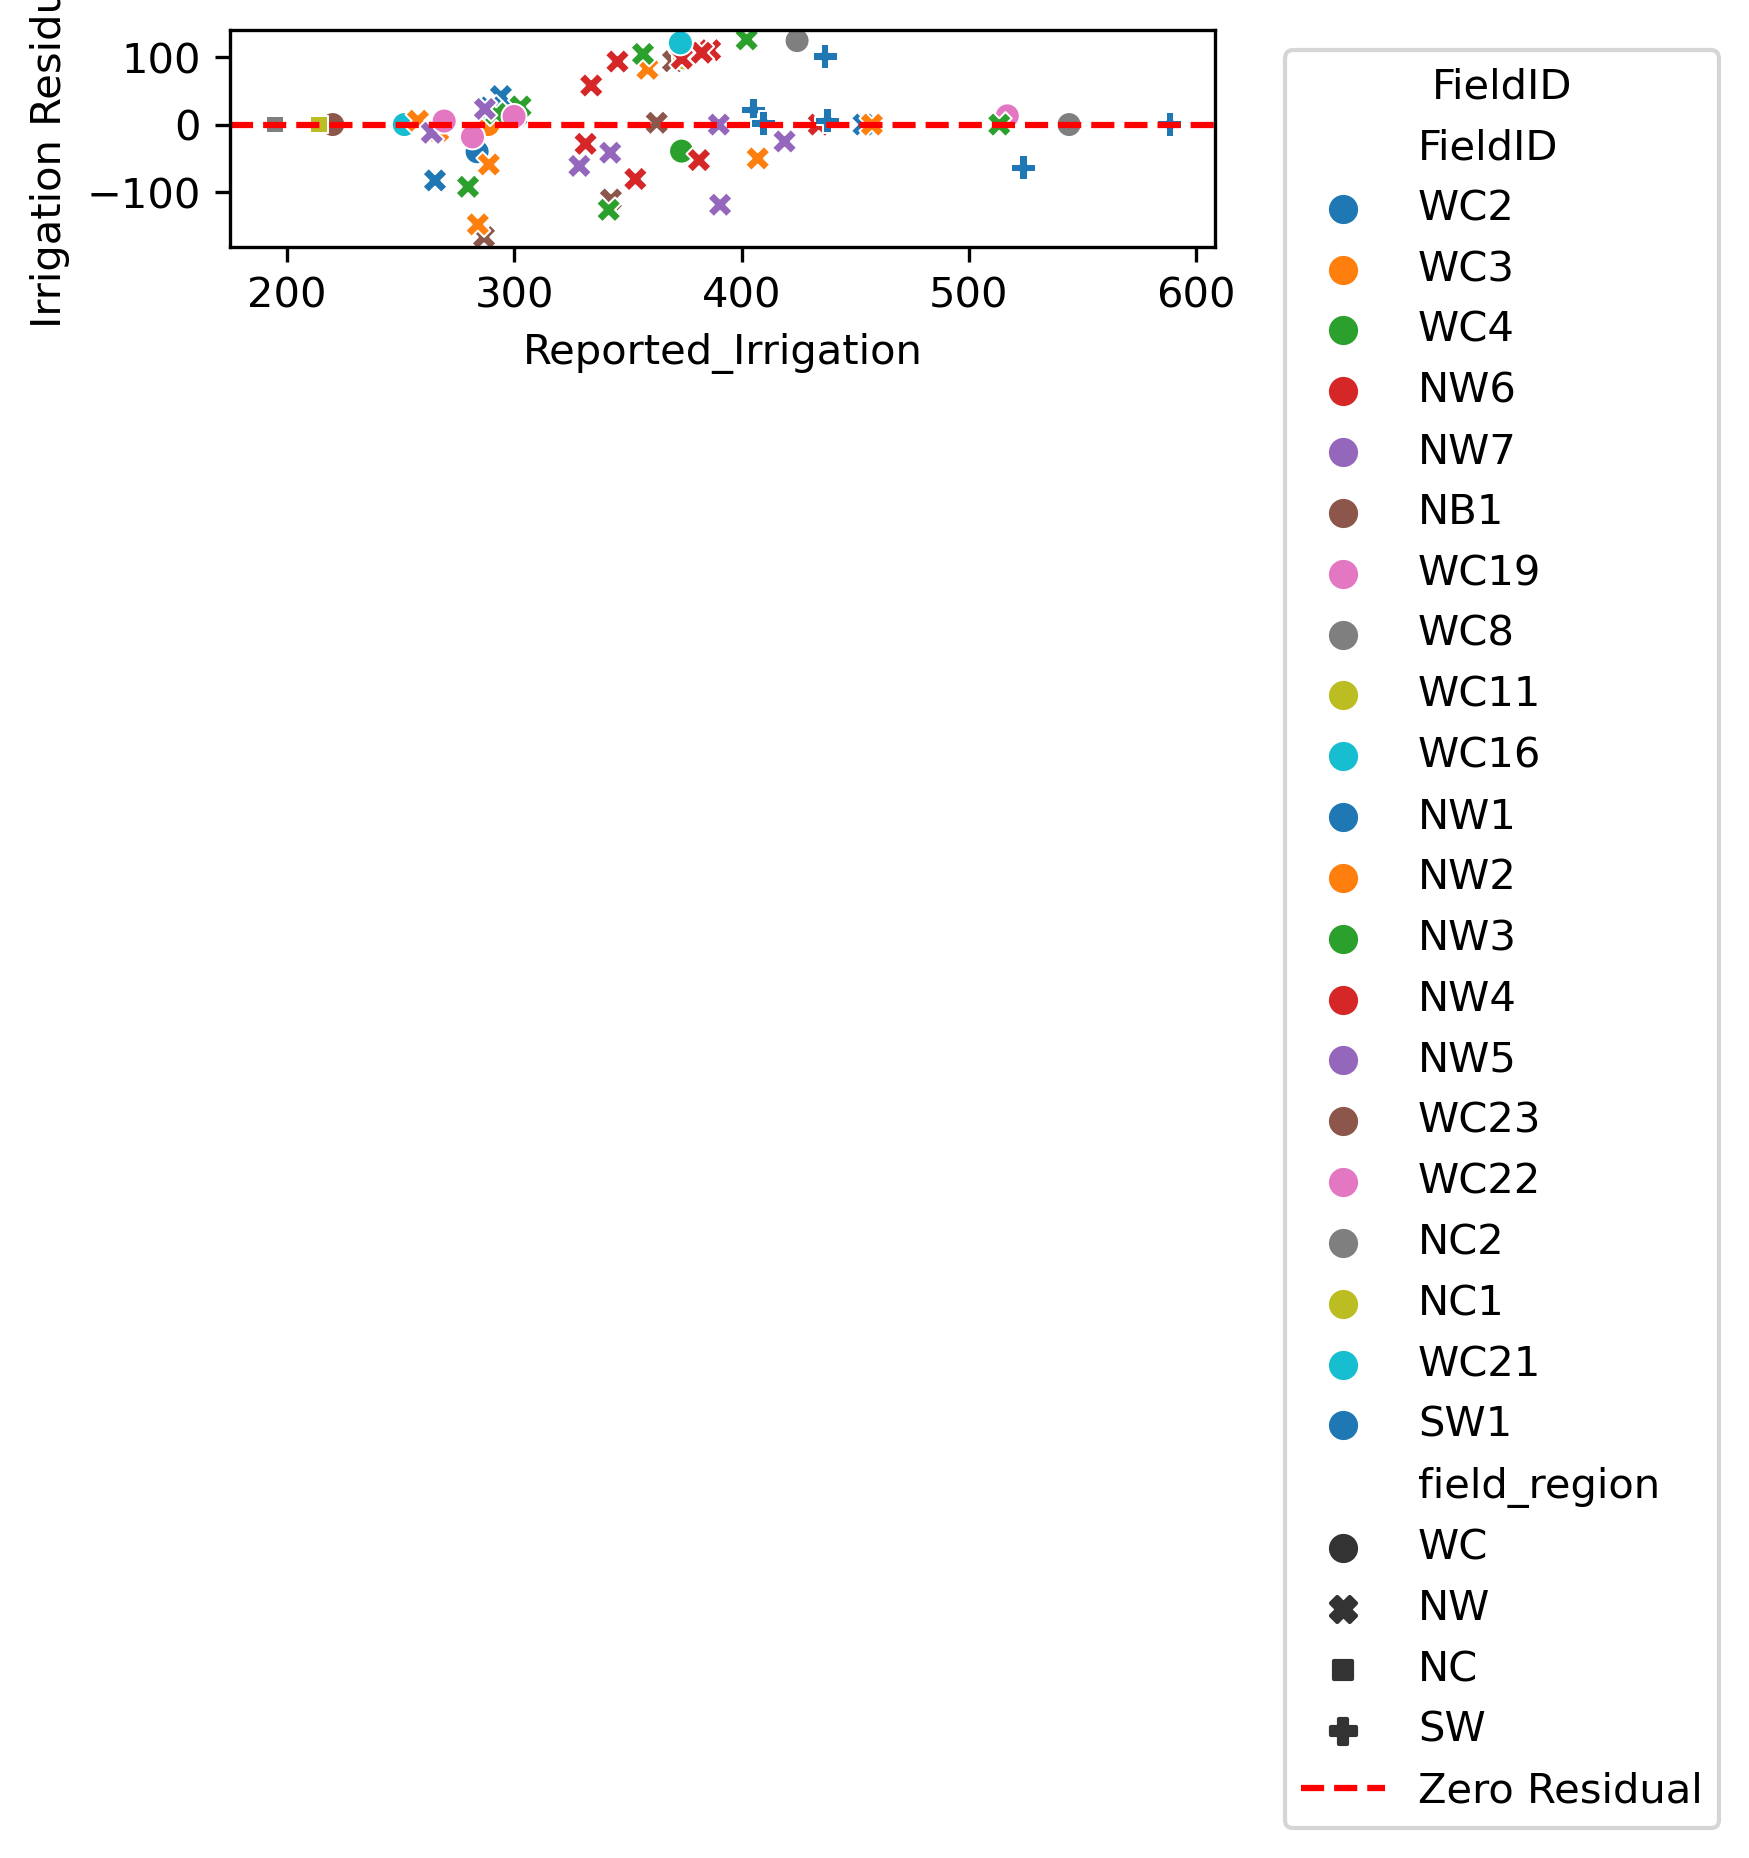

In [86]:
sns.scatterplot(
    data=irr_df,
    x="Reported_Irrigation",
    y="Irrigation_Residual",
    hue="FieldID",
    style="field_region", 
    palette="tab10"
)

# Add labels and title
plt.axhline(0, color="red", linestyle="--", label="Zero Residual")  # Highlight zero residual line
# plt.xlabel("Year")
plt.ylabel("Irrigation Residual")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="FieldID")
plt.tight_layout()

<Axes: xlabel='Irrigation_Residual', ylabel='Density'>

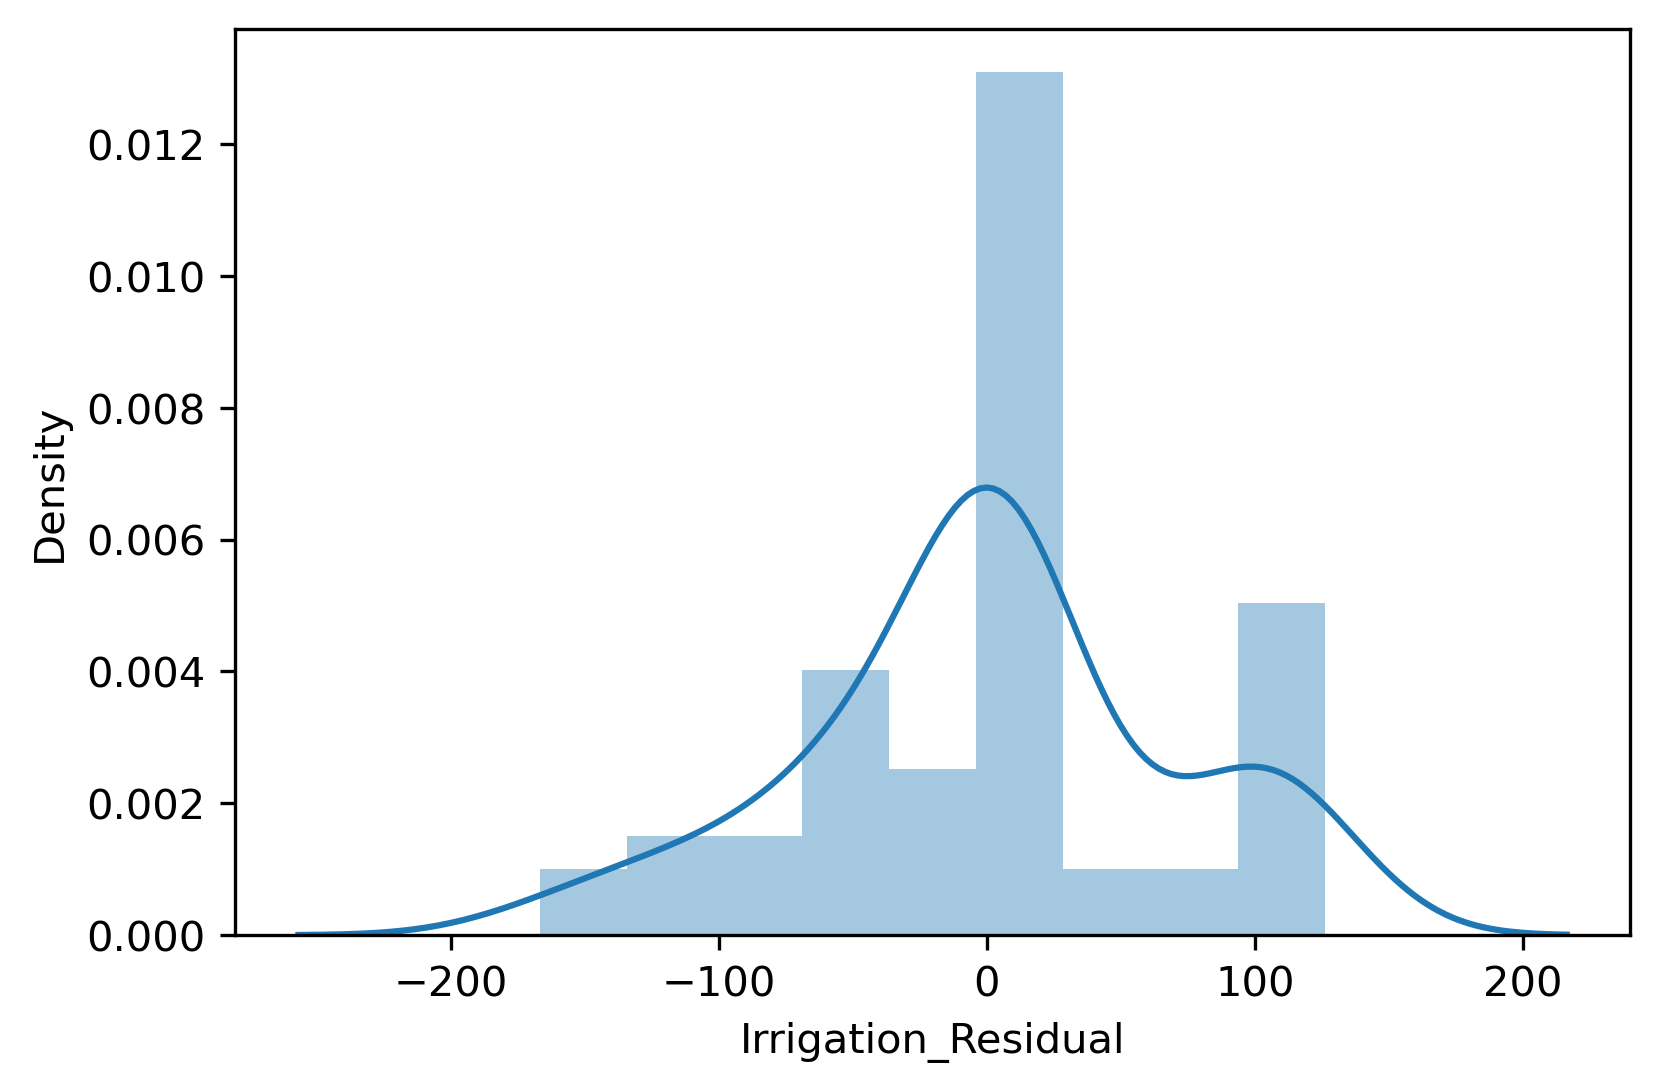

In [87]:
sns.distplot(irr_df["Irrigation_Residual"])

## Checking WC and other fields yield and irrigation relationship with other vaiables 

In [88]:
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 4) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns={"fid": "FieldID"}, inplace =True)
df

Date FieldID    MinTemp    MaxTemp  ReferenceET  Precipitation  \
3870   2006-04-01     WC1   3.328241  26.153650     6.052249            0.0   
3871   2006-04-01     WC2   3.328241  26.153650     6.052249            0.0   
3872   2006-04-01     WC3   3.314142  26.179620     6.057568            0.0   
3873   2006-04-01     WC6   3.319269  26.170177     6.055634            0.0   
3874   2006-04-01     WC4   3.318842  26.170964     6.055795            0.0   
...           ...     ...        ...        ...          ...            ...   
263026 2022-09-30     SW2  11.649988  32.749994     8.600000            0.0   
263027 2022-09-30    WC10  11.350000  33.050012     8.700000            0.0   
263028 2022-09-30    WC14  11.350000  33.050012     8.700000            0.0   
263029 2022-09-30     WC7  11.050012  33.350000     8.700000            0.0   
263030 2022-09-30    WC27  11.350000  33.149988     8.800000            0.0   

        Year  Month  
3870    2006      4  
3871    2006      4  
3872    2006      4  
3873    2006      4  
3874    2006      4  
...      ...    ...  
263026  2022      9  
263027  2022      9  
263028  2022      9  
263029  2022      9  
263030  2022      9  

[133773 rows x 8 columns]

In [89]:
df = df.groupby(['FieldID','Year']).agg({
                                            'MinTemp': 'mean',          # Monthly mean for MinTemp
                                            'MaxTemp': 'mean',          # Monthly mean for MaxTemp
                                            'ReferenceET': 'sum',       # Monthly sum for ReferenceET
                                            'Precipitation': 'sum'      # Monthly sum for Precipitation
                                        }).reset_index()

df

FieldID  Year    MinTemp    MaxTemp  ReferenceET  Precipitation
0       NB1  2006  11.430431  28.409335  1096.460794     363.366572
1       NB1  2007  11.979758  27.310205  1021.756148     432.960232
2       NB1  2008  10.214998  26.484155  1014.226403     390.295623
3       NB1  2009  10.491335  25.498292   911.856994     521.694061
4       NB1  2010  11.290497  27.691664  1074.746407     573.878163
..      ...   ...        ...        ...          ...            ...
726     WC9  2018  12.747814  28.493716  1148.999997     431.400004
727     WC9  2019  12.599180  28.195355  1086.899998     358.799996
728     WC9  2020  11.534699  28.235792  1163.900000     299.800003
729     WC9  2021  12.311202  28.424863  1114.600000     339.000002
730     WC9  2022  12.105192  29.878416  1254.199998     199.300000

[731 rows x 6 columns]

In [90]:
wcs = df[df["FieldID"].str.startswith("WC")]
wcs.groupby(["Year"])["Precipitation"].mean()

Year
2006    319.258430
2007    348.983002
2008    299.523259
2009    404.994994
2010    433.555770
2011    264.225404
2012    210.190193
2013    379.393237
2014    445.863431
2015    557.771965
2016    517.303705
2017    490.789564
2018    441.104657
2019    371.079854
2020    306.613469
2021    343.504603
2022    205.586925
Name: Precipitation, dtype: float64

In [91]:
sim_rep_withWeather = pd.merge(df,simul_reported, on= ["Year", "FieldID"], how ="inner")
sim_rep_withWeather

FieldID  Year    MinTemp    MaxTemp  ReferenceET  Precipitation  Season  \
0      NB1  2011  11.229627  28.564089  1118.107862     474.970973       5   
1      NB1  2012  12.534110  30.761862  1293.016886     222.581841       6   
2      NB1  2013  11.039597  27.898722  1089.067368     333.387165       7   
3      NB1  2014  10.944669  27.329346  1043.143104     467.225865       8   
4      NB1  2015  11.957486  27.780480  1037.954087     476.363486       9   
..     ...   ...        ...        ...          ...            ...     ...   
86    WC23  2019  12.521586  28.246176  1087.800000     392.900000      13   
87     WC3  2019  12.521586  28.246176  1087.800000     392.900000      13   
88     WC4  2020  11.459654  28.311931  1166.799999     290.000002      14   
89     WC8  2016  12.993715  28.262569  1101.299999     510.799997      10   
90     WC8  2020  11.534699  28.235792  1163.900000     299.800003      14   

   crop Type Harvest Date (YYYY/MM/DD)  Harvest Date (Step)  Simulated_Yield  \
0   MaizeGDD                2011-09-20                 2087        10.744660   
1   MaizeGDD                2012-08-27                 2429         2.107178   
2   MaizeGDD                2013-09-18                 2816         5.953489   
3   MaizeGDD                2014-09-25                 3188        12.424843   
4   MaizeGDD                2015-09-23                 3551        12.249768   
..       ...                       ...                  ...              ...   
86  MaizeGDD                2019-09-25                 5014        10.275107   
87  MaizeGDD                2019-09-25                 5014        12.117811   
88  MaizeGDD                2020-09-27                 5382        10.633916   
89  MaizeGDD                2016-09-20                 3914        12.069517   
90  MaizeGDD                2020-09-26                 5381        12.276559   

    Simulated_Irrigation  Unnamed: 0  Reported_Yield  Reported_Irrigation  \
0             312.000000         109       10.431313                  NaN   
1             453.614809         110        6.454758                  NaN   
2             453.614809         111        8.813925                  NaN   
3             420.000000         112       12.430015                  NaN   
4             360.000000          98       12.584693           362.713507   
..                   ...         ...             ...                  ...   
86            220.218000          76             NaN           220.218000   
87            288.544000          81             NaN           288.544000   
88            413.004000          84             NaN           373.634000   
89            300.000000          90             NaN           424.434000   
90            544.068000          91             NaN           544.068000   

   field_region  
0            NW  
1            NW  
2            NW  
3            NW  
4            NW  
..          ...  
86           WC  
87           WC  
88           WC  
89           WC  
90           WC  

[91 rows x 16 columns]

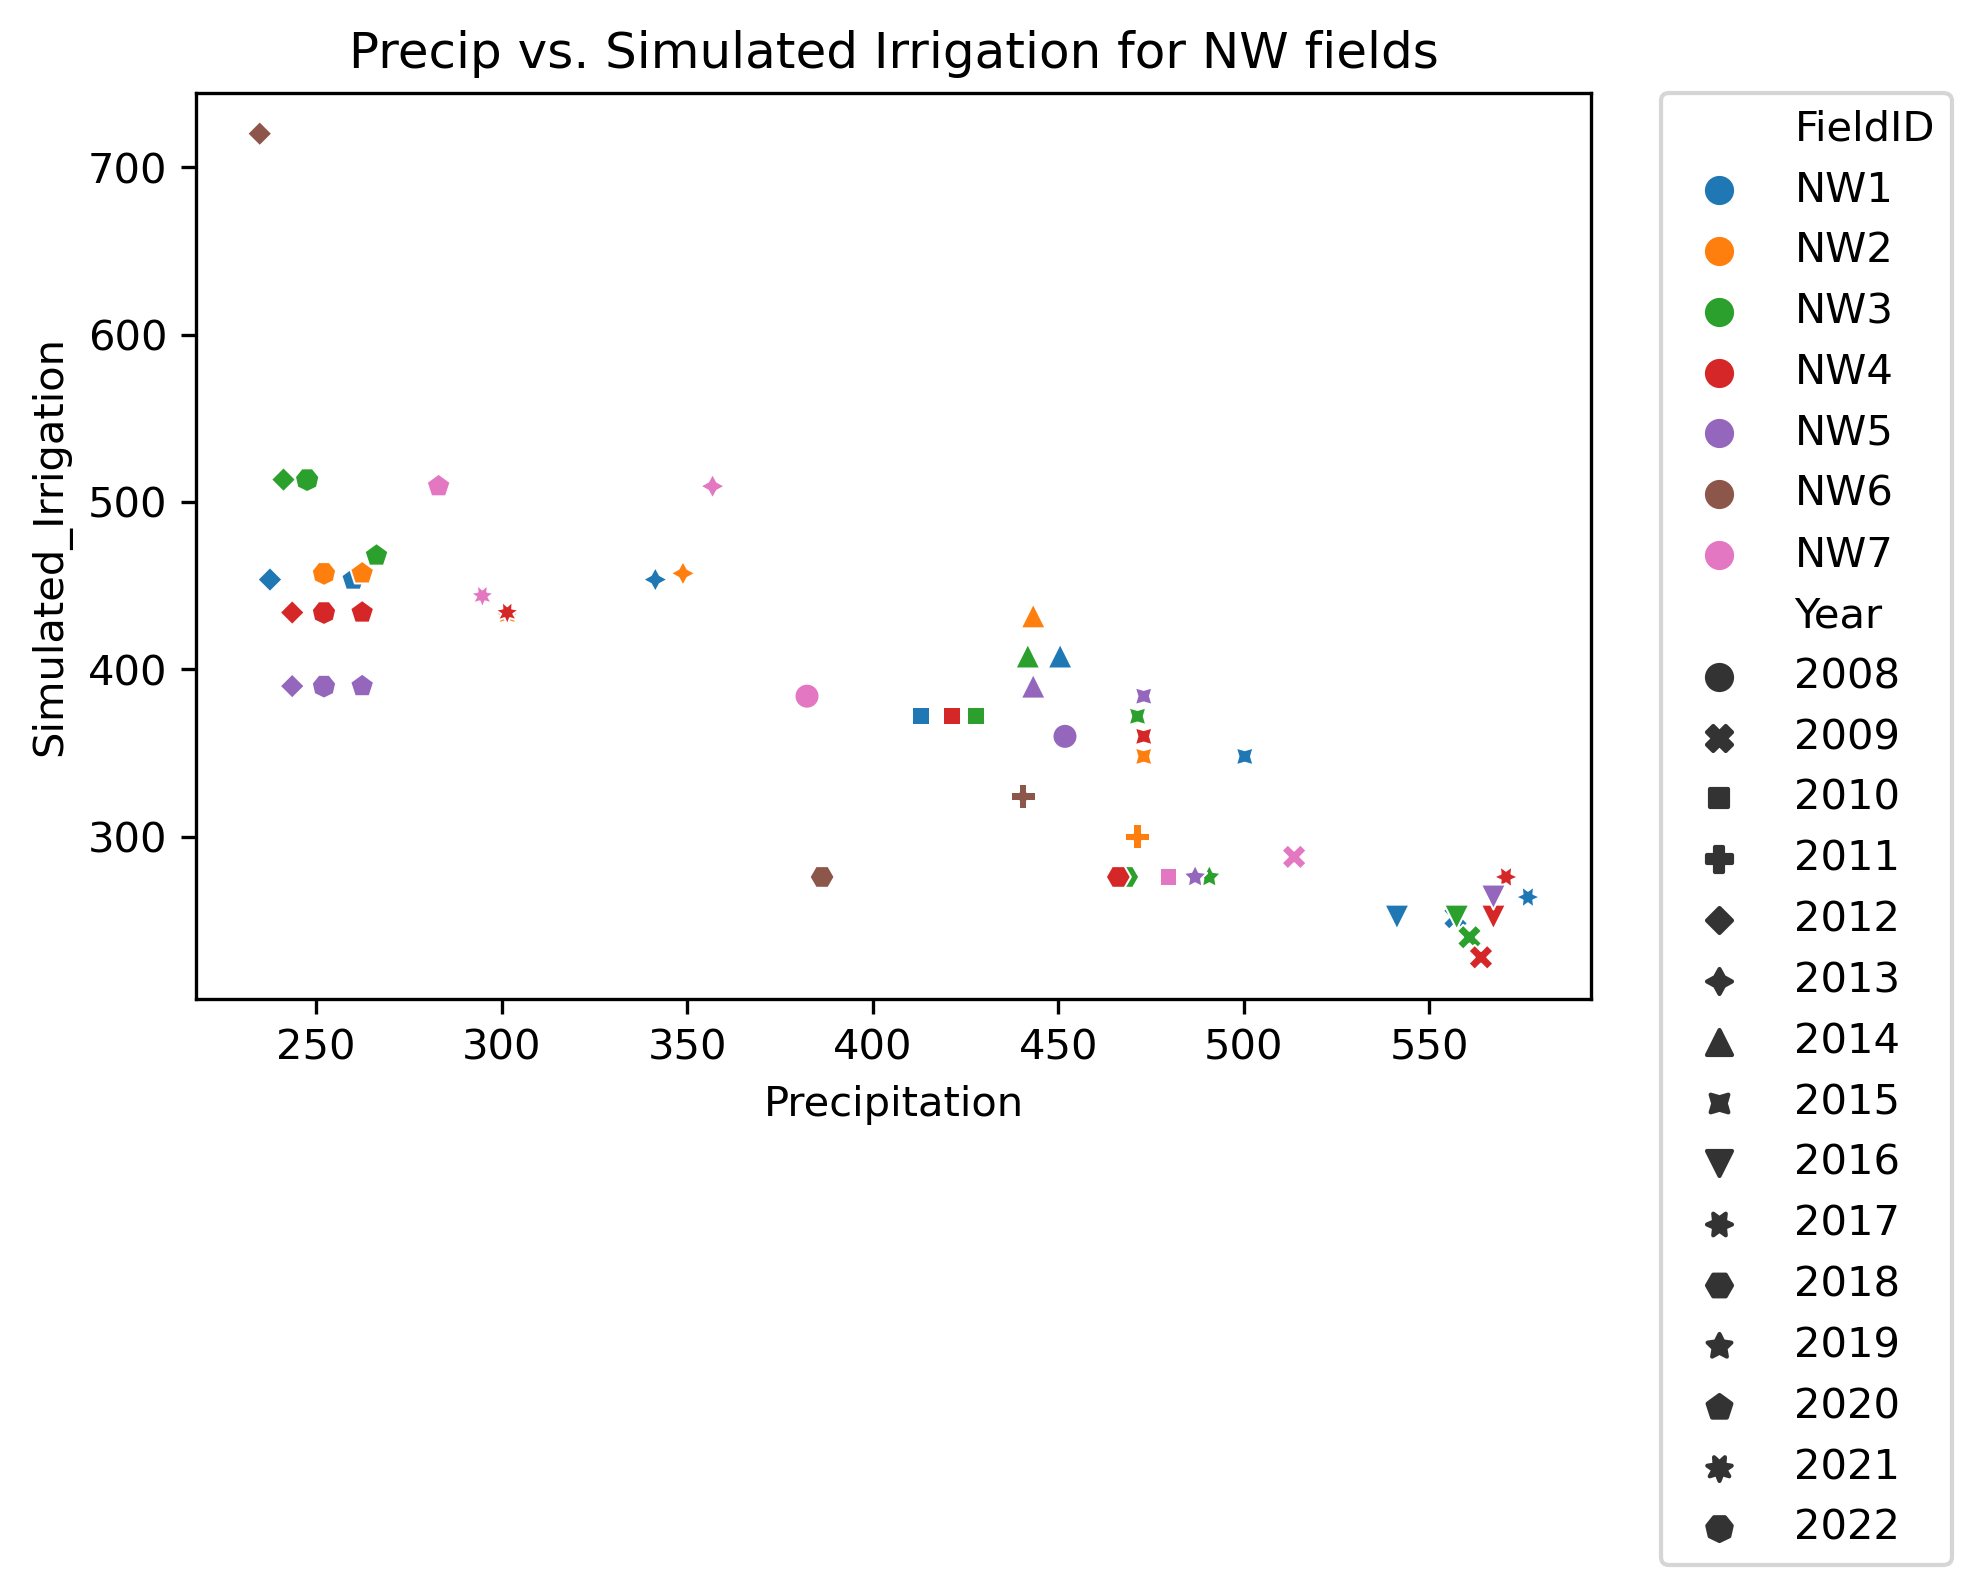

In [92]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]

sns.scatterplot(
    data=wc_sam_df,
    x="Precipitation",
    y="Simulated_Irrigation",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)
plt.title("Precip vs. Simulated Irrigation for NW fields")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Yield

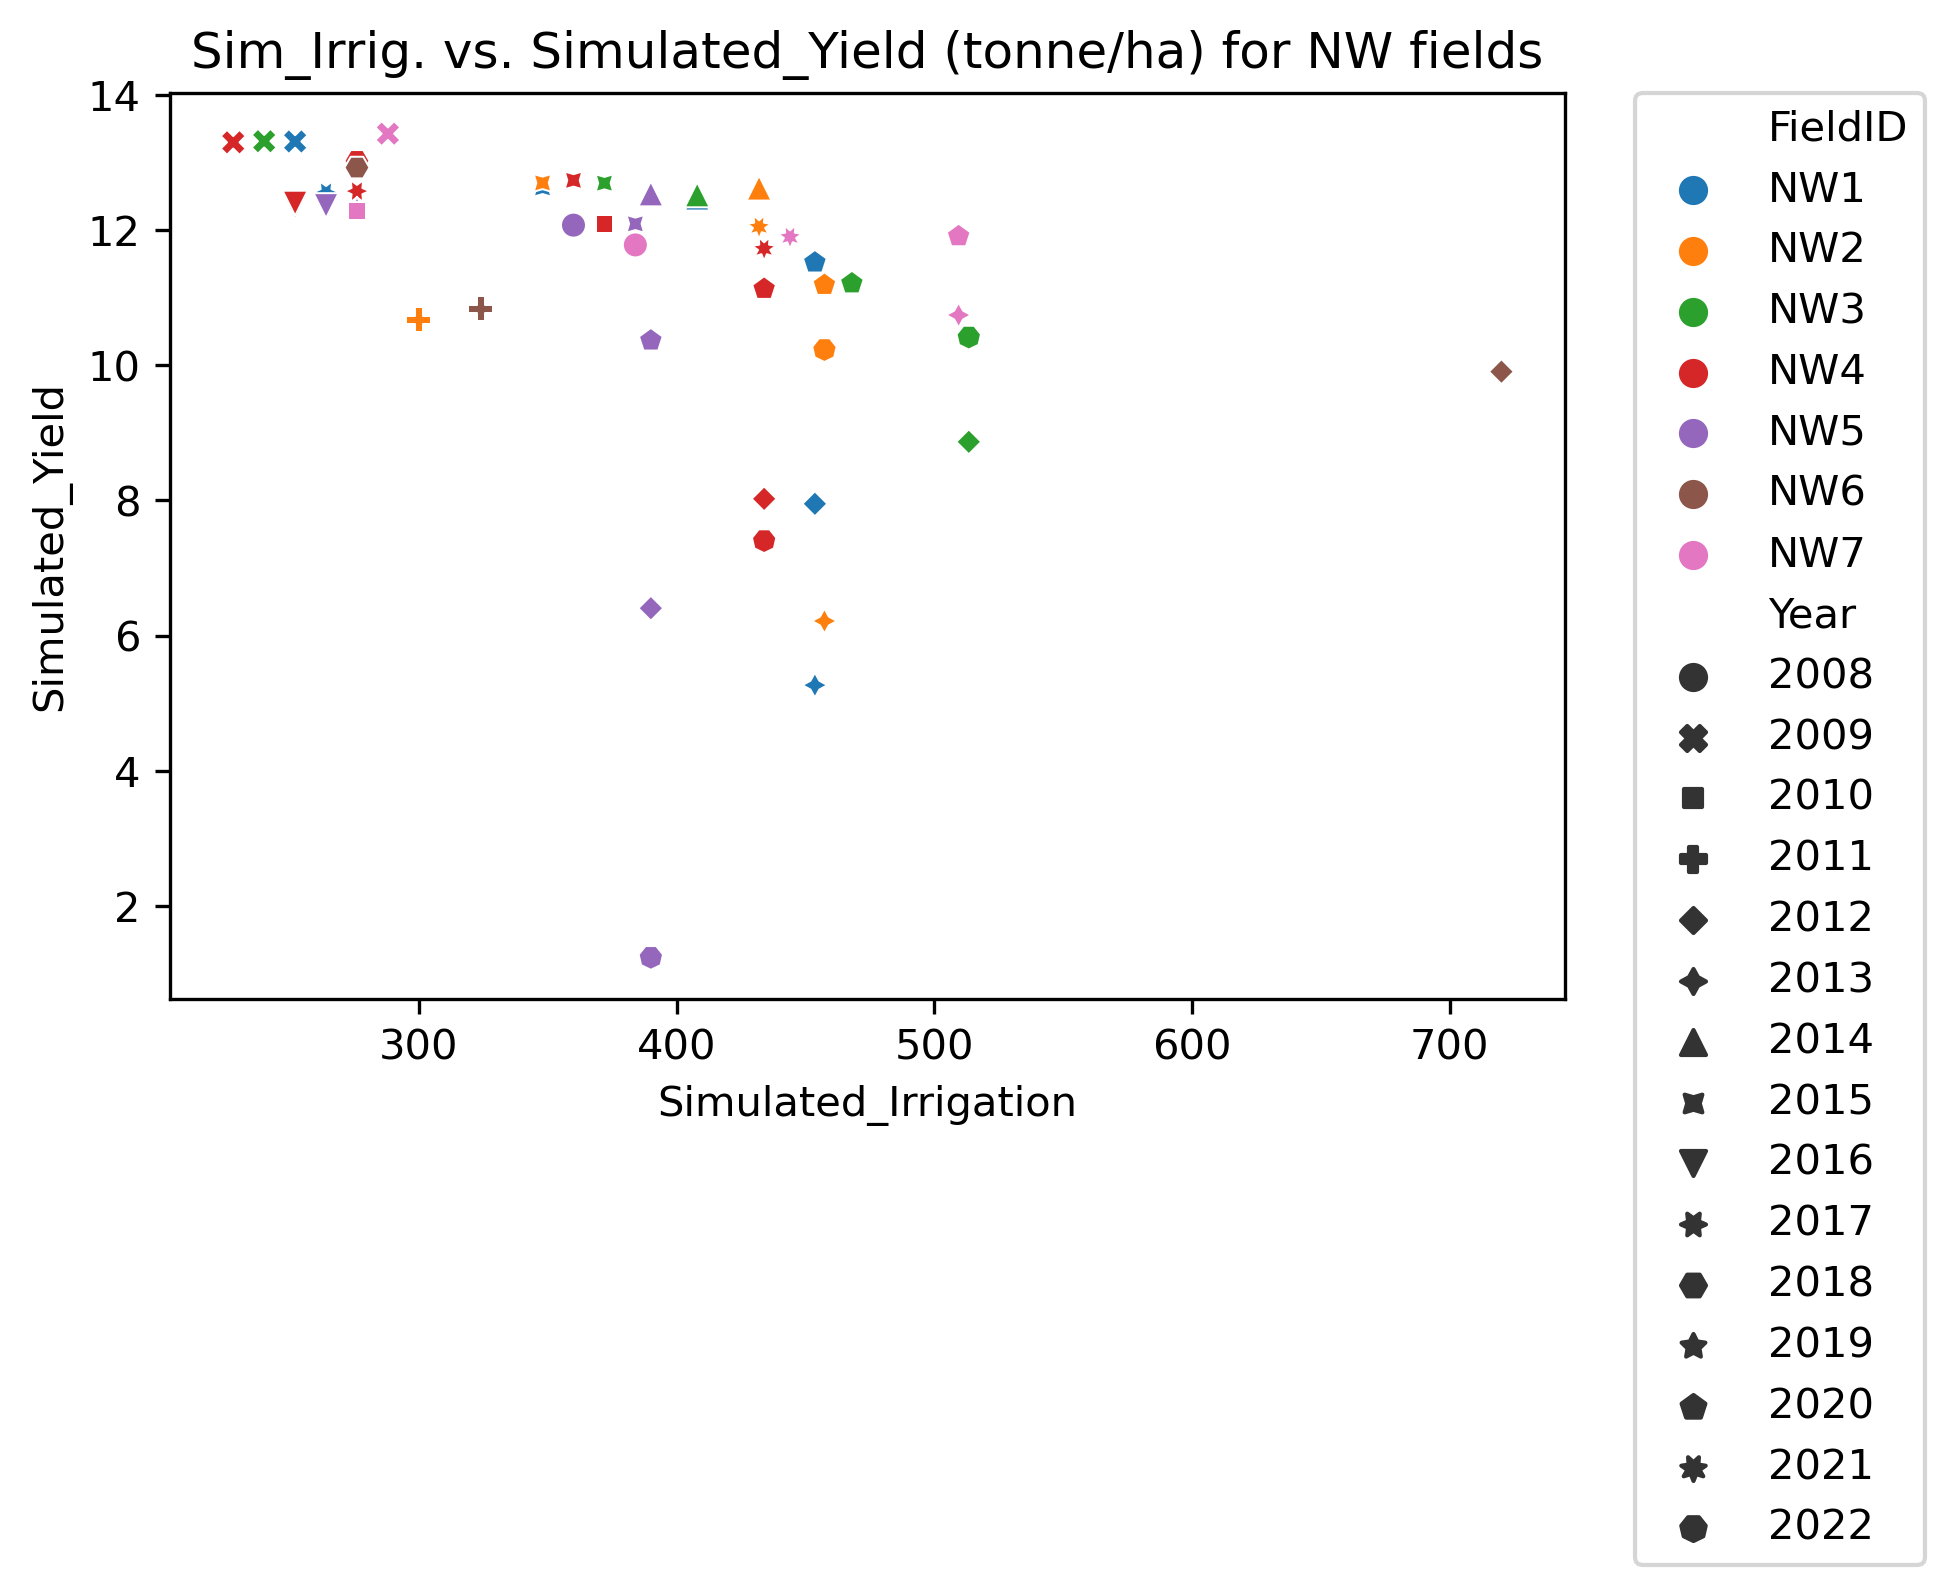

In [93]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]

sns.scatterplot(
    data=wc_sam_df,
    y="Simulated_Yield",
    x="Simulated_Irrigation",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)

plt.title("Sim_Irrig. vs. Simulated_Yield (tonne/ha) for NW fields")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

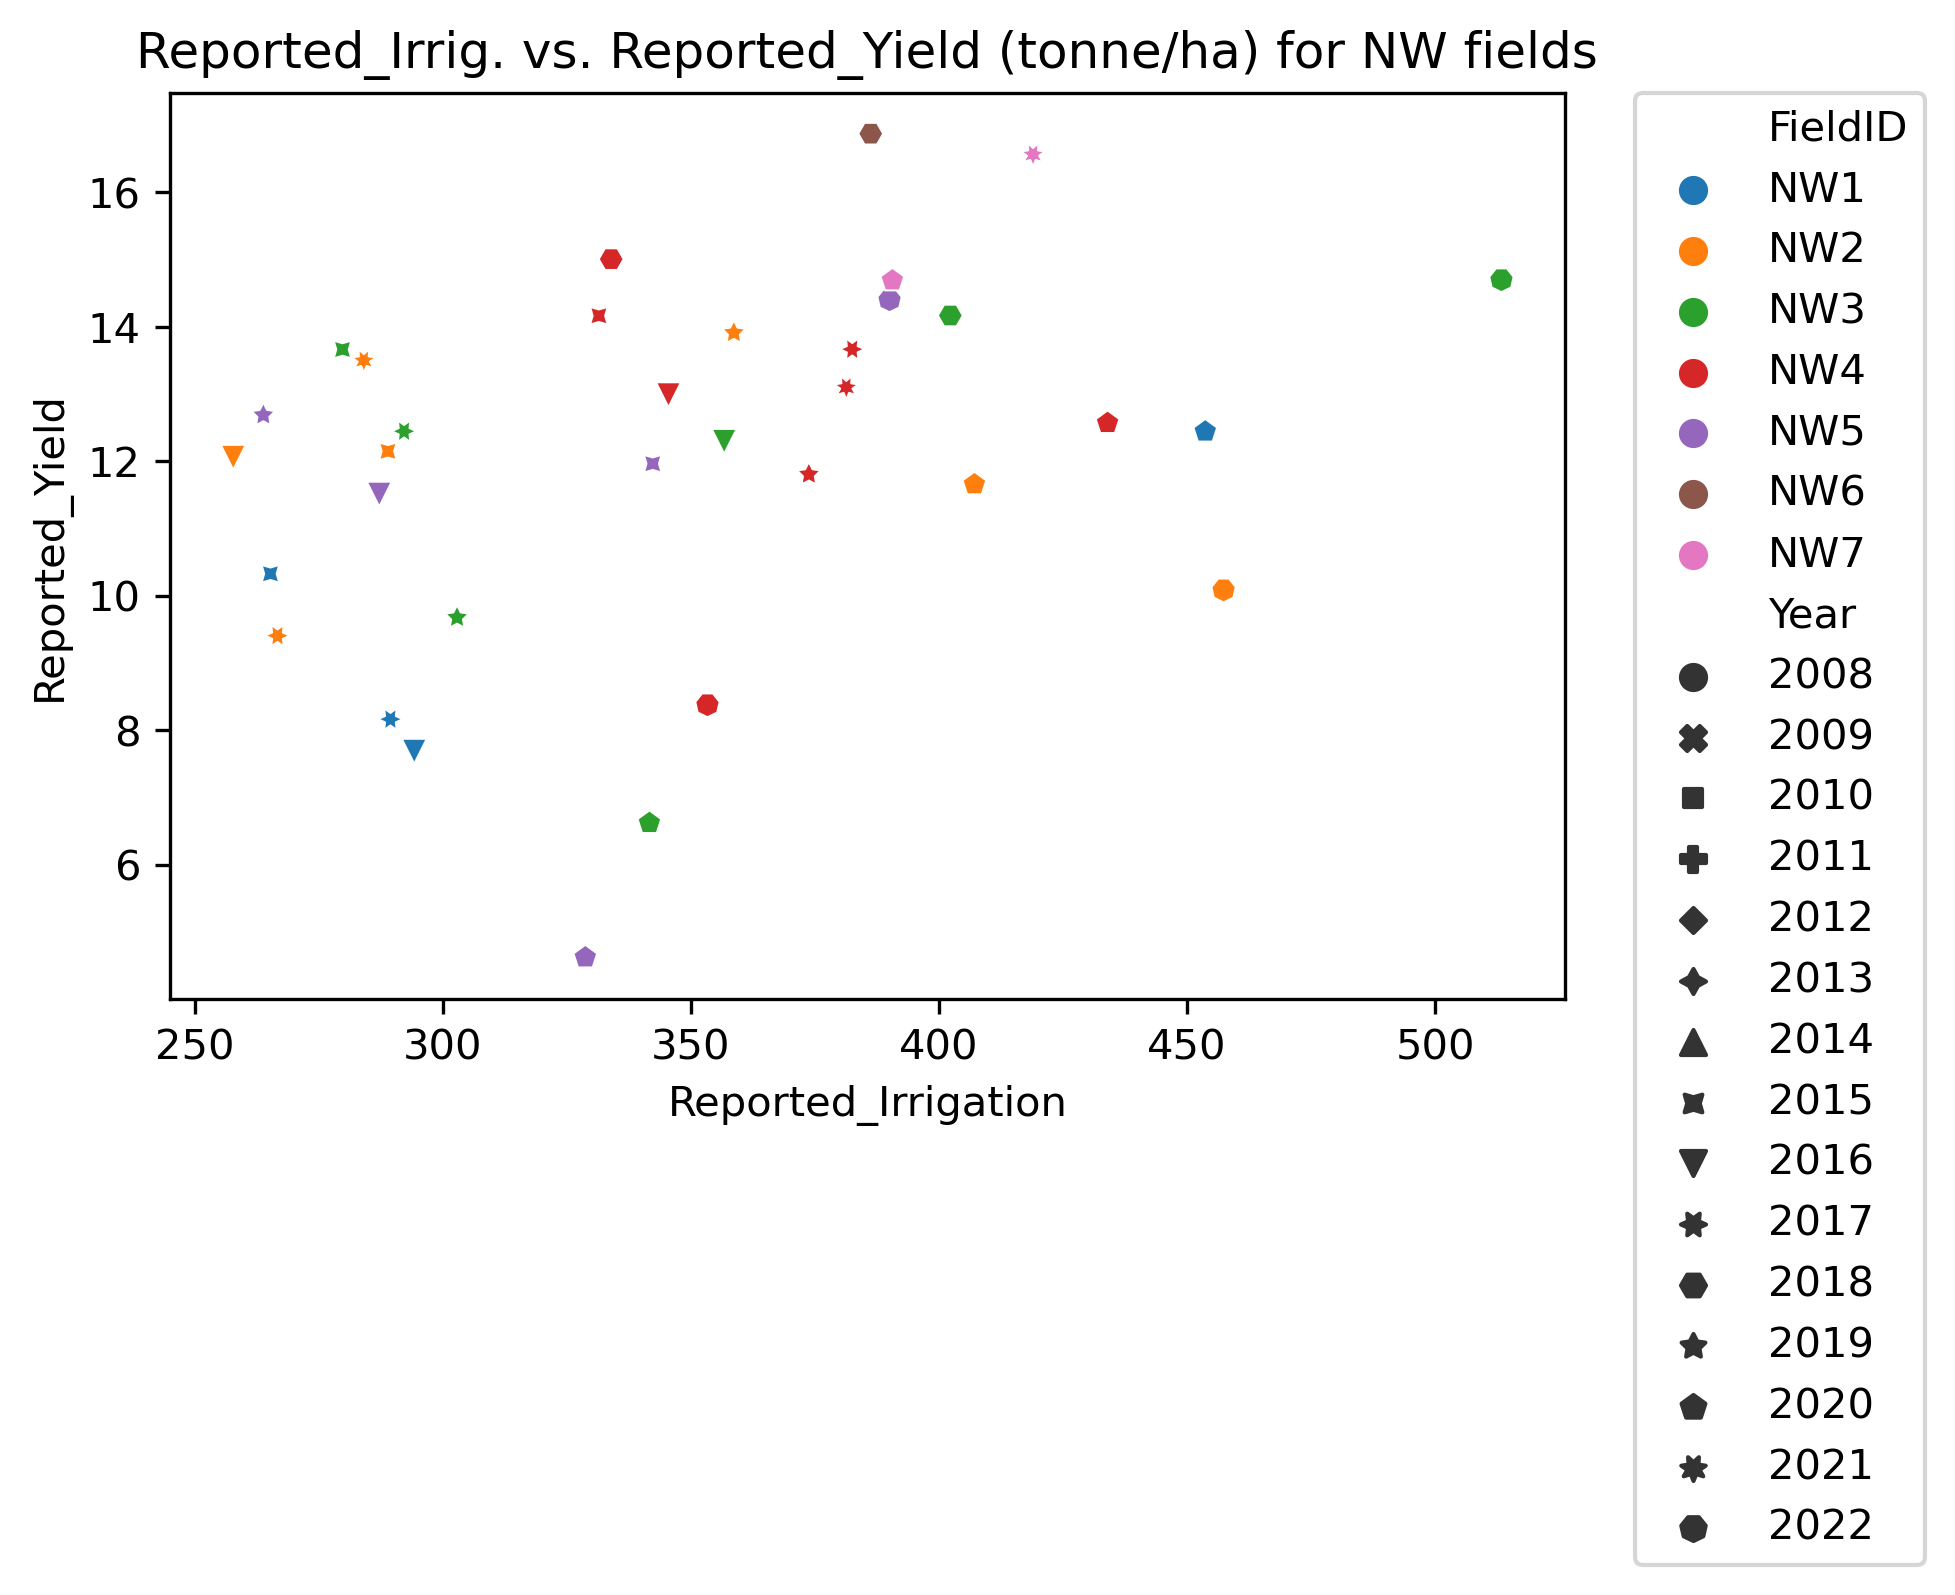

In [95]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]

sns.scatterplot(
    data=wc_sam_df,
    y="Reported_Yield",
    x="Reported_Irrigation",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)

plt.title("Reported_Irrig. vs. Reported_Yield (tonne/ha) for NW fields")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

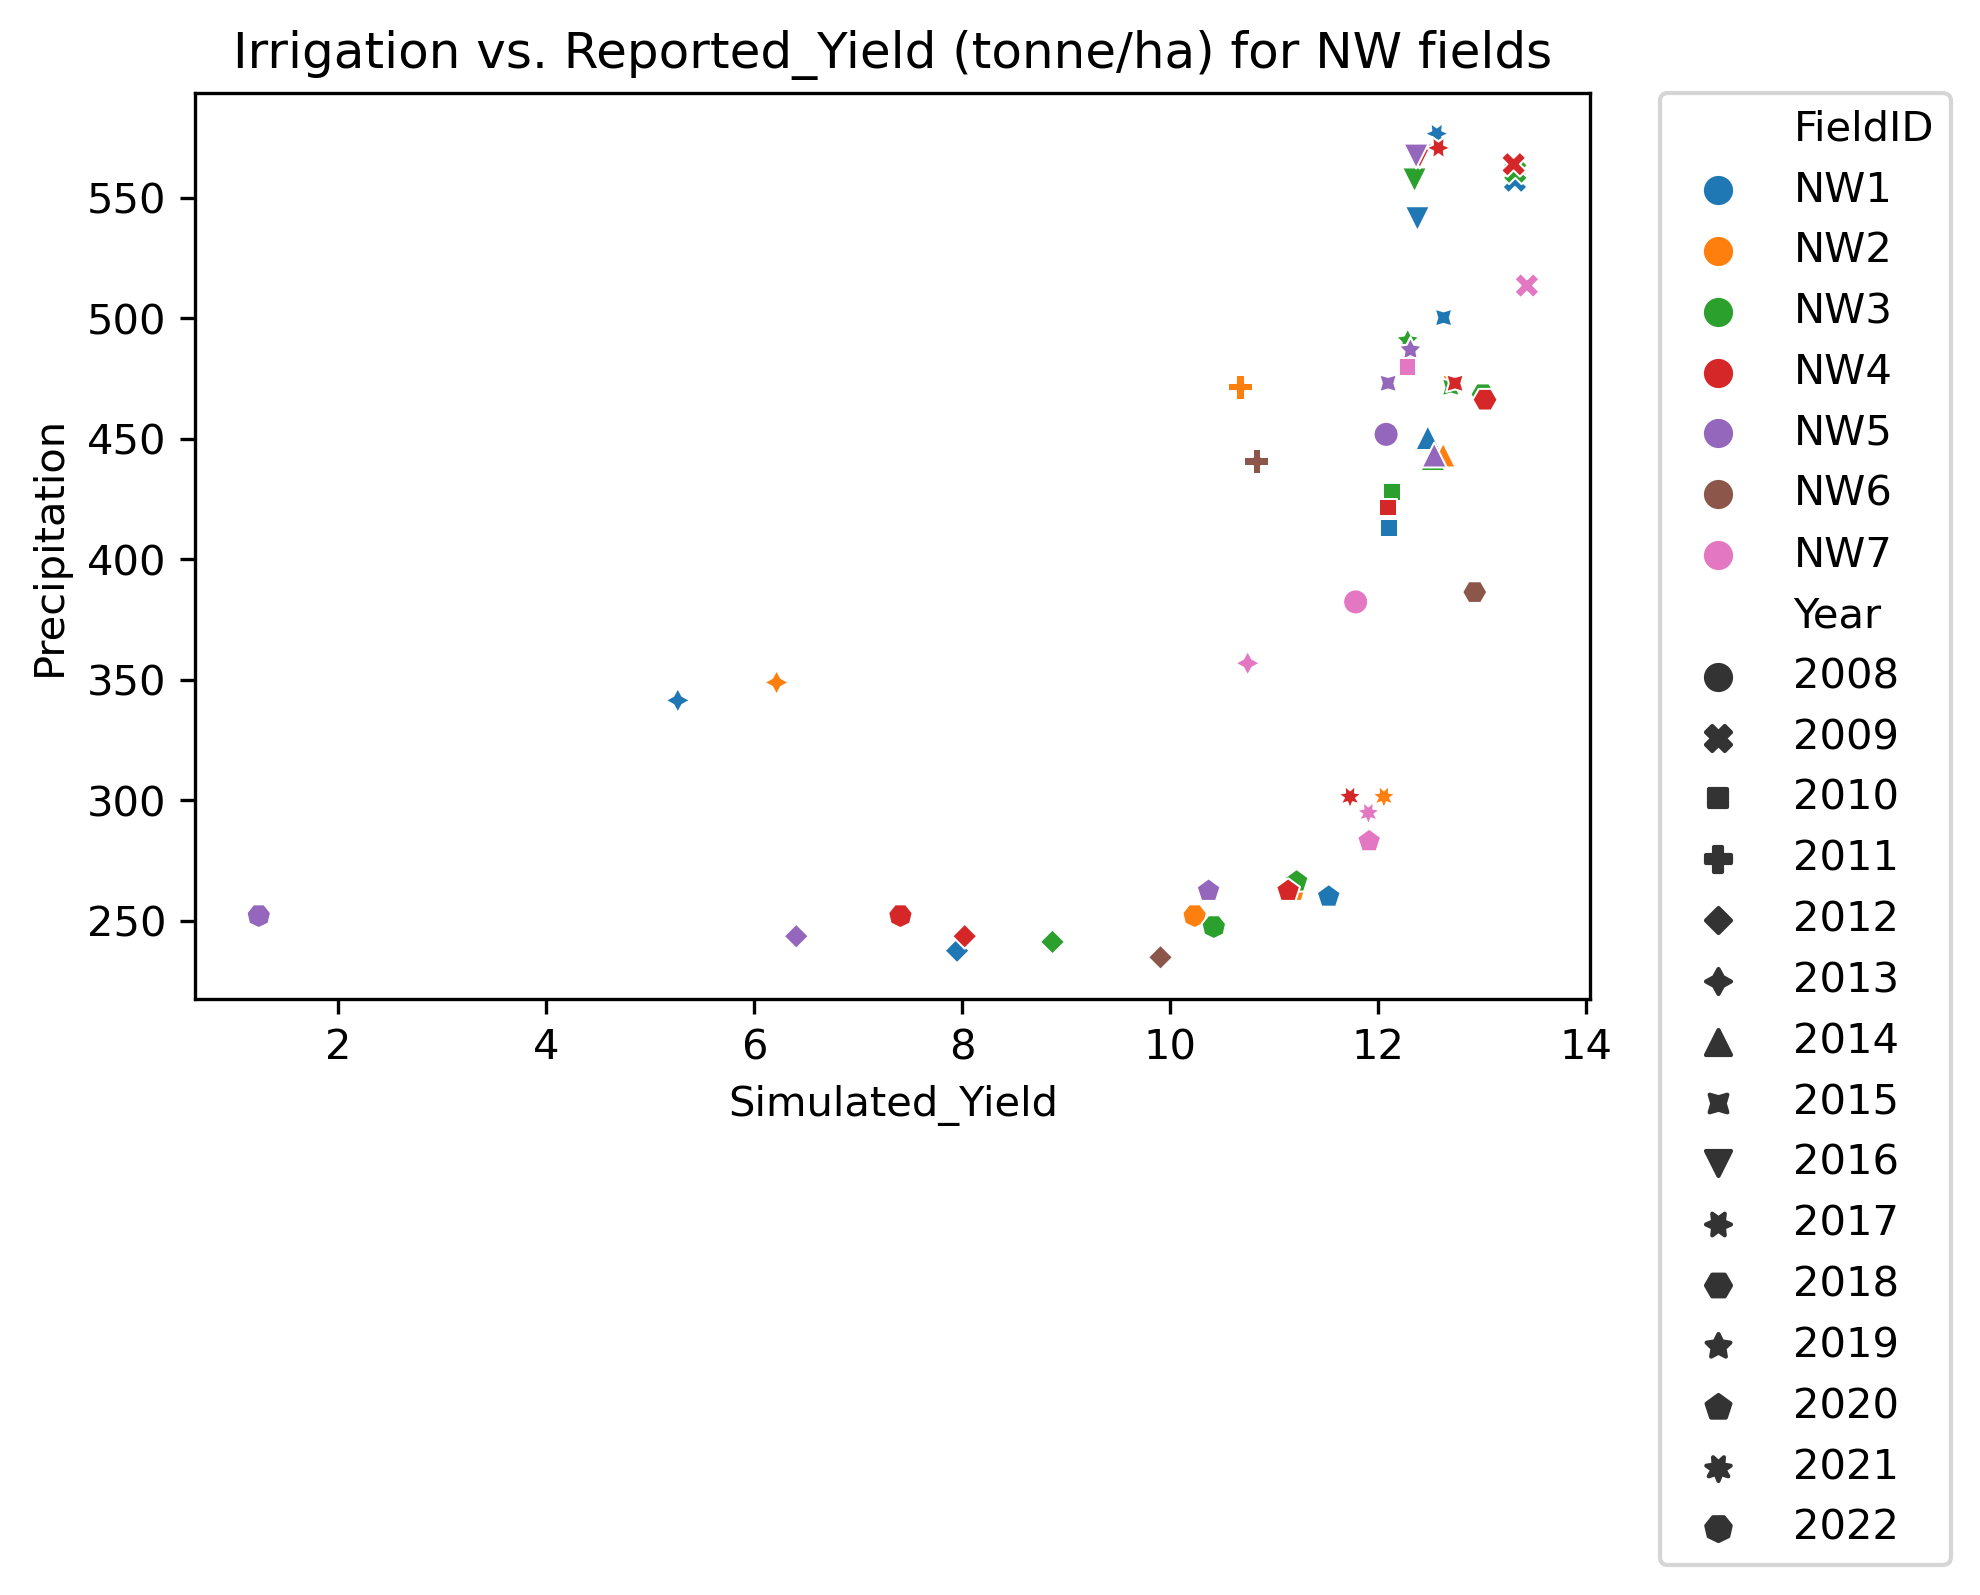

In [96]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]

sns.scatterplot(
    data=wc_sam_df,
    x="Simulated_Yield",
    y="Precipitation",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)

plt.title("Irrigation vs. Reported_Yield (tonne/ha) for NW fields")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0.5, 0, 'Reported Yield (tonne/ha)')

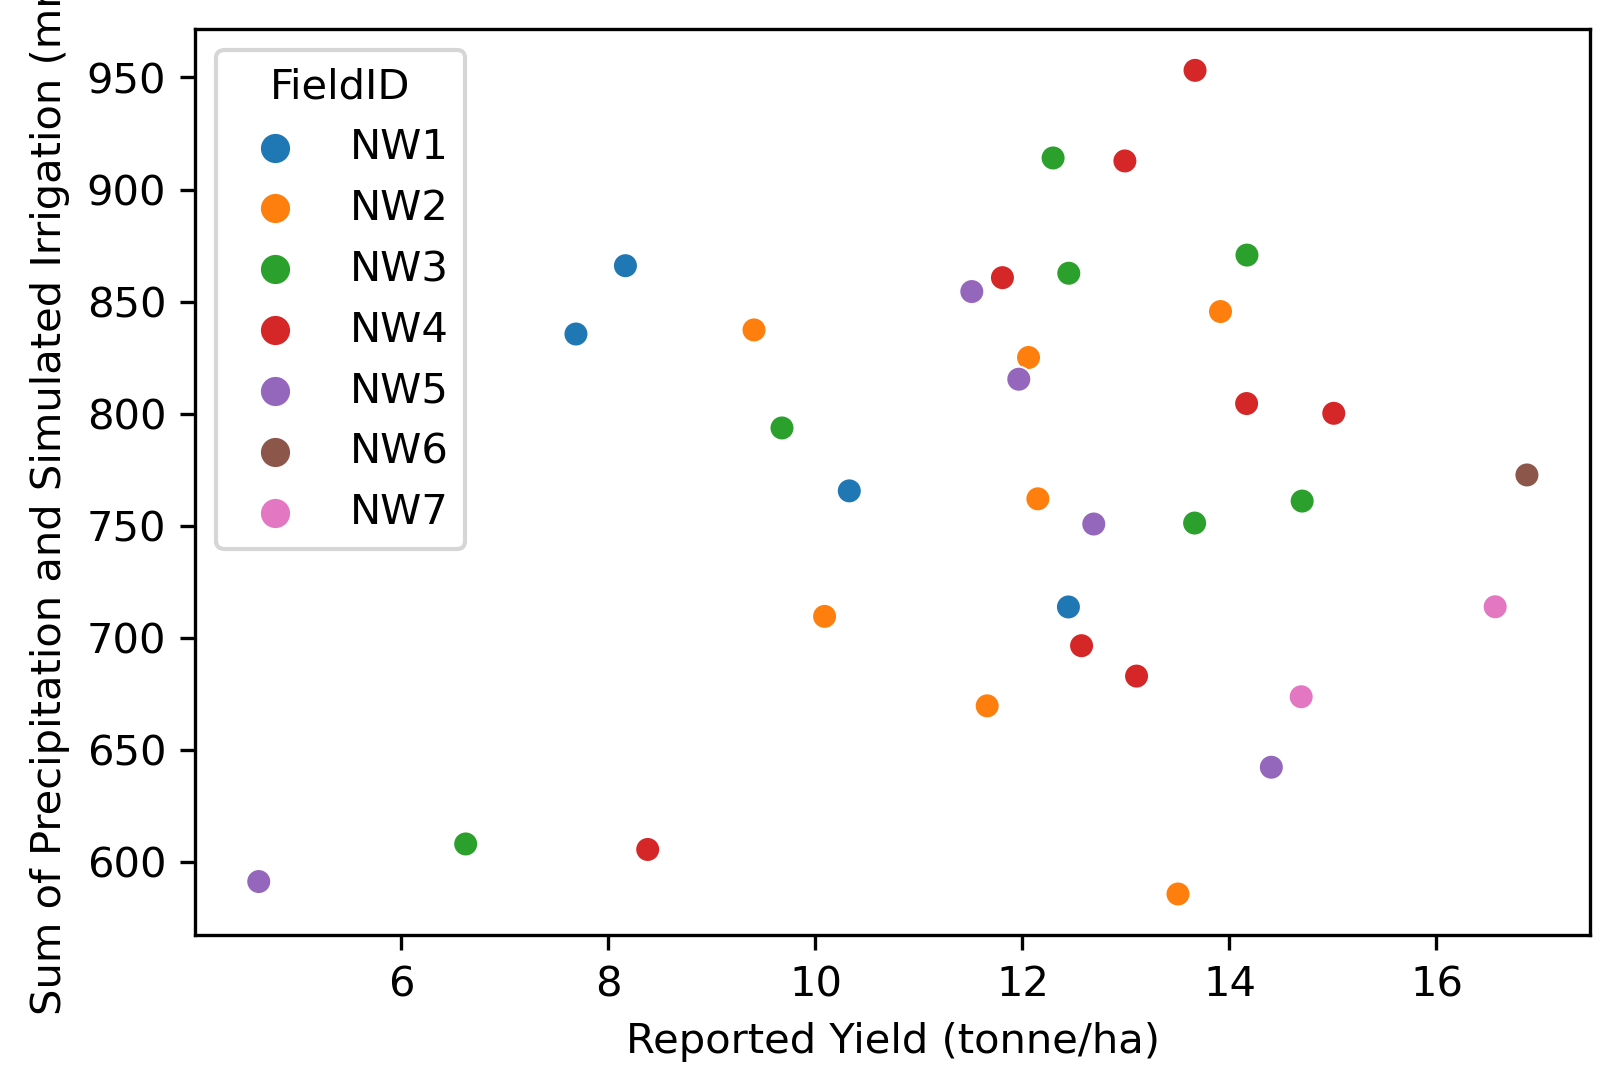

In [97]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]
sns.scatterplot(
    data=wc_sam_df,
    y=wc_sam_df["Precipitation"] + wc_sam_df["Reported_Irrigation"],
    x="Reported_Yield",
    hue="FieldID",
#     style="Year", 
    palette="tab10"
)
# plt.title("Reported_Yield vs. Sum of Precipitation and Reported Irrigation")
plt.ylabel("Sum of Precipitation and Simulated Irrigation (mm)")
plt.xlabel("Reported Yield (tonne/ha)")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0. )

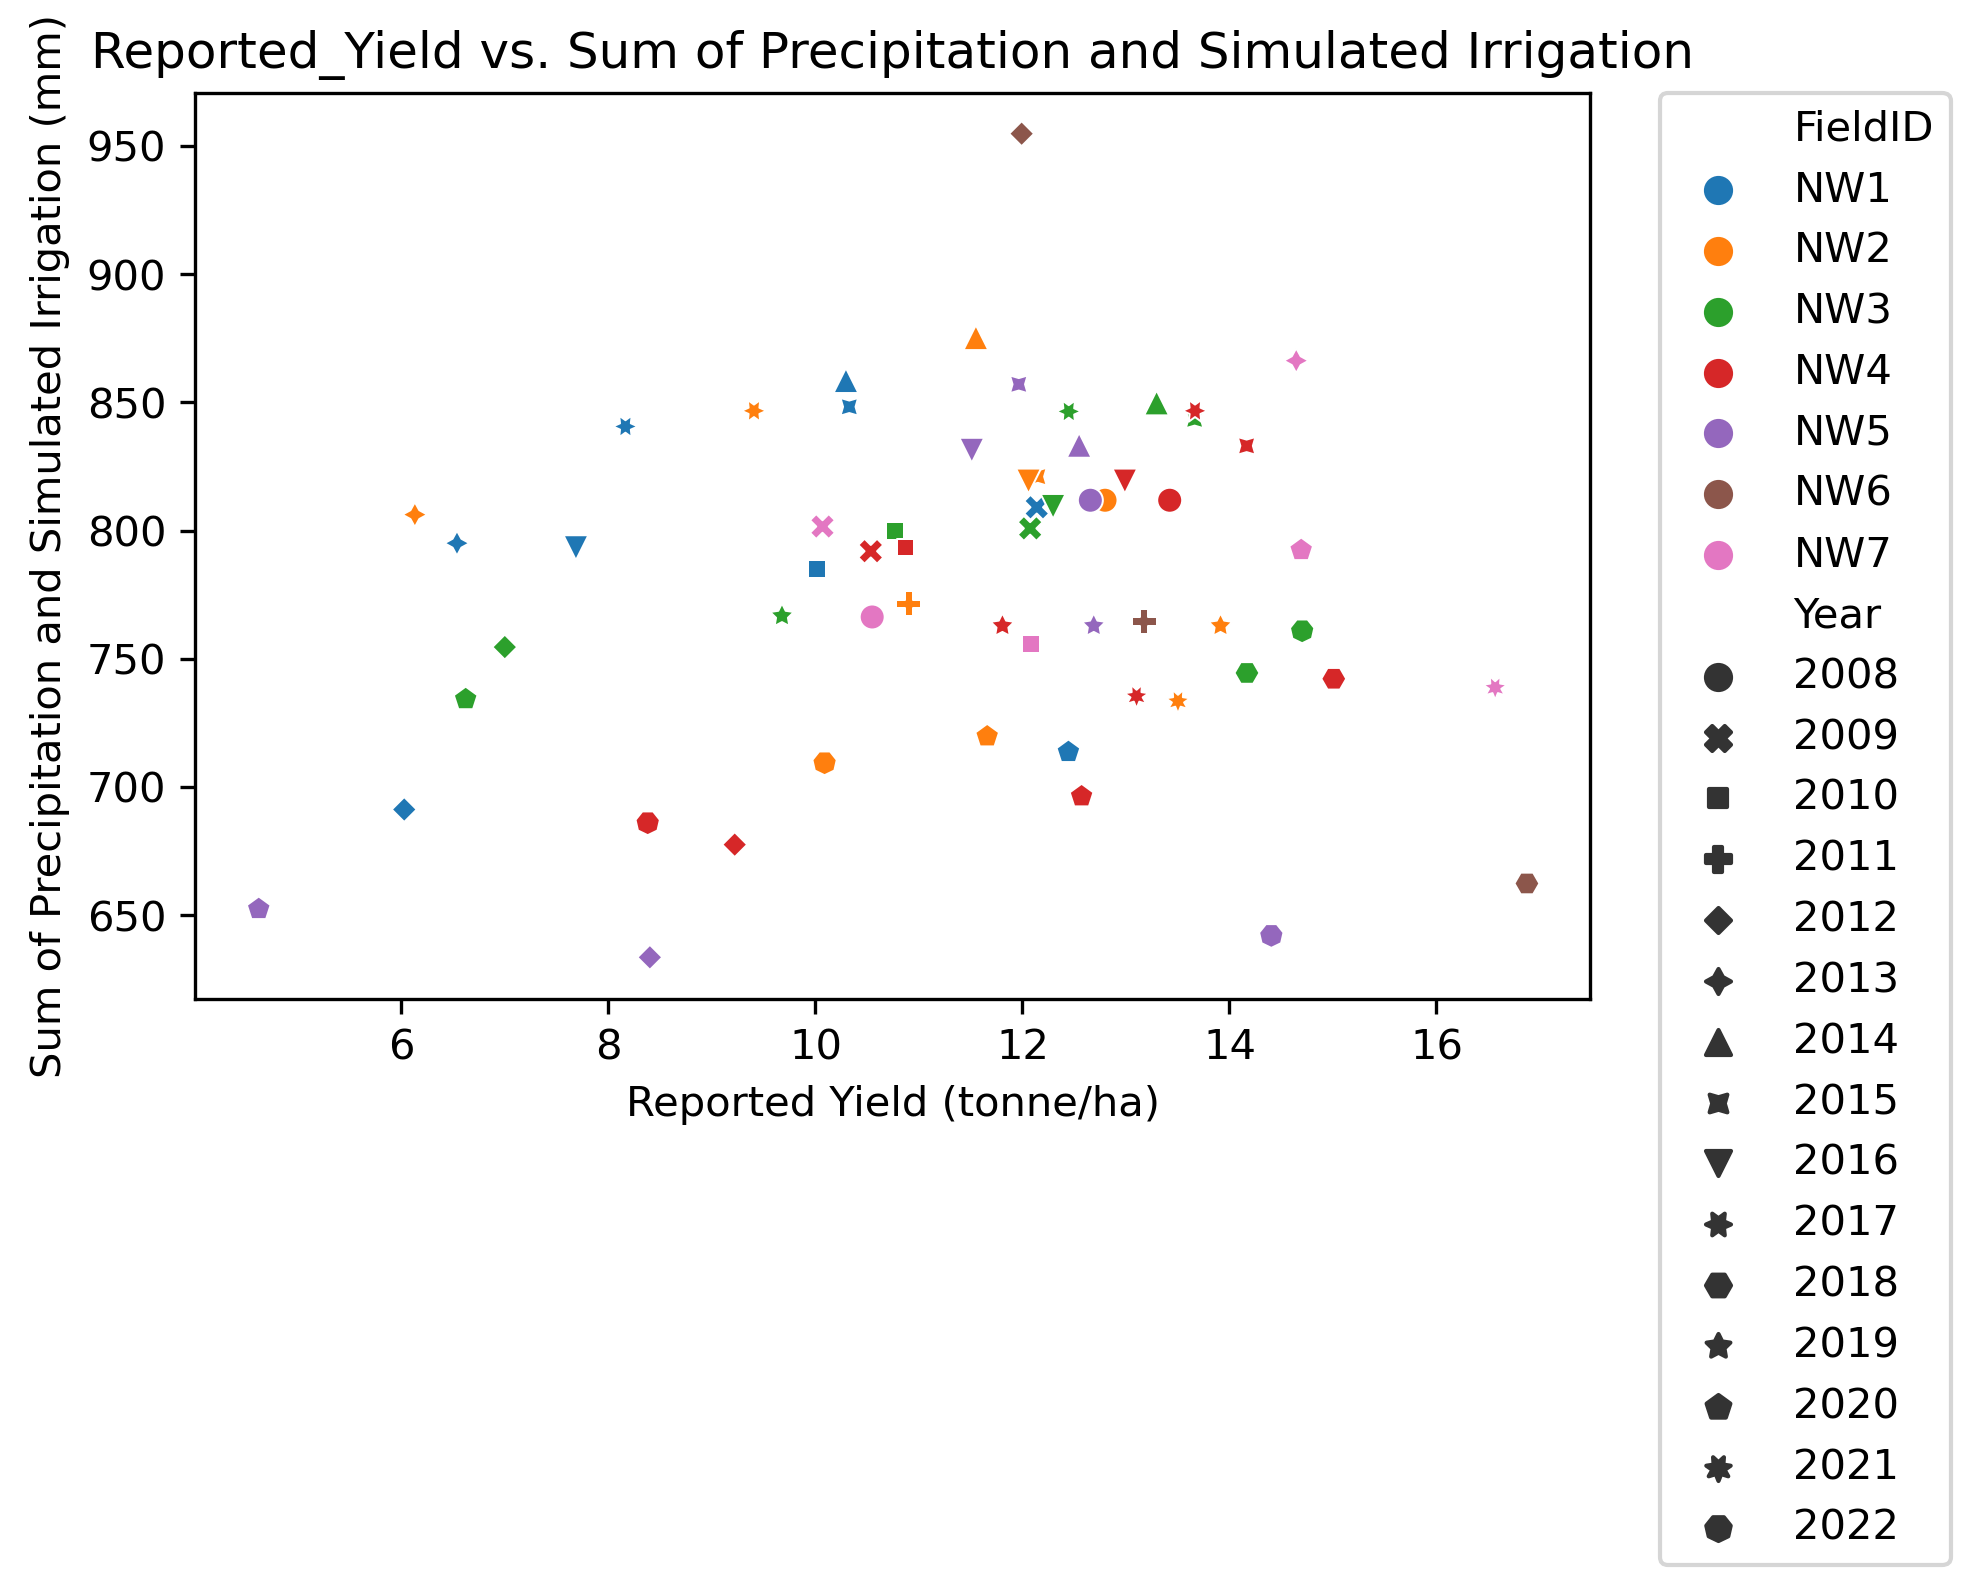

In [98]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]
sns.scatterplot(
    data=wc_sam_df,
    y=wc_sam_df["Precipitation"] + wc_sam_df["Simulated_Irrigation"],
    x="Reported_Yield",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)
plt.title("Reported_Yield vs. Sum of Precipitation and Simulated Irrigation")
plt.ylabel("Sum of Precipitation and Simulated Irrigation (mm)")
plt.xlabel("Reported Yield (tonne/ha)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Text(0.5, 0, 'Simulated Yield (tonne/ha)')

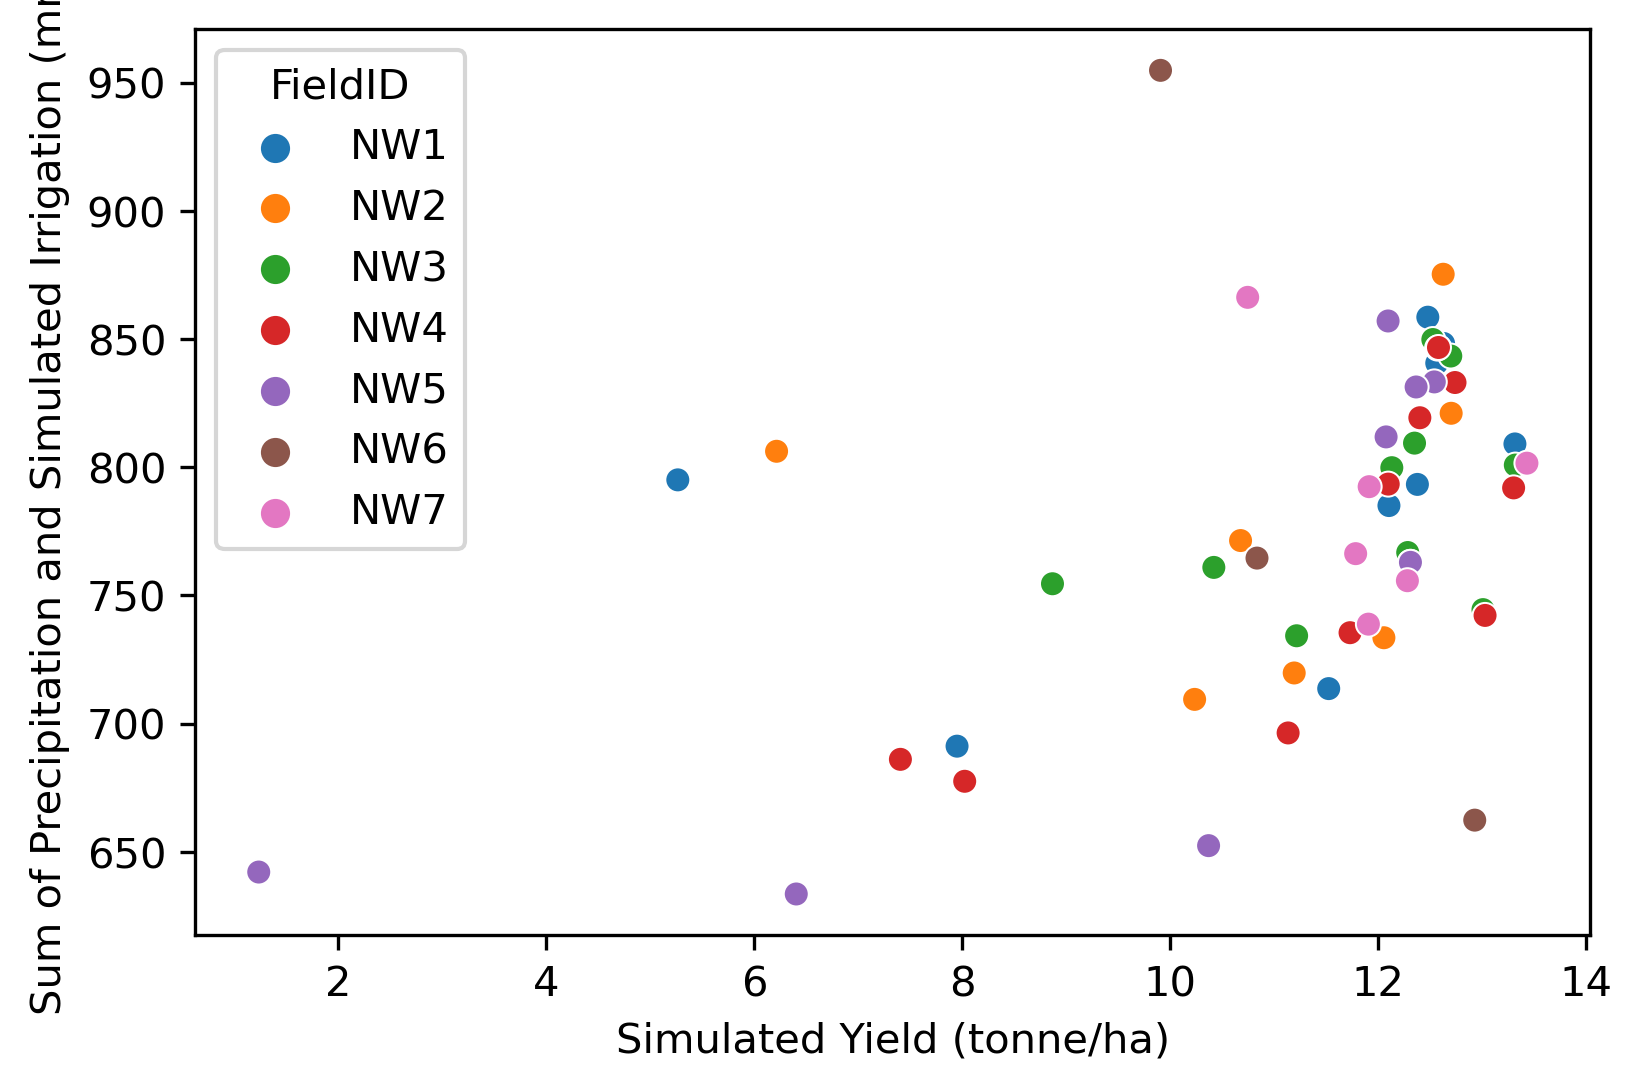

In [99]:
wc_sam_df =sim_rep_withWeather[sim_rep_withWeather["FieldID"].str.startswith("NW")]
sns.scatterplot(
    data=wc_sam_df,
    y=wc_sam_df["Precipitation"] + wc_sam_df["Simulated_Irrigation"],
    x="Simulated_Yield",
    hue="FieldID",
#     style="Year", 
    palette="tab10"
)
# plt.title("Simulated_Yield vs. Sum of Precipitation and Simulated Irrigation")
plt.ylabel("Sum of Precipitation and Simulated Irrigation (mm)")
plt.xlabel("Simulated Yield (tonne/ha)")
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Let's see how different variables relate with yield and irrig

In [100]:

def plot_regression(df, x_col, y_col):
    """
    Plots a regression plot between x_col and y_col from the given DataFrame
    and annotates it with the Pearson correlation coefficient.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    x_col (str): The column name for the x-axis.
    y_col (str): The column name for the y-axis.
    """
    # Create regression plot
    sns.regplot(x=x_col, y=y_col, data=df, ci=None)

    # Calculate Pearson correlation coefficient
    corr = df[x_col].corr(df[y_col])

    # Annotate plot with correlation coefficient
    plt.annotate(f"r: {corr:.2f}", xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12)
    # Set labels
    plt.xlabel(x_col.replace("_", " "))  # Formatting labels nicely
    plt.ylabel(y_col.replace("_", " "))

    # Show plot
    plt.show()

# Example usage:



In [101]:
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 5) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns={"fid": "FieldID"}, inplace =True)
Precip_sum =df.groupby(["Year", "FieldID"])["Precipitation"].sum().reset_index()

# Monthly sum of  ET
et_df = pd.read_csv('../Data_for_Crop_ML_model/ET_2nd.csv')  #../ go go one folder back
# et_df = pd.read_csv('/Users/m089r172/Downloads/dailyet.csv')

et_df =et_df.dropna()
et_df.date = pd.to_datetime(et_df.date)
et_df["Year"] = et_df.date.dt.year
et_df= et_df[(et_df['date'].dt.month >= 5) & (et_df['date'].dt.month <= 10)]
et_df= et_df.groupby(["FieldID", "Year"]).sum().reset_index()
df = pd.merge(et_df,Precip_sum, on= ["Year", "FieldID"], how ="inner")
df

FieldID  Year          ET  Precipitation
0       NB1  2006  618.421457     350.041519
1       NB1  2007  596.319769     315.032431
2       NB1  2008  617.303014     335.101154
3       NB1  2009  541.008559     444.648772
4       NB1  2010  685.673747     472.682357
..      ...   ...         ...            ...
726     WC9  2018  750.083083     405.800003
727     WC9  2019  622.962940     352.999996
728     WC9  2020  634.179586     295.900003
729     WC9  2021  435.640367     323.800001
730     WC9  2022  782.708488     190.300000

[731 rows x 4 columns]

In [102]:
ydf= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv")
# ydf = ydf[["Reported_Irrigation","Reported_Yield", "Year","FieldID" ]]
yld_df = ydf[["Reported_Yield", "Year","FieldID" ]]
yld_df = yld_df.dropna(subset = ["Reported_Yield"])
yld_df=pd.merge(yld_df,df, on= ["Year", "FieldID"], how ="inner")
yld_df


Reported_Yield  Year FieldID          ET  Precipitation
0        12.428670  2016     NB1  641.763794     355.440000
1        10.184502  2017     NB1  582.744093     401.850000
2        13.101181  2018     NB1  647.462339     348.140003
3        10.076228  2019     NB1  543.099406     498.940000
4         8.171677  2020     NB1  600.555037     239.950000
..             ...   ...     ...         ...            ...
87       10.427278  2010     NW5  630.656407     352.580137
88        7.873083  2011     NW5  592.586140     401.909395
89        8.400331  2012     NW5  699.421650     153.019209
90       12.098467  2013     NW5  746.898797     321.131090
91       12.547705  2014     NW5  678.835491     421.332386

[92 rows x 5 columns]

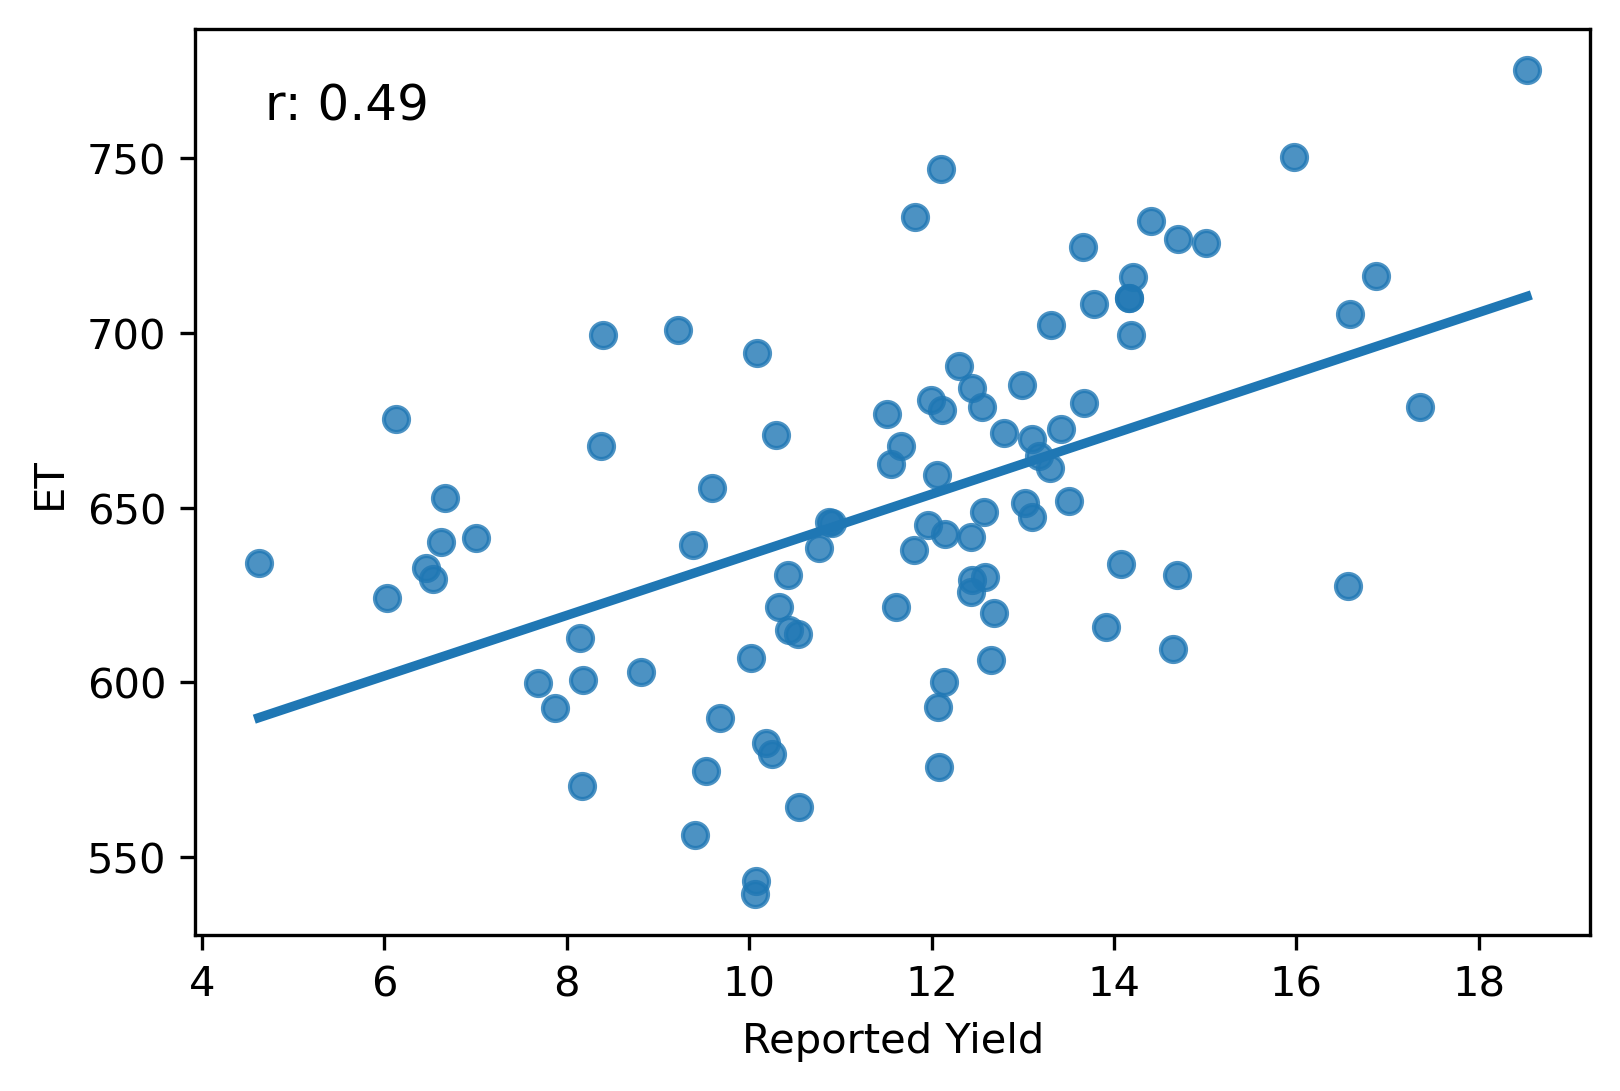

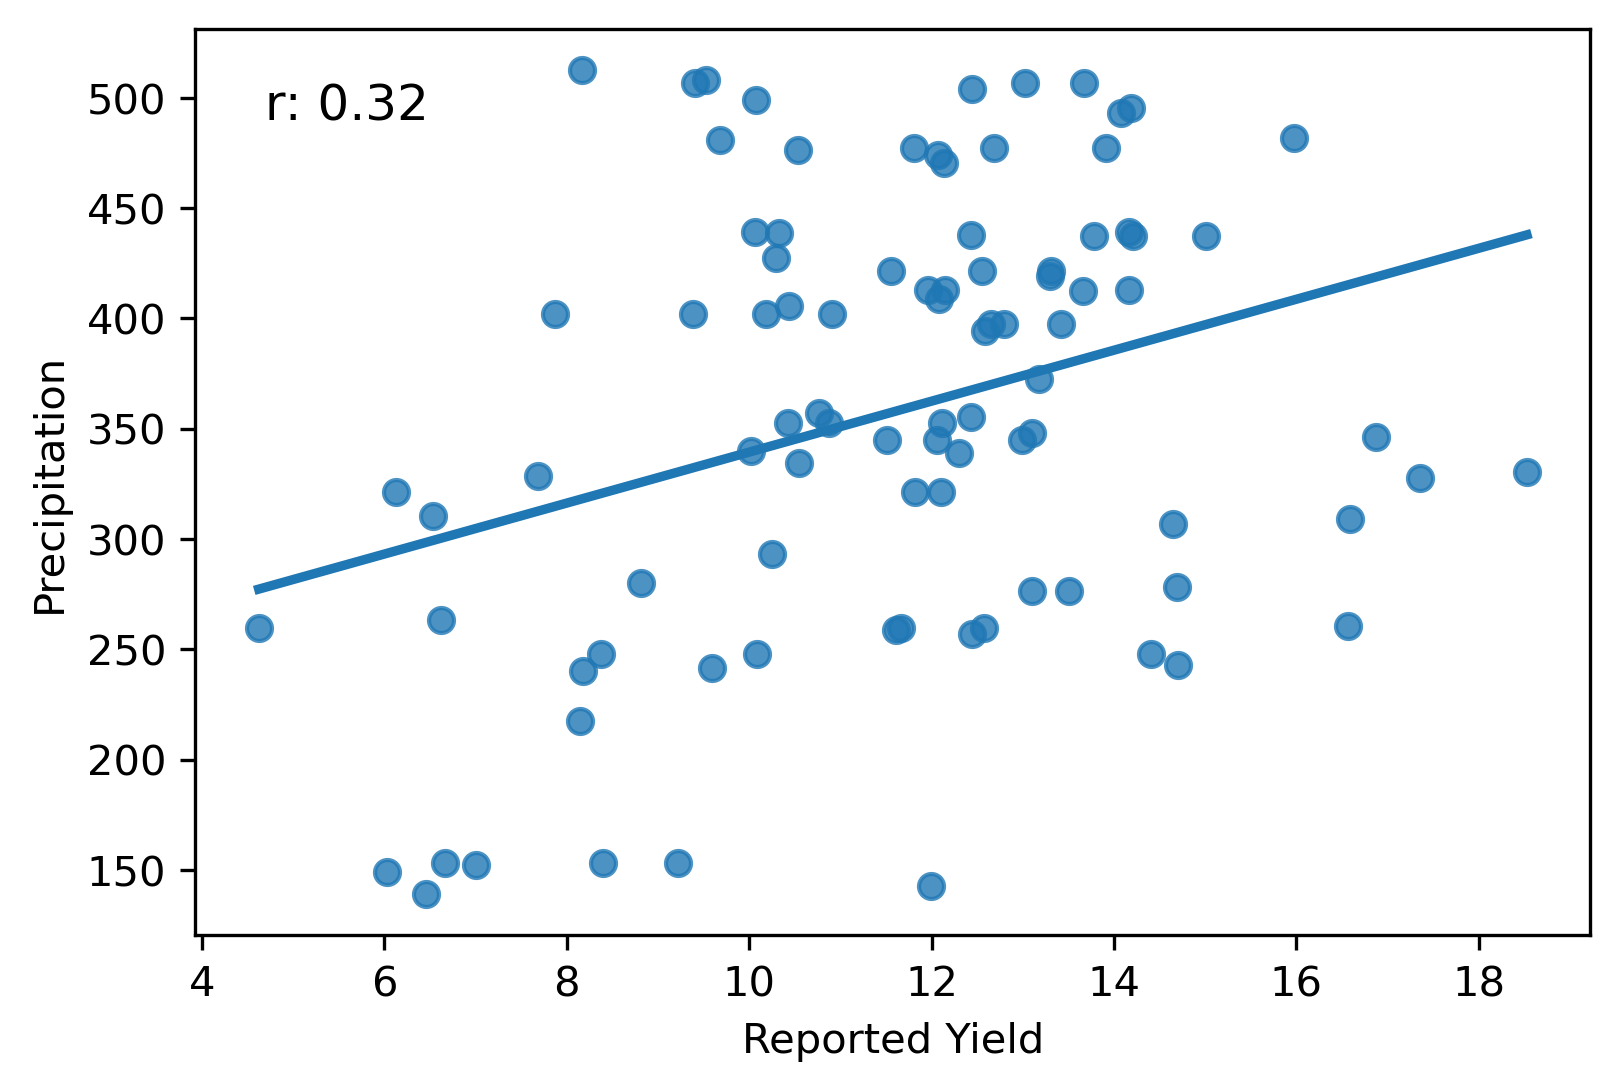

KeyError: 'NDVI'

In [103]:
plot_regression(yld_df, "Reported_Yield", "ET")
plot_regression(yld_df, "Reported_Yield", "Precipitation")
plot_regression(yld_df, "Reported_Yield", "NDVI")

## for within function train test split

In [ ]:
def for_objf (smt =[50, 65, 40, 30], CCx = 0.96, WP = 33.7, Kcb =1.05, HI0 = 0.48, 
              a_HI = 7.0, Zmax = 2.3,no_et = True, train = True ):

    # run all fields aquacrop model simulation
    df = pd.read_csv('Data/Updated_all_fieldsclimate.csv')
    df["Date"] = df.Date.str[:8]
    df["Date"] = pd.to_datetime(df["Date"])
    df['Year'] = df['Date'].dt.year
    df =df[~df['fid'].isin(['NW6', 'NW7'])]
#     df = df[~df["fid"].isin(["NW6", "NW7"]) & ~df["fid"].str.startswith("WC")]


    unique_fids = df['fid'].unique()
    # DataFrames to store results for all fids
    all_ET_df = pd.DataFrame()
    all_yld_df = pd.DataFrame()

    # Iterate over each fid and run AquaCrop model
    for fid in unique_fids:
        model, field_df, field_yld, x = run_aquacrop_model_for_fid(df, fid, 
                                                                   sim_start='2006/01/01', 
                                                                   sim_end='2023/12/30', 
                                                                   smt = smt , CCx = CCx, WP = WP, Kcb = Kcb,
                                                                   HI0 = HI0, a_HI = a_HI, Zmax = Zmax
                                                                   )

        # Append results to the aggregated DataFrames
        all_ET_df = pd.concat([all_ET_df, field_df], ignore_index=True)
        all_yld_df = pd.concat([all_yld_df, field_yld], ignore_index=True)

    all_yld_df["Year"] = all_yld_df["Harvest Date (YYYY/MM/DD)"].dt.year
    all_ET_df["Year"] = all_ET_df.Date.dt.year
    

    
    ydff =pd.read_excel("Data/All_reported_data_shuffled.xlsx")
    ydff = ydff[~((ydff['FieldID'].isin(['NW3', 'NW5'])) & (ydff['Year'] == 2022))]
    
        
    if no_et:
        simul_reported = pd.merge(all_yld_df, ydff, on=['FieldID', 'Year'], how='inner')
        print("100 prcnt_without_ET:",len(simul_reported ))
        test_df = "Not available as we are using full data"
        if train:
            simul_reported, test_df = train_test_split(simul_reported, test_size=0.20, random_state=30)
            print("train_len_no_ET:",len(simul_reported ))
            
    else:
        #     OpenET data
        GEEdf =pd.read_csv("Data/Full_year_ET2.csv")
        #         Yearly sum
        sim_et= all_ET_df.groupby(["FieldID" ,"Year"])["ET_aqua"].sum().reset_index()
        all_ET_df =pd.merge(GEEdf,  sim_et, on=['FieldID', 'Year'], how='inner')
        simul_reported =  pd.merge(ydff,all_yld_df, on=['FieldID', 'Year'], how='inner') 
        simul_reported  = pd.merge ( all_ET_df ,  simul_reported, on=['FieldID', 'Year'], how='inner')
        print("100 prcnt_with_ET:",len(simul_reported ))
        test_df = "Not available as we are using full data"
        if train:
            simul_reported, test_df = train_test_split(simul_reported, test_size=0.20, random_state=30)
            print("train_len_with_ET:",len(simul_reported ))


    
    return test_df, all_yld_df, simul_reported


def obj_func (param, no_et =True, train = True):
    
    """
    you can remove any parameter from "for_objf" function
    to avaoid calibration of that parameter. for that lb and up adjustment is necessary.
    """

    smt = [param[0], param[1], param[2], param[3]]
    CCx = param[4]
    WP = param[5] 
    Kcb = param[6]
    HI0 = param[7]
    a_HI = param[8]
    Zmax = param[7]

# , a_HI = a_HI, Zmax = Zmax
    print("smt:", smt)
    print("CCx:", CCx)
    print("WP:",  WP)
    print("Kcb:", Kcb)
    print("HI0:", HI0)
    print("a_HI:", a_HI)
    print("Zmax:",Zmax)
    
    all_ET_df, all_yld_df, df = for_objf(smt =smt, CCx =CCx, WP = WP, Kcb = Kcb,
                                                     HI0 = HI0, a_HI = a_HI, Zmax = Zmax,
                                                     no_et = no_et,train =train)
    
    df.rename(columns={"Seasonal irrigation (mm)": "Simulated_Irrigation",
                                        "Yield (tonne/ha)": "Simulated_Yield"},inplace =True)
    # Step 1: Calculate residuals
    df["Irrigation_Residual"] = (df["Reported_Irrigation"] - df["Simulated_Irrigation"]).abs()
    df["Yield_Residual"] = (df["Reported_Yield"] - df["Simulated_Yield"]).abs()



    # Step 2: Normalize residuals using Min-Max scaling
    def min_max_scaling(series):
        return (series - series.min()) / (series.max() - series.min())

    df["Normalized_Irrigation_Residual"] = min_max_scaling(df["Irrigation_Residual"])
    df["Normalized_Yield_Residual"] = min_max_scaling(df["Yield_Residual"])


    # Step 3: Compute mean of normalized residuals
    mean_normalized_irrigation_residual = df["Normalized_Irrigation_Residual"].mean()
    mean_normalized_yield_residual = df["Normalized_Yield_Residual"].mean()

    if no_et:
        weight_yield = 6
        weight_irrigation =4


        # Objective function
        fitness = (
            weight_irrigation * mean_normalized_irrigation_residual +
            weight_yield * mean_normalized_yield_residual
        )

        # Output results
#         print("Mean Normalized Irrigation Residual:", mean_normalized_irrigation_residual)
#         print("Mean Normalized Yield Residual:", mean_normalized_yield_residual)
        print("Irrigation contribution:",weight_irrigation * mean_normalized_irrigation_residual)
        print("Yield contribution:",  weight_yield *mean_normalized_yield_residual)
#         print("Objective Function Value:", fitness)

    else:
        df["ET_Residual"] =  (df['Ensemble_ET'] - df['ET_aqua']).abs()
        df["Normalized_ET_Residual"] = min_max_scaling(df["ET_Residual"])
        mean_normalized_ET_residual = df["Normalized_ET_Residual"].mean()
        
        weight_yield = 5
        weight_irrigation =3
        weight_et  = 2

        # Objective function
        fitness = (
            weight_irrigation * mean_normalized_irrigation_residual +
            weight_yield * mean_normalized_yield_residual +
            weight_et * mean_normalized_ET_residual
        )

        # Output results
#         print("Mean Normalized Irrigation Residual:", mean_normalized_irrigation_residual)
#         print("Mean Normalized Yield Residual:", mean_normalized_yield_residual)
#         print("ET_resid:", mean_normalized_ET_residual)
        print("Irrigation contribution:",weight_irrigation * mean_normalized_irrigation_residual)
        print("Yield contribution:",  weight_yield *mean_normalized_yield_residual)
        print("ET contribution:",  weight_et * mean_normalized_ET_residual)
#         print("Objective Function Value:", fitness)

    print("loss:", fitness)
    print("------------------------")
    
    return fitness


yld_df = simul_reported[["Year","FieldID","Yield (tonne/ha)","Reported_Yield"]].dropna(subset=["Reported_Yield"])
yld_train, yld_test =  train_test_split(yld_df, test_size=0.20, random_state=30)

irrig_df =simul_reported[["Year","Seasonal irrigation (mm)","Reported_Irrigation"]].dropna(subset=["Reported_Irrigation"])
irrig_train, irrig_test =  train_test_split( irrig_df, test_size=0.20, random_state=30)


## WC_fields

In [104]:
df = pd.read_csv('/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/excel files/Updated_all_fieldsclimate.csv')
df["Date"] =df.Date.str[:8]
df["Date"]= pd.to_datetime(df["Date"])
df=df[df["Date"] < '2022-12-31']
df = df[(df['Date'].dt.month >= 4) & (df['Date'].dt.month <= 9)]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.rename(columns={"fid": "FieldID"}, inplace =True)
df

Date FieldID    MinTemp    MaxTemp  ReferenceET  Precipitation  \
3870   2006-04-01     WC1   3.328241  26.153650     6.052249            0.0   
3871   2006-04-01     WC2   3.328241  26.153650     6.052249            0.0   
3872   2006-04-01     WC3   3.314142  26.179620     6.057568            0.0   
3873   2006-04-01     WC6   3.319269  26.170177     6.055634            0.0   
3874   2006-04-01     WC4   3.318842  26.170964     6.055795            0.0   
...           ...     ...        ...        ...          ...            ...   
263026 2022-09-30     SW2  11.649988  32.749994     8.600000            0.0   
263027 2022-09-30    WC10  11.350000  33.050012     8.700000            0.0   
263028 2022-09-30    WC14  11.350000  33.050012     8.700000            0.0   
263029 2022-09-30     WC7  11.050012  33.350000     8.700000            0.0   
263030 2022-09-30    WC27  11.350000  33.149988     8.800000            0.0   

        Year  Month  
3870    2006      4  
3871    2006      4  
3872    2006      4  
3873    2006      4  
3874    2006      4  
...      ...    ...  
263026  2022      9  
263027  2022      9  
263028  2022      9  
263029  2022      9  
263030  2022      9  

[133773 rows x 8 columns]

In [105]:
df = df.groupby(['FieldID','Year']).agg({
                                            'MinTemp': 'mean',          # Monthly mean for MinTemp
                                            'MaxTemp': 'mean',          # Monthly mean for MaxTemp
                                            'ReferenceET': 'sum',       # Monthly sum for ReferenceET
                                            'Precipitation': 'sum'      # Monthly sum for Precipitation
                                        }).reset_index()

df

FieldID  Year    MinTemp    MaxTemp  ReferenceET  Precipitation
0       NB1  2006  11.430431  28.409335  1096.460794     363.366572
1       NB1  2007  11.979758  27.310205  1021.756148     432.960232
2       NB1  2008  10.214998  26.484155  1014.226403     390.295623
3       NB1  2009  10.491335  25.498292   911.856994     521.694061
4       NB1  2010  11.290497  27.691664  1074.746407     573.878163
..      ...   ...        ...        ...          ...            ...
726     WC9  2018  12.747814  28.493716  1148.999997     431.400004
727     WC9  2019  12.599180  28.195355  1086.899998     358.799996
728     WC9  2020  11.534699  28.235792  1163.900000     299.800003
729     WC9  2021  12.311202  28.424863  1114.600000     339.000002
730     WC9  2022  12.105192  29.878416  1254.199998     199.300000

[731 rows x 6 columns]

In [106]:
ydf= pd.read_csv ("/Users/m089r172/Library/CloudStorage/OneDrive-UniversityofKansas/AquaCrop documents/All_reported_data.csv").drop("Unnamed: 0", axis =1)
ydf = ydf.dropna(subset=['Reported_Yield', 'Reported_Irrigation'], how='all')
ydf

Year FieldID cropType  Reported_Irrigation_x  Reported_Irrigation_y  \
0    2016     NB1     Corn             300.984585             300.984585   
1    2017     NB1     Corn             297.575357             297.575357   
2    2018     NB1     Corn             369.860074             369.860074   
3    2019     NB1     Corn             255.200892             255.200892   
4    2020     NB1     Corn             342.563728             342.563728   
..    ...     ...      ...                    ...                    ...   
136  2010     NW5     Corn                    NaN                    NaN   
137  2011     NW5     Corn                    NaN                    NaN   
138  2012     NW5     Corn                    NaN                    NaN   
139  2013     NW5     Corn                    NaN                    NaN   
140  2014     NW5     Corn                    NaN                    NaN   

     Reported_Irrigation  Reported_Yield  
0             300.984585       12.428670  
1             297.575357       10.184502  
2             369.860074       13.101181  
3             255.200892       10.076228  
4             342.563728        8.171677  
..                   ...             ...  
136                  NaN       10.427278  
137                  NaN        7.873083  
138                  NaN        8.400331  
139                  NaN       12.098467  
140                  NaN       12.547705  

[141 rows x 7 columns]

In [107]:
ydf= pd.merge(df,ydf , on= ["Year", "FieldID"], how ="inner")
wc_fields = ydf[ydf["FieldID"].str.startswith("WC")]
wc_fields

FieldID  Year    MinTemp    MaxTemp  ReferenceET  Precipitation cropType  \
103     WC1  2016  12.920491  28.261476  1102.499997     508.599997     Corn   
104     WC1  2018  12.676229  28.512842  1151.299999     439.699998     Corn   
105     WC1  2020  11.461476  28.283880  1165.800000     287.000002     Corn   
106    WC10  2017  12.374044  27.787705  1065.800001     468.500006     Corn   
107    WC11  2016  13.131968  28.203552  1100.900000     520.200007     Corn   
108    WC11  2018  12.908471  28.430875  1143.999998     424.799997     Corn   
109    WC16  2020  11.503551  28.275683  1168.200000     306.899998     Corn   
110    WC17  2016  12.938524  28.293716  1103.600003     511.600000     Corn   
111    WC19  2017  12.092623  27.862569  1065.800003     531.000001     Corn   
112    WC19  2018  12.657104  28.500820  1150.500001     419.900001     Corn   
113    WC19  2020  11.428688  28.312295  1163.899999     300.600000     Corn   
114     WC2  2017  12.117760  27.841804  1066.900000     514.400003     Corn   
115     WC2  2019  12.535793  28.198634  1085.099999     380.999998     Corn   
116    WC20  2016  12.775136  28.261475  1095.699999     561.299999     Corn   
117    WC20  2018  12.530874  28.496448  1143.599999     412.199998     Corn   
118    WC20  2021  12.094261  28.538525  1107.900003     381.599997     Corn   
119    WC21  2016  12.775136  28.261475  1095.699999     561.299999     Corn   
120    WC21  2017  11.977869  27.873496  1061.100001     532.700000     Corn   
121    WC22  2016  12.918851  28.300820  1104.899999     521.800001     Corn   
122    WC22  2018  12.645628  28.552185  1153.099997     444.899997     Corn   
123    WC22  2020  11.458744  28.325956  1167.299999     291.500002     Corn   
124    WC23  2019  12.521586  28.246176  1087.800000     392.900000     Corn   
125    WC24  2018  12.768580  28.468033  1151.099999     475.500005     Corn   
126    WC25  2019  12.625957  28.198088  1093.800000     389.400001     Corn   
127    WC26  2020  11.734154  28.200819  1165.200001     326.600000     Corn   
128    WC27  2019  12.818306  28.282787  1091.800001     283.500002     Corn   
129     WC3  2019  12.521586  28.246176  1087.800000     392.900000     Corn   
130     WC4  2016  12.919398  28.287705  1104.099998     517.399999     Corn   
131     WC4  2018  12.655829  28.539071  1152.499998     443.166664     Corn   
132     WC4  2020  11.459654  28.311931  1166.799999     290.000002     Corn   
133     WC5  2016  12.918851  28.300820  1104.899999     521.800001     Corn   
134     WC5  2018  12.645628  28.552185  1153.099997     444.899997     Corn   
135     WC5  2020  11.458744  28.325956  1167.299999     291.500002     Corn   
136     WC6  2017  12.105936  27.880055  1067.918184     516.118183     Corn   
137     WC6  2019  12.526752  28.228888  1086.818182     388.572726     Corn   
138     WC8  2016  12.993715  28.262569  1101.299999     510.799997     Corn   
139     WC8  2020  11.534699  28.235792  1163.900000     299.800003     Corn   
140     WC9  2019  12.599180  28.195355  1086.899998     358.799996     Corn   

     Reported_Irrigation_x  Reported_Irrigation_y  Reported_Irrigation  \
103                526.542                    NaN              526.542   
104                273.812                    NaN              273.812   
105                360.680                    NaN              360.680   
106                418.846                    NaN              418.846   
107                374.904                    NaN              374.904   
108                458.470                    NaN              458.470   
109                251.714                    NaN              251.714   
110                289.560                    NaN              289.560   
111                536.702                    NaN              536.702   
112                466.090                    NaN              466.090   
113                516.890                    NaN              516.89

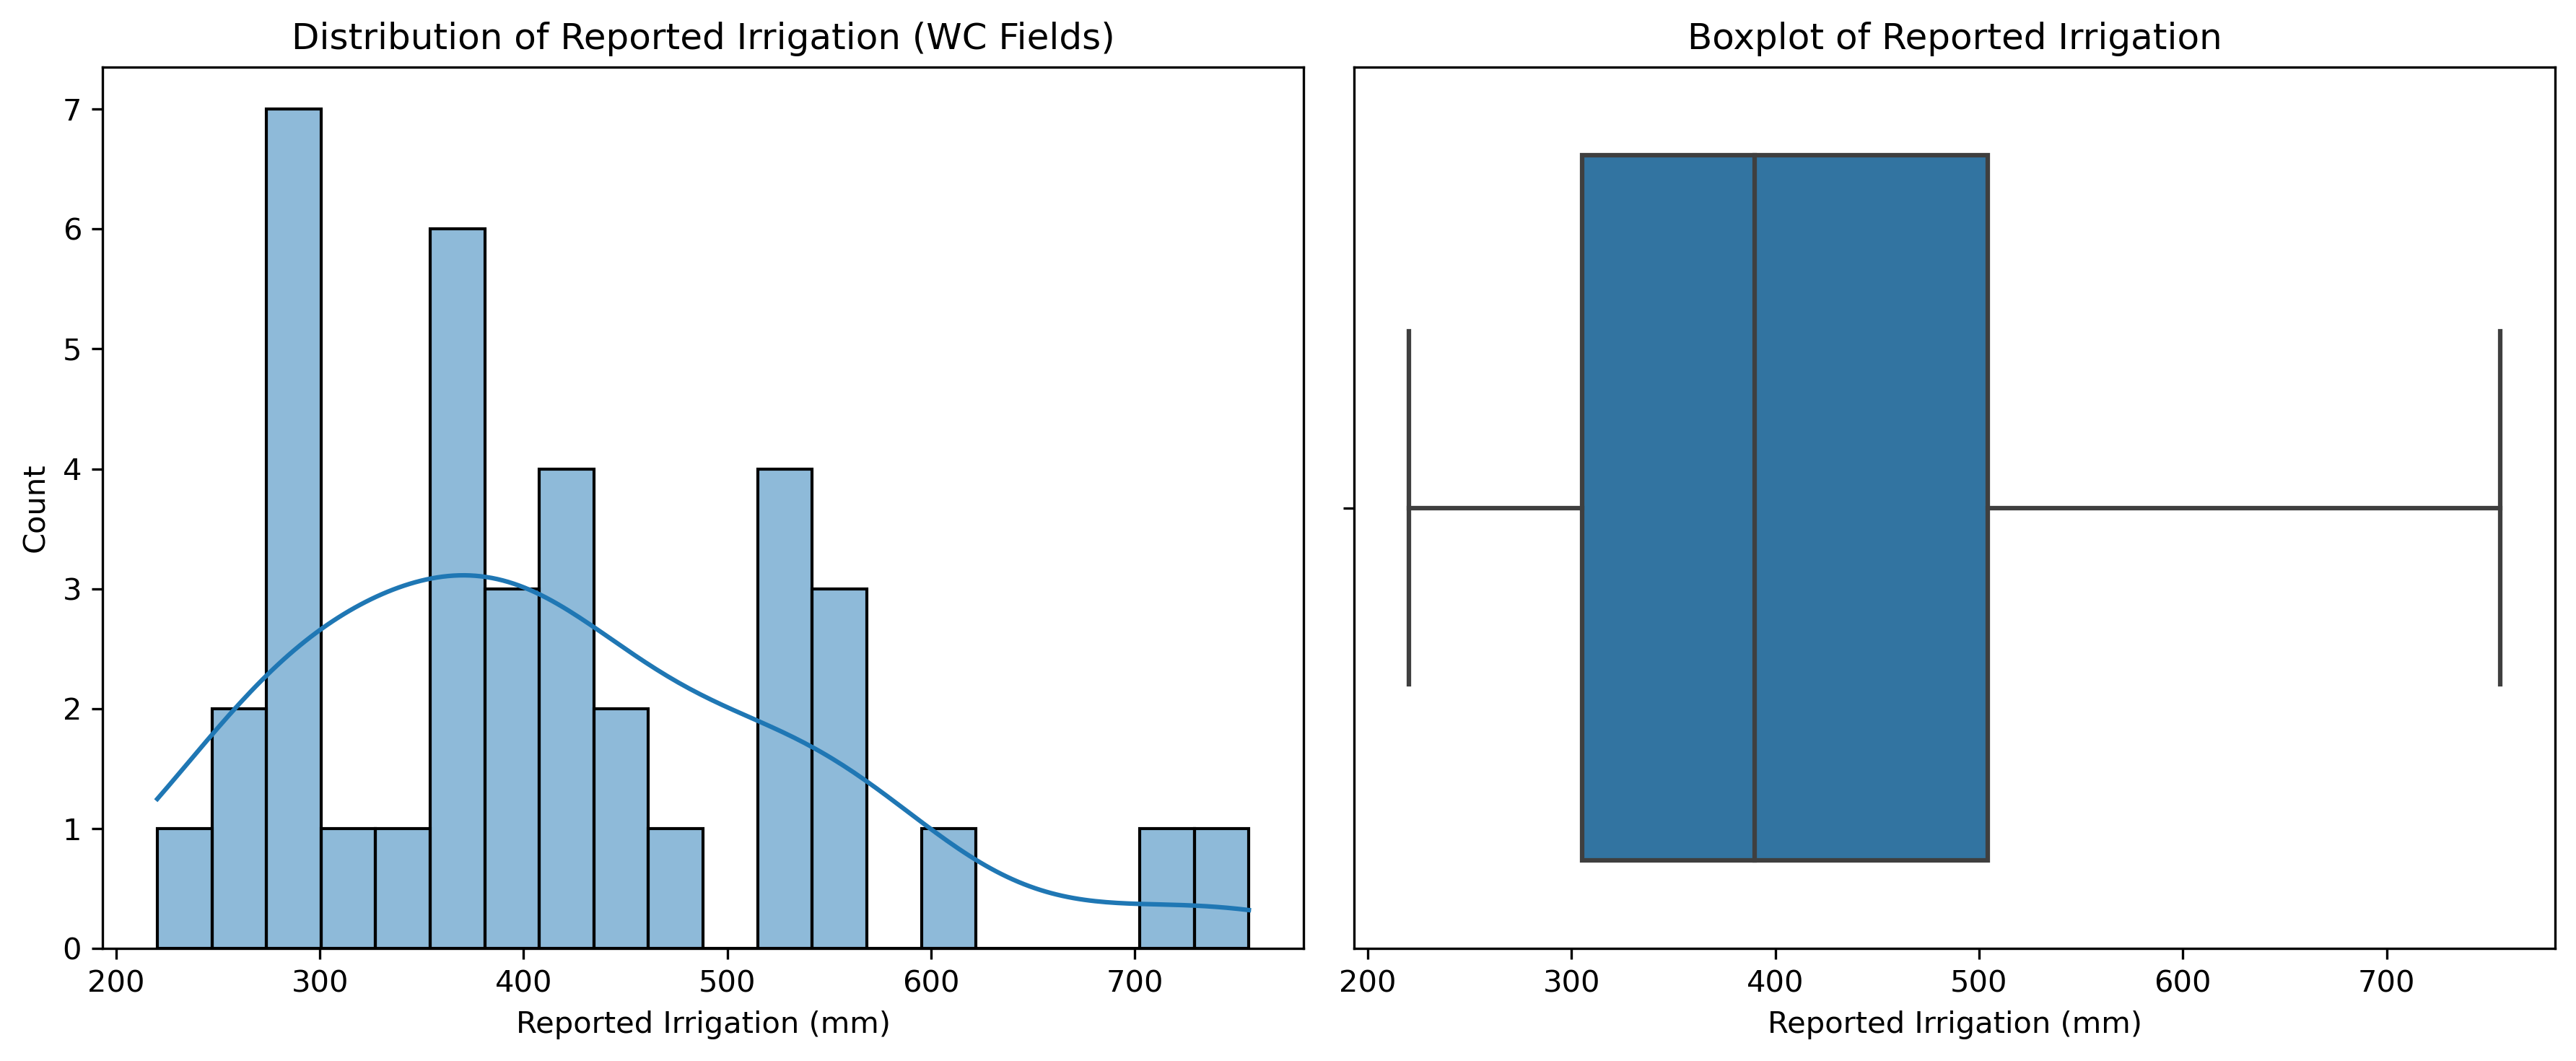

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(wc_fields["Reported_Irrigation"], bins=20, kde=True)
plt.title("Distribution of Reported Irrigation (WC Fields)")
plt.xlabel("Reported Irrigation (mm)")
plt.ylabel("Count")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=wc_fields["Reported_Irrigation"])
plt.title("Boxplot of Reported Irrigation")
plt.xlabel("Reported Irrigation (mm)")

plt.tight_layout()
plt.show()


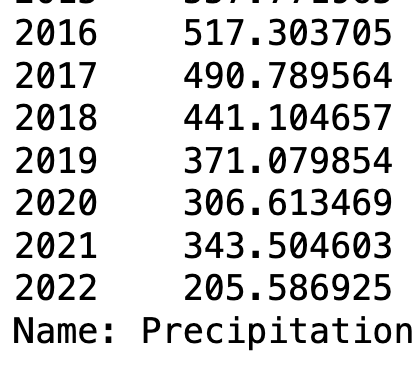

In [154]:
# WC10 (WC10 to 15 are together): 2017 was a wet year precip:468, it's reasonable to get low irrigation, same for WC24 and  25
# WC26: 2019 reported irrigation 756, make sense as it was a dry year for that field. 2022 was the driest.
    
# WC9 (WC7,8,9 are together): precip was around 400mm (months 4-9). 
    
# In the case of WC8, in 2020 precip was 300mm, and reported irrigation was 544.
# in 2016 precip was 570mm reported irrig was 424.43 mm
# 2017 was a wet year precip:490
#2018 441


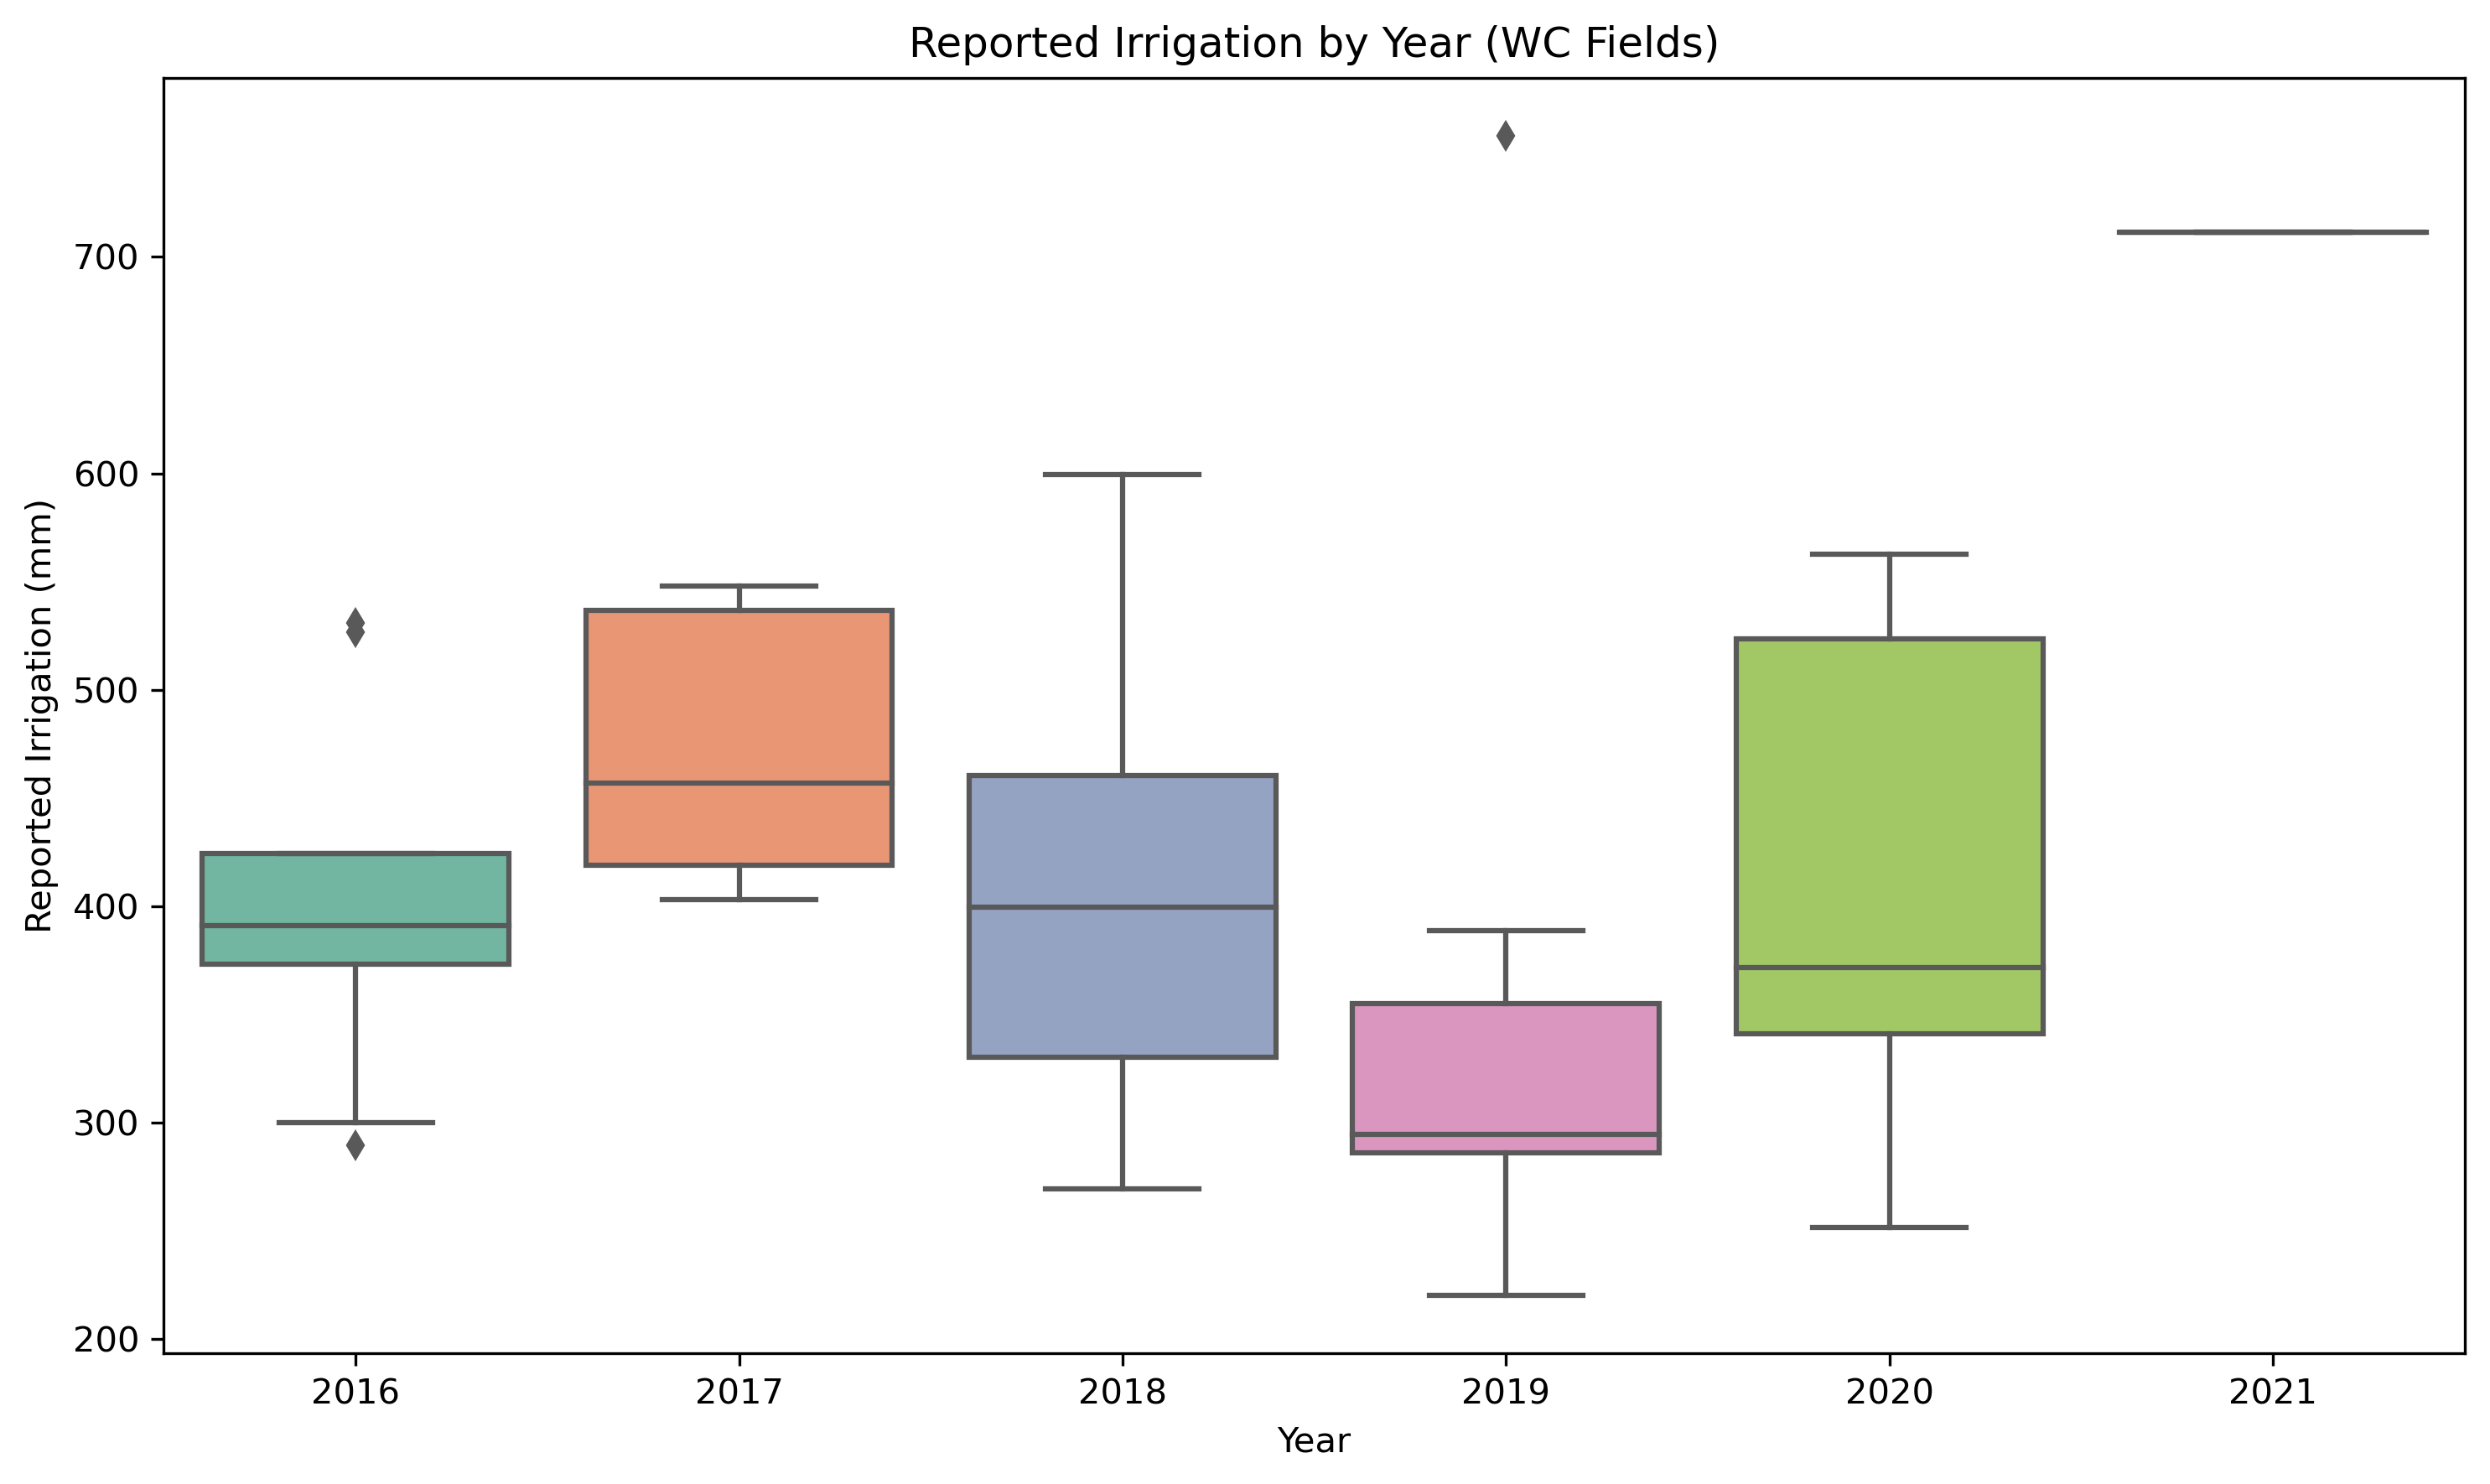

In [109]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=wc_fields, x="Year", y="Reported_Irrigation", palette="Set2")
plt.title("Reported Irrigation by Year (WC Fields)")
plt.xlabel("Year")
plt.ylabel("Reported Irrigation (mm)")
plt.tight_layout()
plt.show()


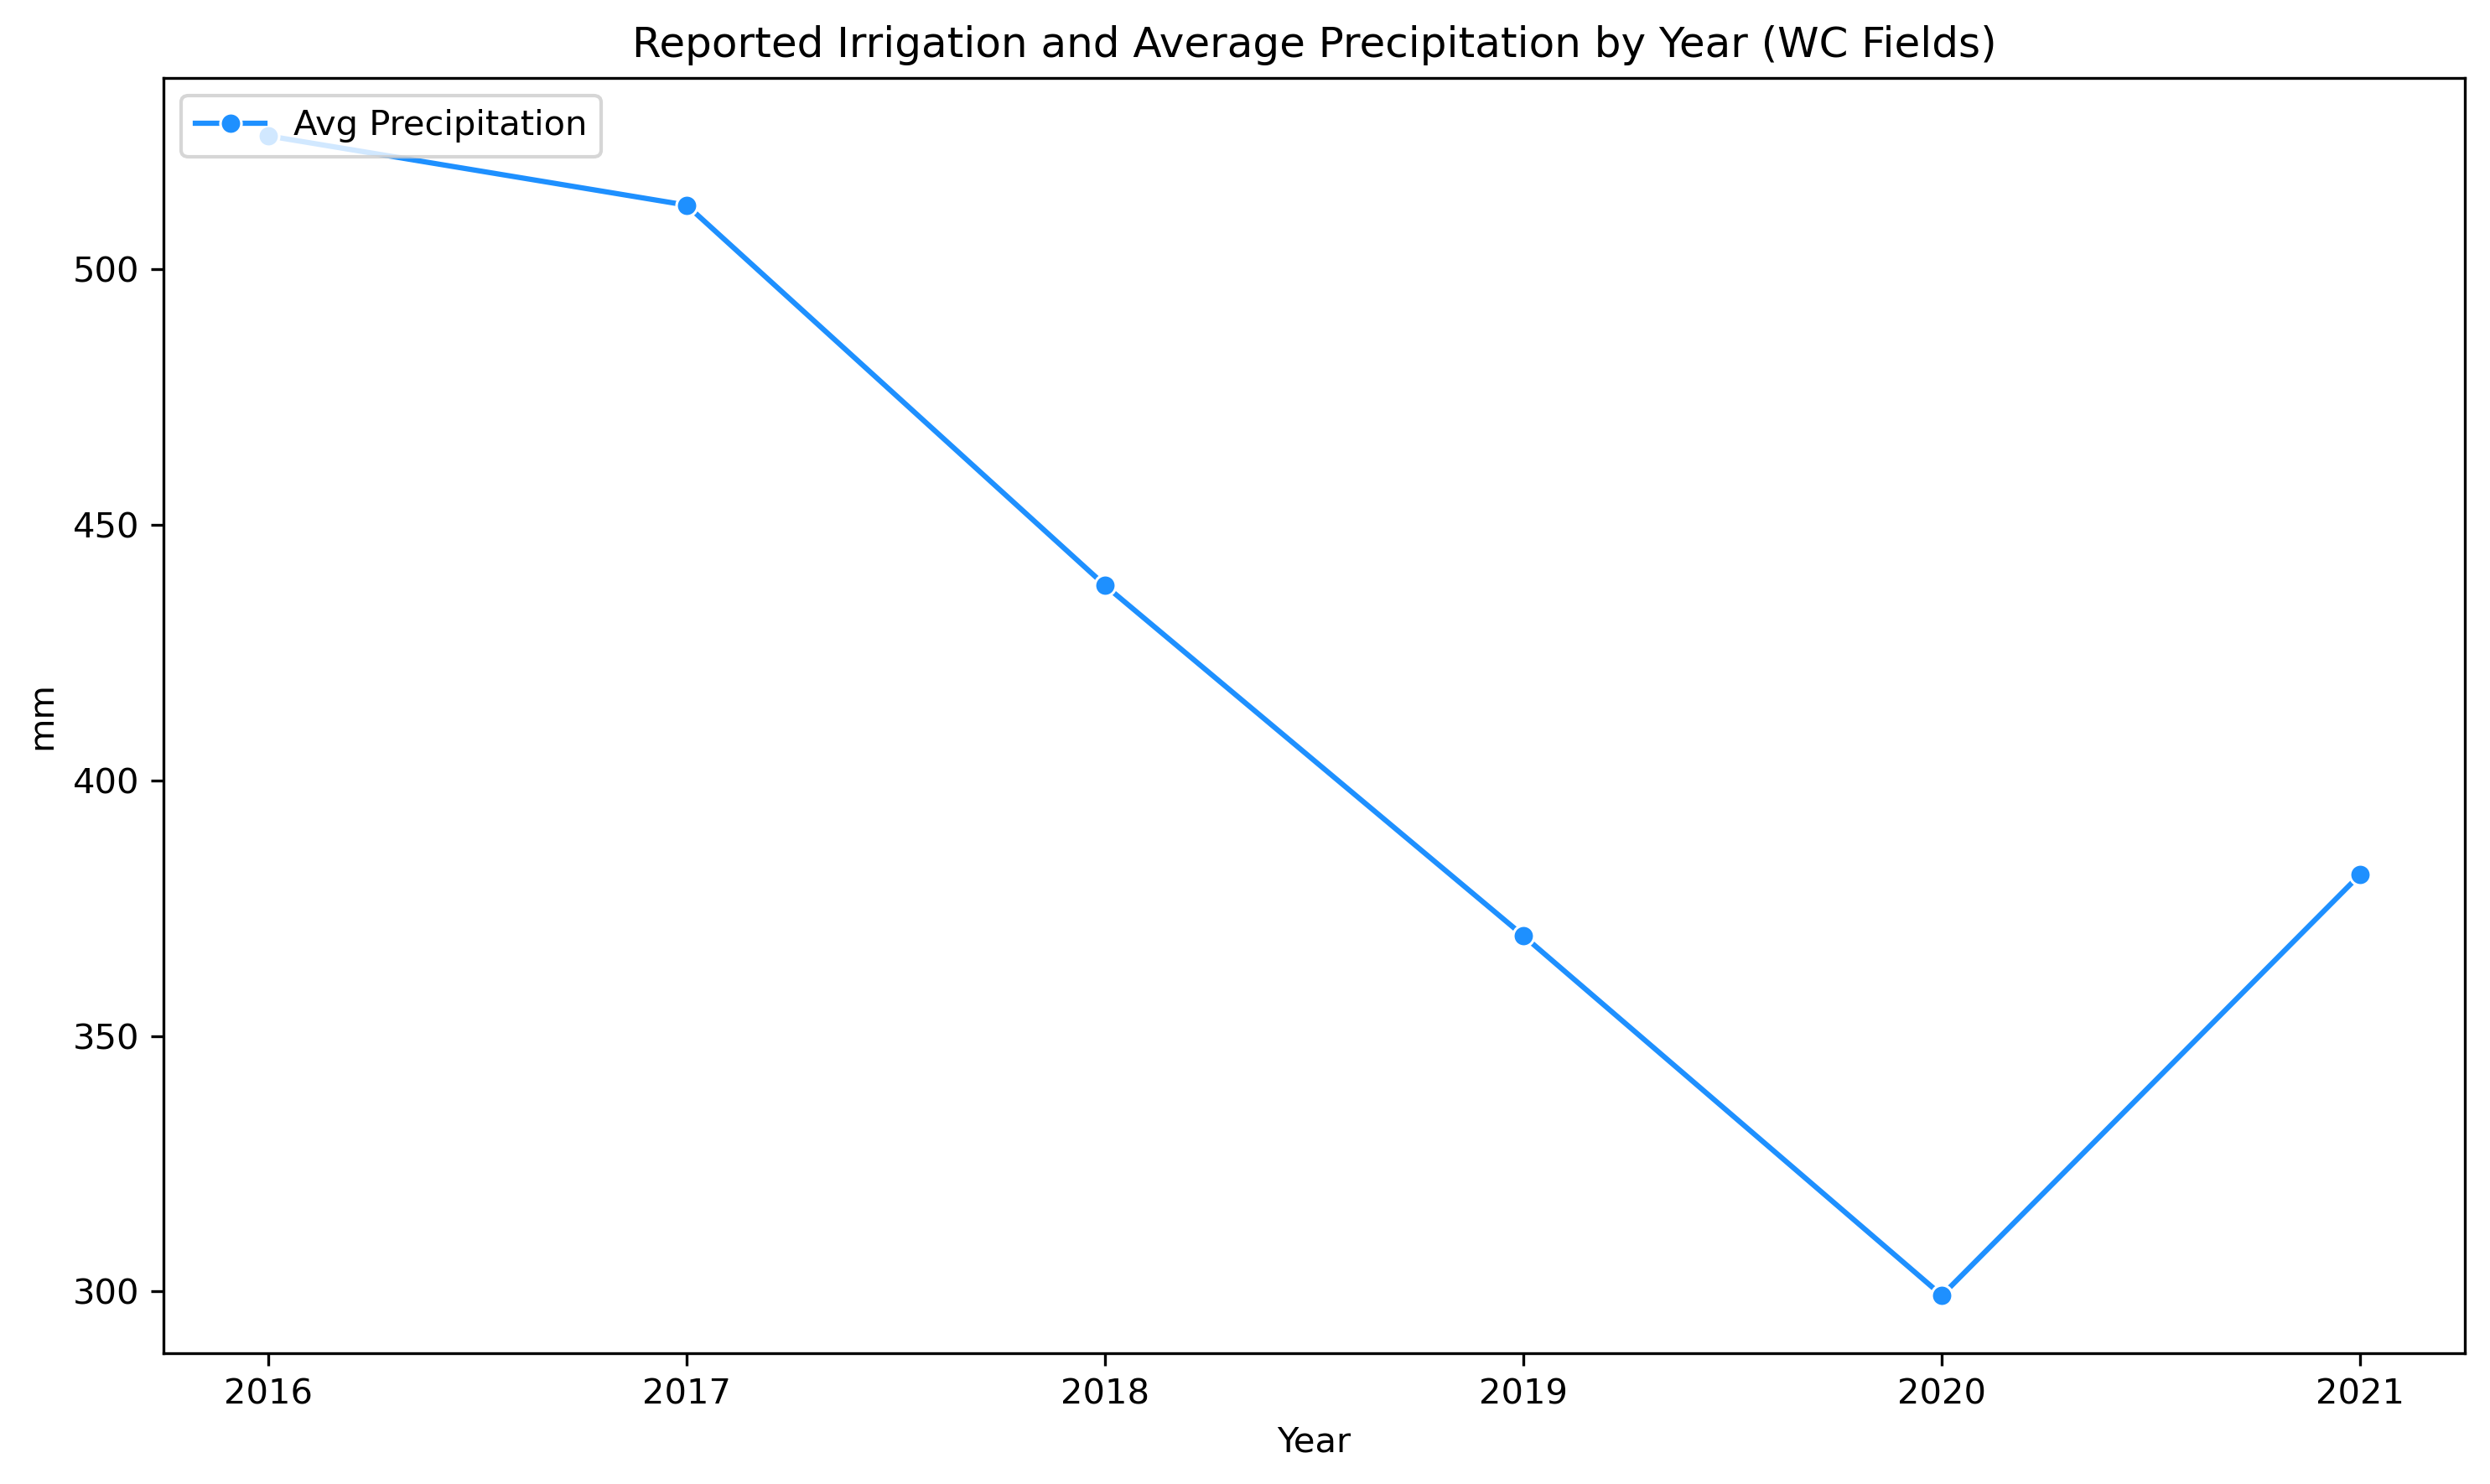

In [110]:

avg_precip = wc_fields.groupby("Year")["Precipitation"].mean().reset_index()

avg_precip = avg_precip.sort_values("Year")

plt.figure(figsize=(10, 6))

# Boxplot for Reported Irrigation
# sns.boxplot(data=wc_fields, x="Year", y="Reported_Irrigation", palette="Set2")

# Overlay line plot for Avg Precipitation
sns.lineplot(data=avg_precip, x="Year", y="Precipitation", color="dodgerblue", marker="o", label="Avg Precipitation")

plt.title("Reported Irrigation and Average Precipitation by Year (WC Fields)")
plt.xlabel("Year")
plt.ylabel("mm")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


In [36]:
ydff  = pd.read_csv("Data/test_data.csv")
ydff 

Unnamed: 0  Reported_Yield  Reported_Irrigation  Year FieldID
0           32       15.007749           333.897442  2018     NW4
1           66             NaN           456.946000  2017     WC2
2           88             NaN           403.098000  2017     WC6
3            8       15.976164           186.182000  2022     NC1
4           81             NaN           288.544000  2019     WC3
5           77             NaN           424.688000  2018    WC24
6           58             NaN           418.846000  2017    WC10
7           65             NaN           516.890000  2020    WC19
8           79             NaN           562.610000  2020    WC26
9           10       14.186613           168.402000  2022     NC2
10          42       14.404507           390.011099  2022     NW5
11          34       12.571242           433.966466  2020     NW4
12           4        8.171677           342.563728  2020     NB1
13          85             NaN           391.160000  2016     WC5
14          24       12.296186           356.678032  2016     NW3
15          21       11.659318           407.117048  2020     NW2
16           1       10.184502           297.575357  2017     NB1
17         133       11.820720                  NaN  2013     NW4
18         130       10.534880                  NaN  2009     NW4
19         124       12.074257                  NaN  2009     NW3
20         111        8.813925                  NaN  2013     NB1
21         115        6.027041                  NaN  2012     NW1
22         123       11.550371                  NaN  2014     NW2
23         128       13.296209                  NaN  2014     NW3
24         116        6.536804                  NaN  2013     NW1

## Spatial and temporal comprison

In [10]:


# NSGA-II

# bst irrig

# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[54.814844,30.000007,  46.213611,59.364884],CCx =0.954401, WP = 30.820504, Kcb =1.056756,
#                                                 HI0 = 0.513886, a_HI =0.500047, Zmax =1.201175,df_type ="train", no_et = True)

#middle nsga


# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[46.642431,47.607506, 44.439728,59.829289],CCx =0.973186, WP = 31.946701, Kcb =1.057744,
#                                                 HI0 = 0.495800, a_HI =0.557917, Zmax =1.200949, df_type ="test", no_et = True)  
 
# ==========

# best yield

# all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[41.494875, 30.050285, 34.479966, 58.861757],CCx =0.965120, WP = 31.633690, Kcb =1.027712,
#                                                 HI0 = 0.517828, a_HI =1.906190, Zmax =1.217361,df_type ="full", no_et = True) 

all_yld_df, simul_reported, all_ET_df  = for_objf (smt =[54.814844,30.000007,  46.213611,59.364884],CCx =0.954401, WP = 30.820504, Kcb =1.056756,
                                                HI0 = 0.513886, a_HI =0.500047, Zmax =1.201175,df_type ="full", no_et = True)

 

simul_reported.rename(columns={"Seasonal irrigation (mm)": "Simulated_Irrigation", "Yield (tonne/ha)": "Simulated_Yield"},inplace =True)

# Add a new column 'field_region' based on the 'FieldID'
simul_reported["field_region"] = np.where(simul_reported["FieldID"].str.startswith("SW"), "SW",
                               np.where(simul_reported["FieldID"].str.startswith(("NW", "NB")), "NW",
                               np.where(simul_reported["FieldID"].str.startswith("WC"), "WC",
                               np.where(simul_reported["FieldID"].str.startswith("NC"), "NC", "Unknown"))))
simul_reported.head(3)





116
without_ET: 116


Season crop Type Harvest Date (YYYY/MM/DD)  Harvest Date (Step)  \
0      12  MaizeGDD                2018-09-17                 4641   
1      14  MaizeGDD                2020-09-27                 5382   
2      13  MaizeGDD                2019-09-25                 5014   

   Simulated_Yield  Simulated_Irrigation FieldID  Year  Unnamed: 0_x cropType  \
0        12.537902               276.000     WC1  2018            56     Corn   
1        11.354063               526.542     WC1  2020            57     Corn   
2        12.129915               324.000     WC2  2019            67     Corn   

   Reported_Irrigation_x  Reported_Irrigation_y  Reported_Irrigation  \
0                273.812                    NaN              273.812   
1                360.680                    NaN              360.680   
2                283.718                    NaN              283.718   

   Reported_Yield  Unnamed: 0_y field_region  
0             NaN           NaN           WC  
1             NaN           NaN           WC  
2             NaN           NaN           WC

In [11]:
simul_reported["FieldID"].unique()

array(['WC1', 'WC2', 'WC3', 'WC6', 'WC4', 'WC5', 'NW6', 'NW7', 'NB1',
       'WC19', 'WC8', 'WC11', 'WC25', 'WC16', 'NW1', 'NW2', 'NW3', 'NW4',
       'NW5', 'WC23', 'WC22', 'WC24', 'NC2', 'NC1', 'WC21', 'WC9', 'SW1'],
      dtype=object)

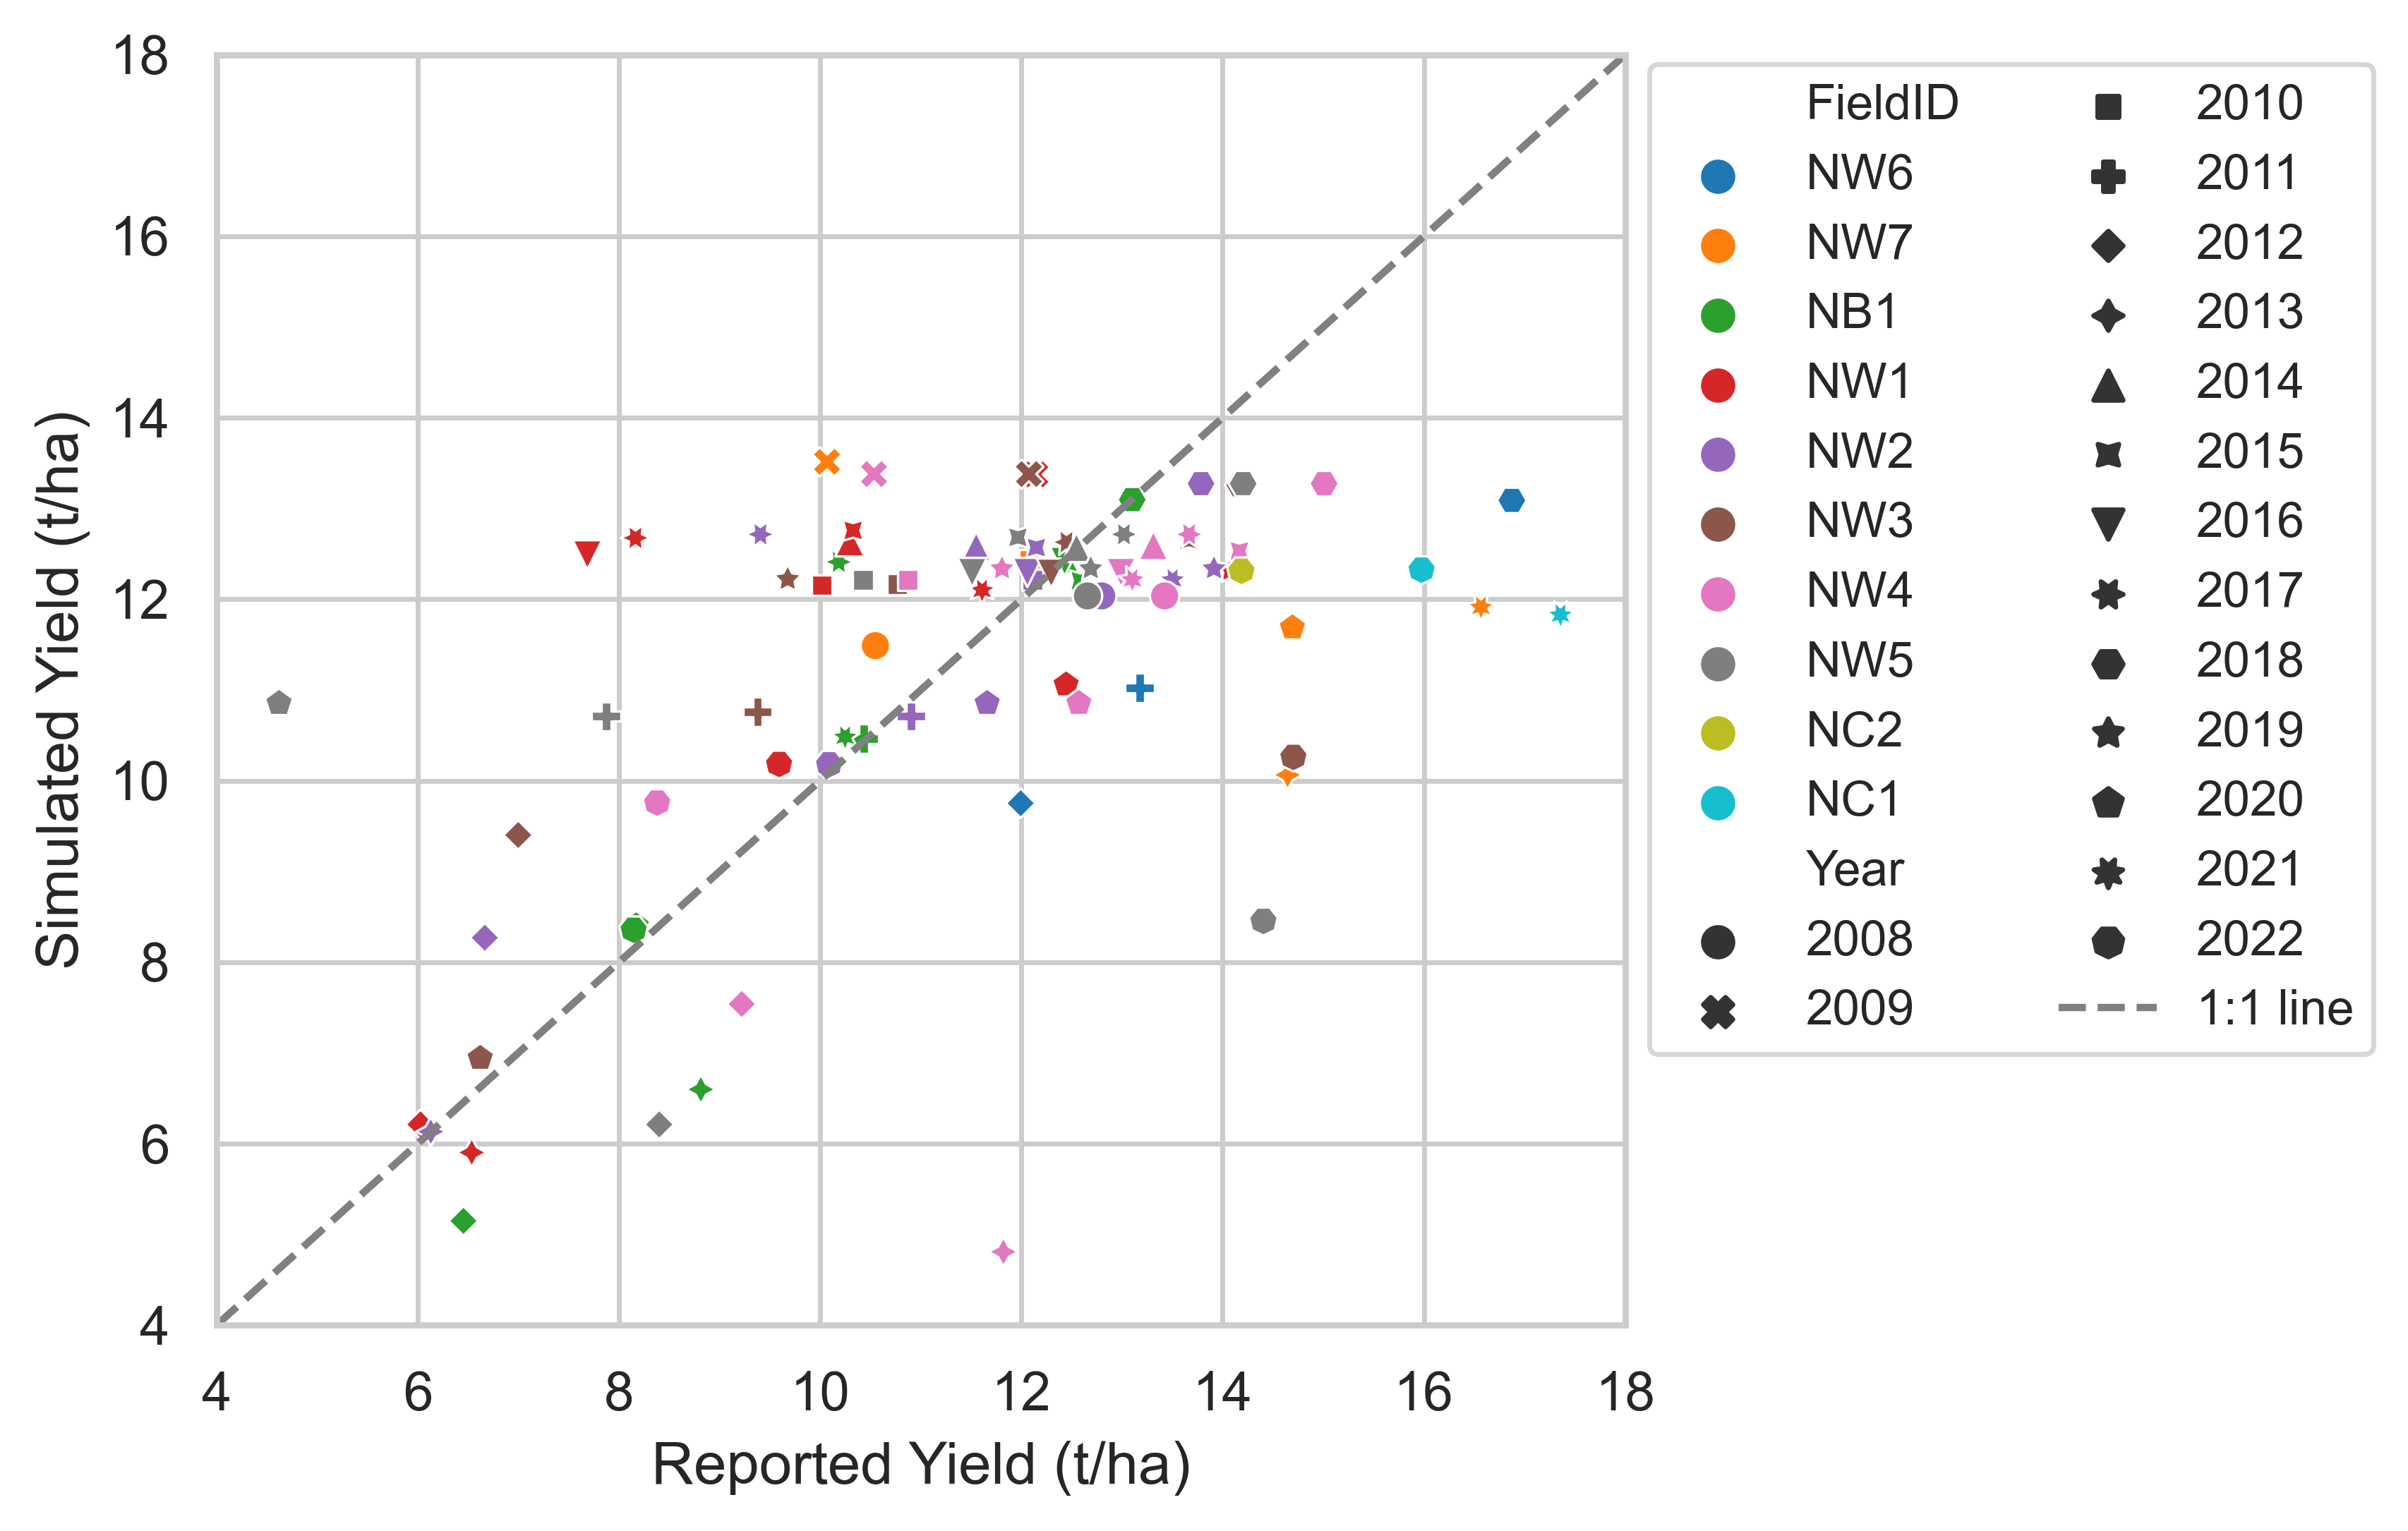

In [93]:
plt.figure(figsize=(7,4.5))
sns.scatterplot(
    data=simul_reported.dropna(subset=["Reported_Yield"]),
    y="Simulated_Yield",
    x="Reported_Yield",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)
plt.xlabel("Reported Yield (t/ha)", fontsize =12)
plt.ylabel("Simulated Yield (t/ha)", fontsize =12)
plt.xlim(4,18)
plt.ylim(4,18)
plt.axline((0, 0), slope=1, label='1:1 line', color='gray', linestyle='--')
plt.legend(
    ncol=2,
    fontsize='small',          # or use a numeric value like 8
    title_fontsize='small',
    bbox_to_anchor=(1.01, 1),  # closer to the right edge of plot
    loc='upper left',
    borderaxespad=0.2          # reduces padding between plot and legend
)

plt.tight_layout()
plt.show()




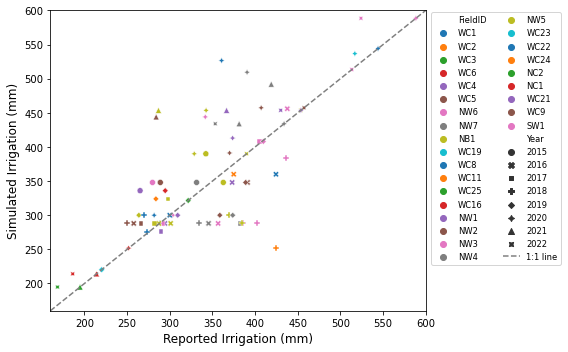

In [5]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=simul_reported.dropna(subset=["Reported_Irrigation"]),
    y="Simulated_Irrigation",
    x="Reported_Irrigation",
    hue="FieldID",
    style="Year", 
    palette="tab10"
)
plt.xlabel("Reported Irrigation (mm)", fontsize =12)
plt.ylabel("Simulated Irrigation (mm)", fontsize =12)
plt.axline((0, 0), slope=1, label='1:1 line', color='gray', linestyle='--')
plt.xlim(160,600)
plt.ylim(160,600)


plt.legend(
    ncol=2,
    fontsize='small',          # or use a numeric value like 8
    title_fontsize='small',
    bbox_to_anchor=(1.01, 1),  # closer to the right edge of plot
    loc='upper left',
    borderaxespad=0.2          # reduces padding between plot and legend
)

plt.tight_layout()
plt.show()




In [69]:

# Generate synthetic metrics
models = ['XGB', 'NSGA-II', 'PSO']
years = list(range(2012, 2022))
metrics = ['RMSE', 'PBIAS', 'NMAE']

synthetic_records = []

for model in models:
    for year in years:
        rmse = np.random.uniform(0.8, 2.0)
        pbias = np.random.uniform(-15, 15)
        nmae = np.random.uniform(0.05, 0.25)
        synthetic_records.extend([
            {"Model": model, "Year": year, "Metric": "RMSE", "Value": rmse},
            {"Model": model, "Year": year, "Metric": "PBIAS", "Value": pbias},
            {"Model": model, "Year": year, "Metric": "NMAE", "Value": nmae}
        ])

# Create DataFrame
yearly_metrics_melted = pd.DataFrame(synthetic_records)
yearly_metrics_melted

Model  Year Metric      Value
0    XGB  2012   RMSE   1.043757
1    XGB  2012  PBIAS  14.190477
2    XGB  2012   NMAE   0.128262
3    XGB  2013   RMSE   1.860836
4    XGB  2013  PBIAS  -1.950801
..   ...   ...    ...        ...
85   PSO  2020  PBIAS  -5.097441
86   PSO  2020   NMAE   0.114123
87   PSO  2021   RMSE   0.874542
88   PSO  2021  PBIAS  11.540278
89   PSO  2021   NMAE   0.200472

[90 rows x 4 columns]

In [6]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def calculate_yearly_metrics(
    df,
    group_by_field=False,
    calculate_yield=True,
    calculate_irrigation=True,
    model=None,
    estimated="Simulated"
):
    """
    Calculate RMSE, PBIAS, and NMAE for yield and/or irrigation,
    grouped by Year or FieldID, and optionally tagged with a model name.

    Parameters:
    - df: DataFrame with required columns like:
        ['Year', 'FieldID', 'Reported_Yield', 'Simulated_Yield', ...]
    - group_by_field: Group by 'FieldID' instead of 'Year'
    - calculate_yield: Whether to calculate metrics for yield
    - calculate_irrigation: Whether to calculate metrics for irrigation
    - model: Optional string tag to label the model
    - estimated: Column prefix for simulated or predicted values (default: 'Simulated')

    Returns:
    - A tidy DataFrame with columns like:
        ['Year' or 'FieldID', 'Metric', 'Yield', 'Irrigation', 'Model' (if provided)]
    """

    group_cols = ['FieldID'] if group_by_field else ['Year']
    grouped = df.groupby(group_cols)
    results = []

    # Column names
    sim_yield_col = f"{estimated}_Yield"
    sim_irr_col = f"{estimated}_Irrigation"

    for keys, group in grouped:
        base = {"FieldID": keys} if group_by_field else {"Year": keys}
        if model:
            base["Model"] = model
        record = {}

        # --- Yield metrics ---
        if calculate_yield:
            yield_data = group[['Reported_Yield', sim_yield_col]].dropna()
            if not yield_data.empty:
                obs_y = yield_data['Reported_Yield'].values
                sim_y = yield_data[sim_yield_col].values

                rmse_y = np.sqrt(mean_squared_error(obs_y, sim_y))
                pbias_y = 100 * np.sum(obs_y - sim_y) / np.sum(obs_y)
                nmae_y = 100 * mean_absolute_error(obs_y, sim_y) / np.mean(obs_y)
            else:
                rmse_y = pbias_y = nmae_y = np.nan

            record["RMSE"] = {"Yield": rmse_y}
            record["PBIAS"] = {"Yield": pbias_y}
            record["NMAE"] = {"Yield": nmae_y}

        # --- Irrigation metrics ---
        if calculate_irrigation:
            irr_data = group[['Reported_Irrigation', sim_irr_col]].dropna()
            if not irr_data.empty:
                obs_i = irr_data['Reported_Irrigation'].values
                sim_i = irr_data[sim_irr_col].values

                rmse_i = np.sqrt(mean_squared_error(obs_i, sim_i))
                pbias_i = 100 * np.sum(obs_i - sim_i) / np.sum(obs_i)
                nmae_i = 100 * mean_absolute_error(obs_i, sim_i) / np.mean(obs_i)
            else:
                rmse_i = pbias_i = nmae_i = np.nan

            if "RMSE" in record: record["RMSE"]["Irrigation"] = rmse_i
            else: record["RMSE"] = {"Irrigation": rmse_i}

            if "PBIAS" in record: record["PBIAS"]["Irrigation"] = pbias_i
            else: record["PBIAS"] = {"Irrigation": pbias_i}

            if "NMAE" in record: record["NMAE"]["Irrigation"] = nmae_i
            else: record["NMAE"] = {"Irrigation": nmae_i}

        # --- Format result ---
        for metric, values in record.items():
            row = base.copy()
            row["Metric"] = metric
            if calculate_yield:
                row["Yield"] = values.get("Yield", np.nan)
            if calculate_irrigation:
                row["Irrigation"] = values.get("Irrigation", np.nan)
            results.append(row)

    return pd.DataFrame(results)


In [143]:
# Example call:
fiddf =calculate_yearly_metrics(
    df=simul_reported,
    group_by_field=True,
    calculate_yield=True,
    calculate_irrigation=False,
    model="AquaCrop-OSPy NSGA-II Yield Optimized"
)

fiddf

FieldID                                  Model Metric      Yield
0      NB1  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.312521
1      NB1  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  11.022368
2      NB1  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  15.281142
3      NC1  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   4.869757
4      NC1  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  28.055634
..     ...                                    ...    ...        ...
58     WC4  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS        NaN
59     WC4  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE        NaN
60     WC8  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE        NaN
61     WC8  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS        NaN
62     WC8  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE        NaN

[63 rows x 4 columns]

In [144]:
# Example call:
yrdf = df_model_metrics = calculate_yearly_metrics(
    df=simul_reported,
    group_by_field=False,
    calculate_yield=True,
    calculate_irrigation=False,
    model="AquaCrop-OSPy NSGA-II Yield Optimized"
)

yrdf

Year                                  Model Metric      Yield
0   2008  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.248724
1   2008  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS   3.128822
2   2008  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   9.637242
3   2009  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.526114
4   2009  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -20.875178
5   2009  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  20.875178
6   2010  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.469208
7   2010  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -11.765627
8   2010  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  11.765627
9   2011  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.259106
10  2011  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS   4.039920
11  2011  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   8.083999
12  2012  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   4.918307
13  2012  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  46.930326
14  2012  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  46.930326
15  2013  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.387422
16  2013  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  20.595625
17  2013  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  20.595625
18  2014  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.222543
19  2014  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -5.229782
20  2014  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   7.389564
21  2015  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.376282
22  2015  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -1.827475
23  2015  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   8.465618
24  2016  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.020978
25  2016  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -8.545609
26  2016  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.231814
27  2017  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.895831
28  2017  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -17.129593
29  2017  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  21.060059
30  2018  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.110401
31  2018  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  10.764477
32  2018  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.764477
33  2019  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.571706
34  2019  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -2.158636
35  2019  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.664574
36  2020  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   4.078311
37  2020  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -6.749609
38  2020  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  29.582653
39  2021  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   3.949722
40  2021  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  19.401248
41  2021  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  22.836433
42  2022  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   7.264936
43  2022  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  53.572693
44  2022  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  53.572693

In [145]:
fiddf= fiddf.dropna()
yrdf

Year                                  Model Metric      Yield
0   2008  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.248724
1   2008  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS   3.128822
2   2008  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   9.637242
3   2009  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.526114
4   2009  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -20.875178
5   2009  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  20.875178
6   2010  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.469208
7   2010  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -11.765627
8   2010  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  11.765627
9   2011  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.259106
10  2011  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS   4.039920
11  2011  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   8.083999
12  2012  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   4.918307
13  2012  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  46.930326
14  2012  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  46.930326
15  2013  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.387422
16  2013  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  20.595625
17  2013  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  20.595625
18  2014  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.222543
19  2014  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -5.229782
20  2014  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   7.389564
21  2015  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.376282
22  2015  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -1.827475
23  2015  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE   8.465618
24  2016  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.020978
25  2016  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -8.545609
26  2016  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.231814
27  2017  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.895831
28  2017  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS -17.129593
29  2017  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  21.060059
30  2018  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   2.110401
31  2018  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  10.764477
32  2018  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.764477
33  2019  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   1.571706
34  2019  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -2.158636
35  2019  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  10.664574
36  2020  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   4.078311
37  2020  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  -6.749609
38  2020  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  29.582653
39  2021  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   3.949722
40  2021  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  19.401248
41  2021  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  22.836433
42  2022  AquaCrop-OSPy NSGA-II Yield Optimized   RMSE   7.264936
43  2022  AquaCrop-OSPy NSGA-II Yield Optimized  PBIAS  53.572693
44  2022  AquaCrop-OSPy NSGA-II Yield Optimized   NMAE  53.572693

In [146]:
yrdf.to_csv("../Data_for_Crop_ML_model/yr_df_yield.csv")
fiddf.to_csv("../Data_for_Crop_ML_model/fiddf_yield.csv")

## for Irrig

In [7]:

fiddf_irr =calculate_yearly_metrics(
    df=simul_reported,
    group_by_field=True,
    calculate_yield=False,
    calculate_irrigation=True,
    model="AquaCrop-OSPy NSGA-II Irrigation Optimized"
)

fiddf_irr 

FieldID                                       Model Metric  Irrigation
0      NB1  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   81.182601
1      NB1  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS   -8.564978
2      NB1  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   16.647411
3      NC1  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   19.756563
4      NC1  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS   -6.979695
..     ...                                         ...    ...         ...
76     WC8  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS    6.652955
77     WC8  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE    6.652955
78     WC9  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   40.874000
79     WC9  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS   10.510860
80     WC9  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   10.510860

[81 rows x 4 columns]

In [8]:

yr_irr =calculate_yearly_metrics(
    df=simul_reported,
    group_by_field=False,
    calculate_yield=False,
    calculate_irrigation=True,
    model="AquaCrop-OSPy NSGA-II Irrigation Optimized"
)

yr_irr = yr_irr.dropna()
yr_irr 

Year                                       Model Metric  Irrigation
21  2015  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   51.535923
22  2015  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS  -13.248015
23  2015  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   14.821449
24  2016  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   36.904455
25  2016  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS    5.877495
26  2016  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE    8.261846
27  2017  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   38.404000
28  2017  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS    2.504618
29  2017  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE    7.609386
30  2018  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   86.032910
31  2018  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS   16.407546
32  2018  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   20.421479
33  2019  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   35.693299
34  2019  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS    1.810177
35  2019  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE    7.988551
36  2020  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   69.979580
37  2020  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS  -11.833397
38  2020  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   11.833397
39  2021  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   99.375258
40  2021  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS  -25.140929
41  2021  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE   25.140929
42  2022  AquaCrop-OSPy NSGA-II Irrigation Optimized   RMSE   37.543634
43  2022  AquaCrop-OSPy NSGA-II Irrigation Optimized  PBIAS   -6.416306
44  2022  AquaCrop-OSPy NSGA-II Irrigation Optimized   NMAE    6.416306

In [9]:
yr_irr .to_csv("../Data_for_Crop_ML_model/yr_df_irig.csv")
fiddf_irr .to_csv("../Data_for_Crop_ML_model/fiddf_irig.csv")